## Using the SVC demo file, let's play with MLP

### Our Imports

In [1]:
# our imports
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read S&P500 Data

In [2]:
# Fetch the data 
Df = pd.read_csv("data/SPY.csv")
Df= Df.dropna()
Df = Df.set_index(Df.Date)
Df = Df.drop(columns='Date')
Df.head()

,Open,High,Low,Close,Volume
Date,,,,,
03-01-2017,215.6950,216.4522,214.5867,215.8867,91366522
04-01-2017,216.2509,217.3340,216.2413,217.1710,78744433
05-01-2017,216.8739,217.1710,216.1167,216.9985,78379012
06-01-2017,217.1231,218.2924,216.5193,217.7749,71559922
09-01-2017,217.4873,217.6408,217.0141,217.0560,46939676


### Define our values

In [3]:
# Predictor variables
Df['Open-Close'] = Df.Open - Df.Close
Df['High-Low'] = Df.High - Df.Low
X= Df[['Open-Close','High-Low']]
X.head()

# Target variables
y = np.where(Df['Close'].shift(-1) > Df['Close'],1,-1)

### Train Test Splits

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### MLPClassifier

In [5]:
#our MLP object with some properties
mlp = MLPClassifier(verbose='True')
print(mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose='True', warm_start=False)


In [6]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.67964506
Iteration 2, loss = 0.67708104
Iteration 3, loss = 0.67472463
Iteration 4, loss = 0.67257641
Iteration 5, loss = 0.67062848
Iteration 6, loss = 0.66887584
Iteration 7, loss = 0.66730713
Iteration 8, loss = 0.66591977
Iteration 9, loss = 0.66469223
Iteration 10, loss = 0.66360931
Iteration 11, loss = 0.66266350
Iteration 12, loss = 0.66183756
Iteration 13, loss = 0.66111924
Iteration 14, loss = 0.66049286
Iteration 15, loss = 0.65994215
Iteration 16, loss = 0.65945170
Iteration 17, loss = 0.65901162
Iteration 18, loss = 0.65861665
Iteration 19, loss = 0.65826224
Iteration 20, loss = 0.65792975
Iteration 21, loss = 0.65762218
Iteration 22, loss = 0.65733302
Iteration 23, loss = 0.65705861
Iteration 24, loss = 0.65679687
Iteration 25, loss = 0.65654208
Iteration 26, loss = 0.65629818
Iteration 27, loss = 0.65607042
Iteration 28, loss = 0.65585874
Iteration 29, loss = 0.65566221
Iteration 30, loss = 0.65548598
Iteration 31, loss = 0.65533060
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose='True', warm_start=False)

### Model Evaluation

[[ 1 31]
 [ 0 19]]
             precision    recall  f1-score   support

         -1       1.00      0.03      0.06        32
          1       0.38      1.00      0.55        19

avg / total       0.77      0.39      0.24        51

Our log loss score: 20.99464423063857


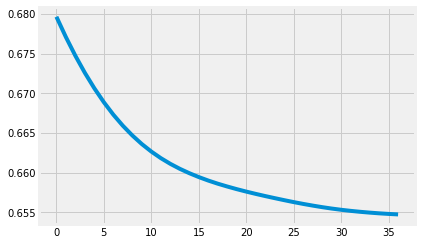

In [7]:
predictions = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
from sklearn.metrics import log_loss
print("Our log loss score: {0}".format(log_loss(y_test, predictions)))

plt.plot(mlp.loss_curve_)
plt.show()

### Observations

Comparing our performance to the SVC demo file, we find that the MLP classifier comes close to the log score of our SVC demo. With a little hyperparamater optimization, I'm certain we can improve the log loss score. So let's experiment!

### Hyperparameter Optimization

Reference: https://www.pyimagesearch.com/2016/08/15/how-to-tune-hyperparameters-with-python-and-scikit-learn/

### Grid Search Approach

The grid search algorithm will exhaustively train and evalute our MLP classifier for every combination of hyperparamater values.

In [9]:
from sklearn.model_selection import GridSearchCV
import time

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (13,13,13)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.0005],
    'learning_rate': ['constant','adaptive', 'invscaling'],
}


grid = GridSearchCV(mlp, parameter_space)
start = time.time()
grid.fit(X_train, y_train)

# evaluate the best grid searched model on the testing data
print("[INFO] grid search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))

Iteration 1, loss = 0.89328373
Iteration 2, loss = 0.88773744
Iteration 3, loss = 0.87999403
Iteration 4, loss = 0.87044130
Iteration 5, loss = 0.85945694
Iteration 6, loss = 0.84740086
Iteration 7, loss = 0.83460935
Iteration 8, loss = 0.82139055
Iteration 9, loss = 0.80802117
Iteration 10, loss = 0.79474436
Iteration 11, loss = 0.78176848
Iteration 12, loss = 0.76926696
Iteration 13, loss = 0.75737887
Iteration 14, loss = 0.74621045
Iteration 15, loss = 0.73583717
Iteration 16, loss = 0.72630642
Iteration 17, loss = 0.71764062
Iteration 18, loss = 0.70984056
Iteration 19, loss = 0.70288886
Iteration 20, loss = 0.69675343
Iteration 21, loss = 0.69139076
Iteration 22, loss = 0.68674899
Iteration 23, loss = 0.68277073
Iteration 24, loss = 0.67939540
Iteration 25, loss = 0.67656136
Iteration 26, loss = 0.67420760
Iteration 27, loss = 0.67227505
Iteration 28, loss = 0.67070761
Iteration 29, loss = 0.66945290
Iteration 30, loss = 0.66846275
Iteration 31, loss = 0.66769343
Iteration 32, los

Iteration 10, loss = 0.66370984
Iteration 11, loss = 0.66348323
Iteration 12, loss = 0.66325404
Iteration 13, loss = 0.66302401
Iteration 14, loss = 0.66279464
Iteration 15, loss = 0.66256721
Iteration 16, loss = 0.66234276
Iteration 17, loss = 0.66212216
Iteration 18, loss = 0.66190608
Iteration 19, loss = 0.66169508
Iteration 20, loss = 0.66148952
Iteration 21, loss = 0.66128971
Iteration 22, loss = 0.66109580
Iteration 23, loss = 0.66090788
Iteration 24, loss = 0.66072596
Iteration 25, loss = 0.66054999
Iteration 26, loss = 0.66037986
Iteration 27, loss = 0.66021544
Iteration 28, loss = 0.66005655
Iteration 29, loss = 0.65990299
Iteration 30, loss = 0.65975454
Iteration 31, loss = 0.65961097
Iteration 32, loss = 0.65947206
Iteration 33, loss = 0.65933756
Iteration 34, loss = 0.65920724
Iteration 35, loss = 0.65908087
Iteration 36, loss = 0.65895823
Iteration 37, loss = 0.65883910
Iteration 38, loss = 0.65872328
Iteration 39, loss = 0.65861056
Iteration 40, loss = 0.65850078
Iteratio

Iteration 107, loss = 0.65262272
Iteration 108, loss = 0.65251808
Iteration 109, loss = 0.65241521
Iteration 110, loss = 0.65231408
Iteration 111, loss = 0.65221466
Iteration 112, loss = 0.65211691
Iteration 113, loss = 0.65202081
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 114, loss = 0.65192632
Iteration 115, loss = 0.65184651
Iteration 116, loss = 0.65177350
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 117, loss = 0.65170653
Iteration 118, loss = 0.65164750
Iteration 119, loss = 0.65159432
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 120, loss = 0.65154637
Iteration 121, loss = 0.65150358
Iteration 122, loss = 0.65146515
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 12

Iteration 15, loss = 0.70132676
Iteration 16, loss = 0.69875606
Iteration 17, loss = 0.69633117
Iteration 18, loss = 0.69405678
Iteration 19, loss = 0.69193436
Iteration 20, loss = 0.68996275
Iteration 21, loss = 0.68813855
Iteration 22, loss = 0.68645660
Iteration 23, loss = 0.68491040
Iteration 24, loss = 0.68349244
Iteration 25, loss = 0.68219452
Iteration 26, loss = 0.68100805
Iteration 27, loss = 0.67992424
Iteration 28, loss = 0.67893430
Iteration 29, loss = 0.67802964
Iteration 30, loss = 0.67720194
Iteration 31, loss = 0.67644326
Iteration 32, loss = 0.67574614
Iteration 33, loss = 0.67510362
Iteration 34, loss = 0.67450925
Iteration 35, loss = 0.67395718
Iteration 36, loss = 0.67344204
Iteration 37, loss = 0.67295906
Iteration 38, loss = 0.67250395
Iteration 39, loss = 0.67207293
Iteration 40, loss = 0.67166266
Iteration 41, loss = 0.67127027
Iteration 42, loss = 0.67089325
Iteration 43, loss = 0.67052948
Iteration 44, loss = 0.67017714
Iteration 45, loss = 0.66983471
Iteratio

Iteration 51, loss = 0.65795125
Iteration 52, loss = 0.65781231
Iteration 53, loss = 0.65767573
Iteration 54, loss = 0.65754153
Iteration 55, loss = 0.65740974
Iteration 56, loss = 0.65728037
Iteration 57, loss = 0.65715344
Iteration 58, loss = 0.65702893
Iteration 59, loss = 0.65690684
Iteration 60, loss = 0.65678717
Iteration 61, loss = 0.65666989
Iteration 62, loss = 0.65655498
Iteration 63, loss = 0.65644240
Iteration 64, loss = 0.65633213
Iteration 65, loss = 0.65622413
Iteration 66, loss = 0.65611836
Iteration 67, loss = 0.65601477
Iteration 68, loss = 0.65591332
Iteration 69, loss = 0.65581395
Iteration 70, loss = 0.65571664
Iteration 71, loss = 0.65562131
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 72, loss = 0.65552793
Iteration 73, loss = 0.65544917
Iteration 74, loss = 0.65537726
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
It

Iteration 117, loss = 0.65321248
Iteration 118, loss = 0.65318035
Iteration 119, loss = 0.65315147
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 120, loss = 0.65312551
Iteration 121, loss = 0.65310218
Iteration 122, loss = 0.65308121
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.72987313
Iteration 2, loss = 0.68874392
Iteration 3, loss = 0.67396573
Iteration 4, loss = 0.67317589
Iteration 5, loss = 0.67319741
Iteration 6, loss = 0.66923055
Iteration 7, loss = 0.66268552
Iteration 8, loss = 0.65664745
Iteration 9, loss = 0.65349795
Iteration 10, loss = 0.65379148
Iteration 11, loss = 0.65609336
Iteration 12, loss = 0.65812529
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66593342
Iteration 2, loss = 0.66465174
Iteration 3, loss = 0.66409853
Iteration 4,

Iteration 45, loss = 0.66970838
Iteration 46, loss = 0.66939917
Iteration 47, loss = 0.66910670
Iteration 48, loss = 0.66883002
Iteration 49, loss = 0.66856825
Iteration 50, loss = 0.66832053
Iteration 51, loss = 0.66808604
Iteration 52, loss = 0.66786402
Iteration 53, loss = 0.66765372
Iteration 54, loss = 0.66745444
Iteration 55, loss = 0.66726553
Iteration 56, loss = 0.66708634
Iteration 57, loss = 0.66691629
Iteration 58, loss = 0.66675481
Iteration 59, loss = 0.66660138
Iteration 60, loss = 0.66645550
Iteration 61, loss = 0.66631669
Iteration 62, loss = 0.66618452
Iteration 63, loss = 0.66605857
Iteration 64, loss = 0.66593844
Iteration 65, loss = 0.66582379
Iteration 66, loss = 0.66571425
Iteration 67, loss = 0.66560952
Iteration 68, loss = 0.66550928
Iteration 69, loss = 0.66541326
Iteration 70, loss = 0.66532119
Iteration 71, loss = 0.66523283
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.90189579
Iteration 2, l

Iteration 27, loss = 0.70057100
Iteration 28, loss = 0.69820847
Iteration 29, loss = 0.69596363
Iteration 30, loss = 0.69383403
Iteration 31, loss = 0.69181681
Iteration 32, loss = 0.68990871
Iteration 33, loss = 0.68810622
Iteration 34, loss = 0.68640558
Iteration 35, loss = 0.68480290
Iteration 36, loss = 0.68329415
Iteration 37, loss = 0.68187529
Iteration 38, loss = 0.68054221
Iteration 39, loss = 0.67929084
Iteration 40, loss = 0.67811716
Iteration 41, loss = 0.67701718
Iteration 42, loss = 0.67598703
Iteration 43, loss = 0.67502292
Iteration 44, loss = 0.67412120
Iteration 45, loss = 0.67327830
Iteration 46, loss = 0.67249083
Iteration 47, loss = 0.67175549
Iteration 48, loss = 0.67106916
Iteration 49, loss = 0.67042882
Iteration 50, loss = 0.66983164
Iteration 51, loss = 0.66927488
Iteration 52, loss = 0.66875598
Iteration 53, loss = 0.66827248
Iteration 54, loss = 0.66782207
Iteration 55, loss = 0.66740259
Iteration 56, loss = 0.66701196
Iteration 57, loss = 0.66664825
Iteratio

Iteration 8, loss = 0.65470410
Iteration 9, loss = 0.65415516
Iteration 10, loss = 0.65370341
Iteration 11, loss = 0.65329137
Iteration 12, loss = 0.65288108
Iteration 13, loss = 0.65245410
Iteration 14, loss = 0.65200818
Iteration 15, loss = 0.65155259
Iteration 16, loss = 0.65110326
Iteration 17, loss = 0.65067852
Iteration 18, loss = 0.65029570
Iteration 19, loss = 0.64996859
Iteration 20, loss = 0.64970568
Iteration 21, loss = 0.64950926
Iteration 22, loss = 0.64937537
Iteration 23, loss = 0.64929467
Iteration 24, loss = 0.64925402
Iteration 25, loss = 0.64923873
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.77516191
Iteration 2, loss = 0.77433276
Iteration 3, loss = 0.77315651
Iteration 4, loss = 0.77167438
Iteration 5, loss = 0.76992474
Iteration 6, loss = 0.76794314
Iteration 7, loss = 0.76576235
Iteration 8, loss = 0.76341253
Iteration 9, loss = 0.76092131
Iteration 10, loss = 0.75831391
Iteration 11, loss = 0.7

Iteration 3, loss = 0.68887829
Iteration 4, loss = 0.68880753
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 5, loss = 0.68872357
Iteration 6, loss = 0.68865882
Iteration 7, loss = 0.68859661
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 8, loss = 0.68853668
Iteration 9, loss = 0.68848494
Iteration 10, loss = 0.68843765
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 11, loss = 0.68839434
Iteration 12, loss = 0.68835583
Iteration 13, loss = 0.68832105
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 14, loss = 0.68828962
Iteration 15, loss = 0.68826145
Iteration 16, loss = 0.68823608
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning r

Iteration 33, loss = 0.74186998
Iteration 34, loss = 0.74177592
Iteration 35, loss = 0.74168481
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68005309
Iteration 2, loss = 0.67997294
Iteration 3, loss = 0.67993201
Iteration 4, loss = 0.67989366
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.79246177
Iteration 2, loss = 0.79012776
Iteration 3, loss = 0.78894091
Iteration 4, loss = 0.78783143
Iteration 5, loss = 0.78678966
Iteration 6, loss = 0.78581178
Iteration 7, loss = 0.78489440
Iteration 8, loss = 0.78403404
Iteration 9, loss = 0.78322715
Iteration 10, loss = 0.78247020
Iteration 11, loss = 0.78175976
Iteration 12, loss = 0.78109252
Iteration 13, loss = 0.78046535
Iteration 14, loss = 0.77987528
Iteration 15, loss = 0.77931954
Iteration 16, loss = 0.77879554
Iteration 17, loss = 0.77830087
Iteration 18, loss = 0.77783331
Iteration 19, loss = 0.77739078

Iteration 33, loss = 0.68596631
Iteration 34, loss = 0.68570619
Iteration 35, loss = 0.68545635
Iteration 36, loss = 0.68521578
Iteration 37, loss = 0.68498353
Iteration 38, loss = 0.68475876
Iteration 39, loss = 0.68454070
Iteration 40, loss = 0.68432866
Iteration 41, loss = 0.68412204
Iteration 42, loss = 0.68392030
Iteration 43, loss = 0.68372296
Iteration 44, loss = 0.68352962
Iteration 45, loss = 0.68333992
Iteration 46, loss = 0.68315355
Iteration 47, loss = 0.68297025
Iteration 48, loss = 0.68278981
Iteration 49, loss = 0.68261203
Iteration 50, loss = 0.68243677
Iteration 51, loss = 0.68226389
Iteration 52, loss = 0.68209329
Iteration 53, loss = 0.68192489
Iteration 54, loss = 0.68175862
Iteration 55, loss = 0.68159442
Iteration 56, loss = 0.68143225
Iteration 57, loss = 0.68127208
Iteration 58, loss = 0.68111387
Iteration 59, loss = 0.68095761
Iteration 60, loss = 0.68080328
Iteration 61, loss = 0.68065087
Iteration 62, loss = 0.68050036
Iteration 63, loss = 0.68035175
Iteratio

Iteration 37, loss = 0.68280006
Iteration 38, loss = 0.68264883
Iteration 39, loss = 0.68253002
Iteration 40, loss = 0.68243812
Iteration 41, loss = 0.68236830
Iteration 42, loss = 0.68231639
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 43, loss = 0.68227878
Iteration 44, loss = 0.68225432
Iteration 45, loss = 0.68223892
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 46, loss = 0.68223037
Iteration 47, loss = 0.68222727
Iteration 48, loss = 0.68222805
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 49, loss = 0.68223162
Iteration 50, loss = 0.68223721
Iteration 51, loss = 0.68224415
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 52, loss = 0.68225193
Iteration 53, loss = 0.68226

Iteration 35, loss = 0.77993432
Iteration 36, loss = 0.77969713
Iteration 37, loss = 0.77946726
Iteration 38, loss = 0.77924424
Iteration 39, loss = 0.77902762
Iteration 40, loss = 0.77881699
Iteration 41, loss = 0.77861197
Iteration 42, loss = 0.77841222
Iteration 43, loss = 0.77821742
Iteration 44, loss = 0.77802726
Iteration 45, loss = 0.77784149
Iteration 46, loss = 0.77765984
Iteration 47, loss = 0.77748209
Iteration 48, loss = 0.77730801
Iteration 49, loss = 0.77713742
Iteration 50, loss = 0.77697012
Iteration 51, loss = 0.77680595
Iteration 52, loss = 0.77664474
Iteration 53, loss = 0.77648636
Iteration 54, loss = 0.77633065
Iteration 55, loss = 0.77617751
Iteration 56, loss = 0.77602680
Iteration 57, loss = 0.77587842
Iteration 58, loss = 0.77573226
Iteration 59, loss = 0.77558823
Iteration 60, loss = 0.77544625
Iteration 61, loss = 0.77530622
Iteration 62, loss = 0.77516806
Iteration 63, loss = 0.77503172
Iteration 64, loss = 0.77489710
Iteration 65, loss = 0.77476416
Iteratio

Iteration 69, loss = 0.69242691
Iteration 70, loss = 0.69231896
Iteration 71, loss = 0.69221299
Iteration 72, loss = 0.69210901
Iteration 73, loss = 0.69200704
Iteration 74, loss = 0.69190706
Iteration 75, loss = 0.69180908
Iteration 76, loss = 0.69171307
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71164387
Iteration 2, loss = 0.71095931
Iteration 3, loss = 0.71000425
Iteration 4, loss = 0.70882679
Iteration 5, loss = 0.70747339
Iteration 6, loss = 0.70598780
Iteration 7, loss = 0.70441027
Iteration 8, loss = 0.70277712
Iteration 9, loss = 0.70112040
Iteration 10, loss = 0.69946782
Iteration 11, loss = 0.69784281
Iteration 12, loss = 0.69626465
Iteration 13, loss = 0.69474869
Iteration 14, loss = 0.69330673
Iteration 15, loss = 0.69194728
Iteration 16, loss = 0.69067596
Iteration 17, loss = 0.68949587
Iteration 18, loss = 0.68840796
Iteration 19, loss = 0.68741138
Iteration 20, loss = 0.68650378
Iteration 21, loss = 0

Iteration 91, loss = 0.69225929
Iteration 92, loss = 0.69215454
Iteration 93, loss = 0.69205149
Iteration 94, loss = 0.69195013
Iteration 95, loss = 0.69185041
Iteration 96, loss = 0.69175232
Iteration 97, loss = 0.69165583
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 98, loss = 0.69156091
Iteration 99, loss = 0.69148073
Iteration 100, loss = 0.69140735
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 101, loss = 0.69134003
Iteration 102, loss = 0.69128068
Iteration 103, loss = 0.69122721
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 104, loss = 0.69117898
Iteration 105, loss = 0.69113593
Iteration 106, loss = 0.69109727
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 107, loss =

Iteration 81, loss = 0.78781209
Iteration 82, loss = 0.78766448
Iteration 83, loss = 0.78751821
Iteration 84, loss = 0.78737322
Iteration 85, loss = 0.78722951
Iteration 86, loss = 0.78708703
Iteration 87, loss = 0.78694576
Iteration 88, loss = 0.78680567
Iteration 89, loss = 0.78666673
Iteration 90, loss = 0.78652892
Iteration 91, loss = 0.78639222
Iteration 92, loss = 0.78625660
Iteration 93, loss = 0.78612204
Iteration 94, loss = 0.78598851
Iteration 95, loss = 0.78585601
Iteration 96, loss = 0.78572450
Iteration 97, loss = 0.78559397
Iteration 98, loss = 0.78546440
Iteration 99, loss = 0.78533577
Iteration 100, loss = 0.78520806
Iteration 101, loss = 0.78508126
Iteration 102, loss = 0.78495536
Iteration 103, loss = 0.78483032
Iteration 104, loss = 0.78470615
Iteration 105, loss = 0.78458282
Iteration 106, loss = 0.78446032
Iteration 107, loss = 0.78433864
Iteration 108, loss = 0.78421776
Iteration 109, loss = 0.78409767
Iteration 110, loss = 0.78397835
Iteration 111, loss = 0.78385

Iteration 30, loss = 0.68721458
Iteration 31, loss = 0.68678659
Iteration 32, loss = 0.68636961
Iteration 33, loss = 0.68596339
Iteration 34, loss = 0.68556767
Iteration 35, loss = 0.68518217
Iteration 36, loss = 0.68480658
Iteration 37, loss = 0.68444058
Iteration 38, loss = 0.68408386
Iteration 39, loss = 0.68373607
Iteration 40, loss = 0.68339690
Iteration 41, loss = 0.68306600
Iteration 42, loss = 0.68274306
Iteration 43, loss = 0.68242774
Iteration 44, loss = 0.68211974
Iteration 45, loss = 0.68181874
Iteration 46, loss = 0.68152446
Iteration 47, loss = 0.68123660
Iteration 48, loss = 0.68095489
Iteration 49, loss = 0.68067906
Iteration 50, loss = 0.68040885
Iteration 51, loss = 0.68014402
Iteration 52, loss = 0.67988433
Iteration 53, loss = 0.67962957
Iteration 54, loss = 0.67937953
Iteration 55, loss = 0.67913399
Iteration 56, loss = 0.67889278
Iteration 57, loss = 0.67865571
Iteration 58, loss = 0.67842261
Iteration 59, loss = 0.67819332
Iteration 60, loss = 0.67796768
Iteratio

Iteration 2, loss = 0.79649905
Iteration 3, loss = 0.79482536
Iteration 4, loss = 0.79272292
Iteration 5, loss = 0.79025025
Iteration 6, loss = 0.78746187
Iteration 7, loss = 0.78440818
Iteration 8, loss = 0.78113553
Iteration 9, loss = 0.77768623
Iteration 10, loss = 0.77409874
Iteration 11, loss = 0.77040779
Iteration 12, loss = 0.76664458
Iteration 13, loss = 0.76283697
Iteration 14, loss = 0.75900968
Iteration 15, loss = 0.75518454
Iteration 16, loss = 0.75138065
Iteration 17, loss = 0.74761464
Iteration 18, loss = 0.74390082
Iteration 19, loss = 0.74025141
Iteration 20, loss = 0.73667673
Iteration 21, loss = 0.73318535
Iteration 22, loss = 0.72978428
Iteration 23, loss = 0.72647912
Iteration 24, loss = 0.72327421
Iteration 25, loss = 0.72017277
Iteration 26, loss = 0.71717700
Iteration 27, loss = 0.71428824
Iteration 28, loss = 0.71150706
Iteration 29, loss = 0.70883334
Iteration 30, loss = 0.70626639
Iteration 31, loss = 0.70380501
Iteration 32, loss = 0.70144757
Iteration 33, lo

Iteration 22, loss = 0.65398977
Iteration 23, loss = 0.65368237
Iteration 24, loss = 0.65334898
Iteration 25, loss = 0.65299718
Iteration 26, loss = 0.65263682
Iteration 27, loss = 0.65227873
Iteration 28, loss = 0.65193371
Iteration 29, loss = 0.65161159
Iteration 30, loss = 0.65132056
Iteration 31, loss = 0.65106668
Iteration 32, loss = 0.65085364
Iteration 33, loss = 0.65068265
Iteration 34, loss = 0.65055259
Iteration 35, loss = 0.65046027
Iteration 36, loss = 0.65040085
Iteration 37, loss = 0.65036836
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.73066515
Iteration 2, loss = 0.73002746
Iteration 3, loss = 0.72912644
Iteration 4, loss = 0.72799704
Iteration 5, loss = 0.72667222
Iteration 6, loss = 0.72518280
Iteration 7, loss = 0.72355730
Iteration 8, loss = 0.72182194
Iteration 9, loss = 0.72000061
Iteration 10, loss = 0.71811493
Iteration 11, loss = 0.71618433
Iteration 12, loss = 0.71422614
Iteration 13, loss = 0

Iteration 29, loss = 0.68853076
Iteration 30, loss = 0.68744797
Iteration 31, loss = 0.68643132
Iteration 32, loss = 0.68547810
Iteration 33, loss = 0.68458547
Iteration 34, loss = 0.68375056
Iteration 35, loss = 0.68297047
Iteration 36, loss = 0.68224233
Iteration 37, loss = 0.68156328
Iteration 38, loss = 0.68093053
Iteration 39, loss = 0.68034135
Iteration 40, loss = 0.67979312
Iteration 41, loss = 0.67928327
Iteration 42, loss = 0.67880936
Iteration 43, loss = 0.67836904
Iteration 44, loss = 0.67796009
Iteration 45, loss = 0.67758038
Iteration 46, loss = 0.67722789
Iteration 47, loss = 0.67690071
Iteration 48, loss = 0.67659705
Iteration 49, loss = 0.67631522
Iteration 50, loss = 0.67605361
Iteration 51, loss = 0.67581075
Iteration 52, loss = 0.67558523
Iteration 53, loss = 0.67537575
Iteration 54, loss = 0.67518109
Iteration 55, loss = 0.67500011
Iteration 56, loss = 0.67483176
Iteration 57, loss = 0.67467506
Iteration 58, loss = 0.67452908
Iteration 59, loss = 0.67439299
Iteratio

Iteration 189, loss = 0.65949323
Iteration 190, loss = 0.65943189
Iteration 191, loss = 0.65937649
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 192, loss = 0.65932640
Iteration 193, loss = 0.65928163
Iteration 194, loss = 0.65924135
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 195, loss = 0.65920510
Iteration 196, loss = 0.65917257
Iteration 197, loss = 0.65914332
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 198, loss = 0.65911703
Iteration 199, loss = 0.65909340
Iteration 200, loss = 0.65907216
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67845880
Iteration 2, loss = 0.67543360
Iteration 3, loss = 0.67267710
Iteration 4, loss = 0.67019903
Iteration 5, loss =

Iteration 36, loss = 0.67287040
Iteration 37, loss = 0.67238208
Iteration 38, loss = 0.67192469
Iteration 39, loss = 0.67149563
Iteration 40, loss = 0.67109247
Iteration 41, loss = 0.67071295
Iteration 42, loss = 0.67035496
Iteration 43, loss = 0.67001655
Iteration 44, loss = 0.66969592
Iteration 45, loss = 0.66939141
Iteration 46, loss = 0.66910152
Iteration 47, loss = 0.66882487
Iteration 48, loss = 0.66856020
Iteration 49, loss = 0.66830637
Iteration 50, loss = 0.66806236
Iteration 51, loss = 0.66782725
Iteration 52, loss = 0.66760020
Iteration 53, loss = 0.66738047
Iteration 54, loss = 0.66716740
Iteration 55, loss = 0.66696038
Iteration 56, loss = 0.66675890
Iteration 57, loss = 0.66656249
Iteration 58, loss = 0.66637073
Iteration 59, loss = 0.66618326
Iteration 60, loss = 0.66599976
Iteration 61, loss = 0.66581994
Iteration 62, loss = 0.66564355
Iteration 63, loss = 0.66547038
Iteration 64, loss = 0.66530024
Iteration 65, loss = 0.66513296
Iteration 66, loss = 0.66496840
Iteratio

Iteration 15, loss = 0.76480003
Iteration 16, loss = 0.75605670
Iteration 17, loss = 0.74793387
Iteration 18, loss = 0.74044272
Iteration 19, loss = 0.73358088
Iteration 20, loss = 0.72733474
Iteration 21, loss = 0.72168162
Iteration 22, loss = 0.71659182
Iteration 23, loss = 0.71203049
Iteration 24, loss = 0.70795930
Iteration 25, loss = 0.70433789
Iteration 26, loss = 0.70112514
Iteration 27, loss = 0.69828019
Iteration 28, loss = 0.69576328
Iteration 29, loss = 0.69353638
Iteration 30, loss = 0.69156368
Iteration 31, loss = 0.68981190
Iteration 32, loss = 0.68825054
Iteration 33, loss = 0.68685192
Iteration 34, loss = 0.68559124
Iteration 35, loss = 0.68444651
Iteration 36, loss = 0.68339842
Iteration 37, loss = 0.68243021
Iteration 38, loss = 0.68152748
Iteration 39, loss = 0.68067802
Iteration 40, loss = 0.67987159
Iteration 41, loss = 0.67909970
Iteration 42, loss = 0.67835546
Iteration 43, loss = 0.67763333
Iteration 44, loss = 0.67692896
Iteration 45, loss = 0.67623904
Iteratio

Iteration 3, loss = 0.69968091
Iteration 4, loss = 0.69807720
Iteration 5, loss = 0.69623783
Iteration 6, loss = 0.69422399
Iteration 7, loss = 0.69209192
Iteration 8, loss = 0.68989215
Iteration 9, loss = 0.68766912
Iteration 10, loss = 0.68546102
Iteration 11, loss = 0.68329980
Iteration 12, loss = 0.68121147
Iteration 13, loss = 0.67921641
Iteration 14, loss = 0.67732984
Iteration 15, loss = 0.67556232
Iteration 16, loss = 0.67392035
Iteration 17, loss = 0.67240684
Iteration 18, loss = 0.67102174
Iteration 19, loss = 0.66976252
Iteration 20, loss = 0.66862468
Iteration 21, loss = 0.66760220
Iteration 22, loss = 0.66668795
Iteration 23, loss = 0.66587404
Iteration 24, loss = 0.66515214
Iteration 25, loss = 0.66451373
Iteration 26, loss = 0.66395033
Iteration 27, loss = 0.66345367
Iteration 28, loss = 0.66301581
Iteration 29, loss = 0.66262928
Iteration 30, loss = 0.66228712
Iteration 31, loss = 0.66198293
Iteration 32, loss = 0.66171090
Iteration 33, loss = 0.66146582
Iteration 34, l

Iteration 25, loss = 0.66427823
Iteration 26, loss = 0.66401317
Iteration 27, loss = 0.66381595
Iteration 28, loss = 0.66367354
Iteration 29, loss = 0.66357433
Iteration 30, loss = 0.66350819
Iteration 31, loss = 0.66346640
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 32, loss = 0.66344162
Iteration 33, loss = 0.66343629
Iteration 34, loss = 0.66344177
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 35, loss = 0.66345451
Iteration 36, loss = 0.66347404
Iteration 37, loss = 0.66349726
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 38, loss = 0.66352258
Iteration 39, loss = 0.66354943
Iteration 40, loss = 0.66357665
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 41, loss = 0.66360

Iteration 54, loss = 0.72602417
Iteration 55, loss = 0.72588241
Iteration 56, loss = 0.72574299
Iteration 57, loss = 0.72560583
Iteration 58, loss = 0.72547082
Iteration 59, loss = 0.72533786
Iteration 60, loss = 0.72520686
Iteration 61, loss = 0.72507775
Iteration 62, loss = 0.72495046
Iteration 63, loss = 0.72482490
Iteration 64, loss = 0.72470101
Iteration 65, loss = 0.72457873
Iteration 66, loss = 0.72445800
Iteration 67, loss = 0.72433876
Iteration 68, loss = 0.72422097
Iteration 69, loss = 0.72410457
Iteration 70, loss = 0.72398951
Iteration 71, loss = 0.72387576
Iteration 72, loss = 0.72376328
Iteration 73, loss = 0.72365201
Iteration 74, loss = 0.72354193
Iteration 75, loss = 0.72343301
Iteration 76, loss = 0.72332519
Iteration 77, loss = 0.72321847
Iteration 78, loss = 0.72311280
Iteration 79, loss = 0.72300816
Iteration 80, loss = 0.72290452
Iteration 81, loss = 0.72280186
Iteration 82, loss = 0.72270014
Iteration 83, loss = 0.72259935
Iteration 84, loss = 0.72249947
Iteratio

Iteration 1, loss = 0.68050015
Iteration 2, loss = 0.67643445
Iteration 3, loss = 0.67290089
Iteration 4, loss = 0.66990062
Iteration 5, loss = 0.66742590
Iteration 6, loss = 0.66545788
Iteration 7, loss = 0.66396489
Iteration 8, loss = 0.66290157
Iteration 9, loss = 0.66220954
Iteration 10, loss = 0.66181957
Iteration 11, loss = 0.66165574
Iteration 12, loss = 0.66164139
Iteration 13, loss = 0.66170595
Iteration 14, loss = 0.66179110
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69463112
Iteration 2, loss = 0.68857964
Iteration 3, loss = 0.68305157
Iteration 4, loss = 0.67805227
Iteration 5, loss = 0.67358169
Iteration 6, loss = 0.66963367
Iteration 7, loss = 0.66619567
Iteration 8, loss = 0.66324873
Iteration 9, loss = 0.66076717
Iteration 10, loss = 0.65871855
Iteration 11, loss = 0.65706399
Iteration 12, loss = 0.65575905
Iteration 13, loss = 0.65475513
Iteration 14, loss = 0.65400126
Iteration 15, loss = 0.65344630

Iteration 6, loss = 0.65862479
Iteration 7, loss = 0.65648731
Iteration 8, loss = 0.65480495
Iteration 9, loss = 0.65354279
Iteration 10, loss = 0.65265757
Iteration 11, loss = 0.65209841
Iteration 12, loss = 0.65180845
Iteration 13, loss = 0.65172735
Iteration 14, loss = 0.65179436
Iteration 15, loss = 0.65195179
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.70835018
Iteration 2, loss = 0.70779520
Iteration 3, loss = 0.70751198
Iteration 4, loss = 0.70724668
Iteration 5, loss = 0.70699706
Iteration 6, loss = 0.70676230
Iteration 7, loss = 0.70654164
Iteration 8, loss = 0.70633431
Iteration 9, loss = 0.70613951
Iteration 10, loss = 0.70595644
Iteration 11, loss = 0.70578432
Iteration 12, loss = 0.70562240
Iteration 13, loss = 0.70546994
Iteration 14, loss = 0.70532626
Iteration 15, loss = 0.70519073
Iteration 16, loss = 0.70506273
Iteration 17, loss = 0.70494171
Iteration 18, loss = 0.70482714
Iteration 19, loss = 0.704

Iteration 63, loss = 0.64729319
Iteration 64, loss = 0.64716241
Iteration 65, loss = 0.64703618
Iteration 66, loss = 0.64691382
Iteration 67, loss = 0.64679465
Iteration 68, loss = 0.64667802
Iteration 69, loss = 0.64656335
Iteration 70, loss = 0.64645015
Iteration 71, loss = 0.64633801
Iteration 72, loss = 0.64622664
Iteration 73, loss = 0.64611583
Iteration 74, loss = 0.64600547
Iteration 75, loss = 0.64589547
Iteration 76, loss = 0.64578584
Iteration 77, loss = 0.64567658
Iteration 78, loss = 0.64556772
Iteration 79, loss = 0.64545925
Iteration 80, loss = 0.64535120
Iteration 81, loss = 0.64524353
Iteration 82, loss = 0.64513623
Iteration 83, loss = 0.64502922
Iteration 84, loss = 0.64492246
Iteration 85, loss = 0.64481589
Iteration 86, loss = 0.64470943
Iteration 87, loss = 0.64460305
Iteration 88, loss = 0.64449671
Iteration 89, loss = 0.64439039
Iteration 90, loss = 0.64428409
Iteration 91, loss = 0.64417785
Iteration 92, loss = 0.64407168
Iteration 93, loss = 0.64396564
Iteratio

Iteration 14, loss = 0.70704053
Iteration 15, loss = 0.70491200
Iteration 16, loss = 0.70282261
Iteration 17, loss = 0.70078165
Iteration 18, loss = 0.69879671
Iteration 19, loss = 0.69687385
Iteration 20, loss = 0.69501773
Iteration 21, loss = 0.69323177
Iteration 22, loss = 0.69151832
Iteration 23, loss = 0.68987880
Iteration 24, loss = 0.68831376
Iteration 25, loss = 0.68682310
Iteration 26, loss = 0.68540607
Iteration 27, loss = 0.68406146
Iteration 28, loss = 0.68278762
Iteration 29, loss = 0.68158257
Iteration 30, loss = 0.68044408
Iteration 31, loss = 0.67936968
Iteration 32, loss = 0.67835679
Iteration 33, loss = 0.67740269
Iteration 34, loss = 0.67650462
Iteration 35, loss = 0.67565978
Iteration 36, loss = 0.67486539
Iteration 37, loss = 0.67411867
Iteration 38, loss = 0.67341691
Iteration 39, loss = 0.67275744
Iteration 40, loss = 0.67213770
Iteration 41, loss = 0.67155519
Iteration 42, loss = 0.67100752
Iteration 43, loss = 0.67049239
Iteration 44, loss = 0.67000761
Iteratio

Iteration 32, loss = 0.66751326
Iteration 33, loss = 0.66653370
Iteration 34, loss = 0.66564306
Iteration 35, loss = 0.66483944
Iteration 36, loss = 0.66411561
Iteration 37, loss = 0.66346032
Iteration 38, loss = 0.66285979
Iteration 39, loss = 0.66229922
Iteration 40, loss = 0.66176423
Iteration 41, loss = 0.66124199
Iteration 42, loss = 0.66072212
Iteration 43, loss = 0.66019720
Iteration 44, loss = 0.65966297
Iteration 45, loss = 0.65911822
Iteration 46, loss = 0.65856436
Iteration 47, loss = 0.65800492
Iteration 48, loss = 0.65744481
Iteration 49, loss = 0.65688961
Iteration 50, loss = 0.65634492
Iteration 51, loss = 0.65581574
Iteration 52, loss = 0.65530601
Iteration 53, loss = 0.65481836
Iteration 54, loss = 0.65435396
Iteration 55, loss = 0.65391256
Iteration 56, loss = 0.65349275
Iteration 57, loss = 0.65309220
Iteration 58, loss = 0.65270808
Iteration 59, loss = 0.65233742
Iteration 60, loss = 0.65197745
Iteration 61, loss = 0.65162589
Iteration 62, loss = 0.65128117
Iteratio

Iteration 10, loss = 0.69944553
Iteration 11, loss = 0.68979433
Iteration 12, loss = 0.68224264
Iteration 13, loss = 0.67678224
Iteration 14, loss = 0.67323985
Iteration 15, loss = 0.67130536
Iteration 16, loss = 0.67046996
Iteration 17, loss = 0.67034194
Iteration 18, loss = 0.67069078
Iteration 19, loss = 0.67128132
Iteration 20, loss = 0.67179316
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.78593397
Iteration 2, loss = 0.77065500
Iteration 3, loss = 0.75663966
Iteration 4, loss = 0.74389910
Iteration 5, loss = 0.73235313
Iteration 6, loss = 0.72193177
Iteration 7, loss = 0.71257576
Iteration 8, loss = 0.70418063
Iteration 9, loss = 0.69675041
Iteration 10, loss = 0.69034204
Iteration 11, loss = 0.68494847
Iteration 12, loss = 0.68033440
Iteration 13, loss = 0.67633950
Iteration 14, loss = 0.67302017
Iteration 15, loss = 0.67043368
Iteration 16, loss = 0.66838763
Iteration 17, loss = 0.66681496
Iteration 18, loss = 0

Iteration 11, loss = 0.69147917
Iteration 12, loss = 0.69090412
Iteration 13, loss = 0.69031638
Iteration 14, loss = 0.68971957
Iteration 15, loss = 0.68911728
Iteration 16, loss = 0.68851186
Iteration 17, loss = 0.68790676
Iteration 18, loss = 0.68730360
Iteration 19, loss = 0.68670350
Iteration 20, loss = 0.68610924
Iteration 21, loss = 0.68552234
Iteration 22, loss = 0.68494268
Iteration 23, loss = 0.68436901
Iteration 24, loss = 0.68380490
Iteration 25, loss = 0.68325221
Iteration 26, loss = 0.68271222
Iteration 27, loss = 0.68218488
Iteration 28, loss = 0.68166786
Iteration 29, loss = 0.68116191
Iteration 30, loss = 0.68067251
Iteration 31, loss = 0.68019645
Iteration 32, loss = 0.67973370
Iteration 33, loss = 0.67927965
Iteration 34, loss = 0.67883690
Iteration 35, loss = 0.67840282
Iteration 36, loss = 0.67798314
Iteration 37, loss = 0.67757382
Iteration 38, loss = 0.67717461
Iteration 39, loss = 0.67678363
Iteration 40, loss = 0.67640226
Iteration 41, loss = 0.67602960
Iteratio

Iteration 173, loss = 0.61652041
Iteration 174, loss = 0.61625556
Iteration 175, loss = 0.61594294
Iteration 176, loss = 0.61574004
Iteration 177, loss = 0.61551808
Iteration 178, loss = 0.61524120
Iteration 179, loss = 0.61497127
Iteration 180, loss = 0.61474631
Iteration 181, loss = 0.61446477
Iteration 182, loss = 0.61421886
Iteration 183, loss = 0.61398333
Iteration 184, loss = 0.61372453
Iteration 185, loss = 0.61345887
Iteration 186, loss = 0.61317158
Iteration 187, loss = 0.61287502
Iteration 188, loss = 0.61261061
Iteration 189, loss = 0.61233803
Iteration 190, loss = 0.61206932
Iteration 191, loss = 0.61178965
Iteration 192, loss = 0.61149757
Iteration 193, loss = 0.61125353
Iteration 194, loss = 0.61099364
Iteration 195, loss = 0.61070008
Iteration 196, loss = 0.61038577
Iteration 197, loss = 0.61012147
Iteration 198, loss = 0.60988844
Iteration 199, loss = 0.60955368
Iteration 200, loss = 0.60930494
Iteration 1, loss = 0.68744534
Iteration 2, loss = 0.67850112
Iteration 3, l

Iteration 31, loss = 0.64941523
Iteration 32, loss = 0.64899538
Iteration 33, loss = 0.64855397
Iteration 34, loss = 0.64814108
Iteration 35, loss = 0.64773308
Iteration 36, loss = 0.64735638
Iteration 37, loss = 0.64704016
Iteration 38, loss = 0.64677056
Iteration 39, loss = 0.64649373
Iteration 40, loss = 0.64619542
Iteration 41, loss = 0.64592222
Iteration 42, loss = 0.64563076
Iteration 43, loss = 0.64530233
Iteration 44, loss = 0.64496999
Iteration 45, loss = 0.64466667
Iteration 46, loss = 0.64441458
Iteration 47, loss = 0.64418041
Iteration 48, loss = 0.64397190
Iteration 49, loss = 0.64375662
Iteration 50, loss = 0.64354073
Iteration 51, loss = 0.64333198
Iteration 52, loss = 0.64311223
Iteration 53, loss = 0.64287924
Iteration 54, loss = 0.64265036
Iteration 55, loss = 0.64242372
Iteration 56, loss = 0.64219259
Iteration 57, loss = 0.64198075
Iteration 58, loss = 0.64176634
Iteration 59, loss = 0.64156360
Iteration 60, loss = 0.64135131
Iteration 61, loss = 0.64114343
Iteratio

Iteration 163, loss = 0.58241214
Iteration 164, loss = 0.58175101
Iteration 165, loss = 0.58111563
Iteration 166, loss = 0.58051262
Iteration 167, loss = 0.57985728
Iteration 168, loss = 0.57919163
Iteration 169, loss = 0.57851959
Iteration 170, loss = 0.57779498
Iteration 171, loss = 0.57716458
Iteration 172, loss = 0.57645922
Iteration 173, loss = 0.57583439
Iteration 174, loss = 0.57502765
Iteration 175, loss = 0.57436341
Iteration 176, loss = 0.57373269
Iteration 177, loss = 0.57302095
Iteration 178, loss = 0.57239005
Iteration 179, loss = 0.57174156
Iteration 180, loss = 0.57109341
Iteration 181, loss = 0.57036855
Iteration 182, loss = 0.56966339
Iteration 183, loss = 0.56910975
Iteration 184, loss = 0.56849776
Iteration 185, loss = 0.56785190
Iteration 186, loss = 0.56718711
Iteration 187, loss = 0.56660828
Iteration 188, loss = 0.56595568
Iteration 189, loss = 0.56536439
Iteration 190, loss = 0.56460286
Iteration 191, loss = 0.56407611
Iteration 192, loss = 0.56341481
Iteration 

Iteration 79, loss = 0.66894784
Iteration 80, loss = 0.66869657
Iteration 81, loss = 0.66845089
Iteration 82, loss = 0.66821072
Iteration 83, loss = 0.66797620
Iteration 84, loss = 0.66774758
Iteration 85, loss = 0.66752435
Iteration 86, loss = 0.66730616
Iteration 87, loss = 0.66709283
Iteration 88, loss = 0.66688379
Iteration 89, loss = 0.66667951
Iteration 90, loss = 0.66647986
Iteration 91, loss = 0.66628475
Iteration 92, loss = 0.66609375
Iteration 93, loss = 0.66590695
Iteration 94, loss = 0.66572408
Iteration 95, loss = 0.66554509
Iteration 96, loss = 0.66536969
Iteration 97, loss = 0.66519822
Iteration 98, loss = 0.66503062
Iteration 99, loss = 0.66486636
Iteration 100, loss = 0.66470543
Iteration 101, loss = 0.66454776
Iteration 102, loss = 0.66439321
Iteration 103, loss = 0.66424172
Iteration 104, loss = 0.66409316
Iteration 105, loss = 0.66394741
Iteration 106, loss = 0.66380455
Iteration 107, loss = 0.66366468
Iteration 108, loss = 0.66352730
Iteration 109, loss = 0.6633923

Iteration 98, loss = 0.63070814
Iteration 99, loss = 0.63049205
Iteration 100, loss = 0.63025832
Iteration 101, loss = 0.63001989
Iteration 102, loss = 0.62978921
Iteration 103, loss = 0.62956887
Iteration 104, loss = 0.62934220
Iteration 105, loss = 0.62909001
Iteration 106, loss = 0.62884529
Iteration 107, loss = 0.62860241
Iteration 108, loss = 0.62835946
Iteration 109, loss = 0.62814790
Iteration 110, loss = 0.62792016
Iteration 111, loss = 0.62767944
Iteration 112, loss = 0.62742444
Iteration 113, loss = 0.62718105
Iteration 114, loss = 0.62694792
Iteration 115, loss = 0.62669712
Iteration 116, loss = 0.62643950
Iteration 117, loss = 0.62618605
Iteration 118, loss = 0.62598420
Iteration 119, loss = 0.62572860
Iteration 120, loss = 0.62547594
Iteration 121, loss = 0.62523615
Iteration 122, loss = 0.62500960
Iteration 123, loss = 0.62477835
Iteration 124, loss = 0.62455327
Iteration 125, loss = 0.62429807
Iteration 126, loss = 0.62403653
Iteration 127, loss = 0.62378267
Iteration 12

Iteration 6, loss = 0.68570210
Iteration 7, loss = 0.68049983
Iteration 8, loss = 0.67628510
Iteration 9, loss = 0.67270267
Iteration 10, loss = 0.66980568
Iteration 11, loss = 0.66746151
Iteration 12, loss = 0.66551871
Iteration 13, loss = 0.66401063
Iteration 14, loss = 0.66285347
Iteration 15, loss = 0.66205968
Iteration 16, loss = 0.66152100
Iteration 17, loss = 0.66111372
Iteration 18, loss = 0.66082503
Iteration 19, loss = 0.66059638
Iteration 20, loss = 0.66036020
Iteration 21, loss = 0.66004763
Iteration 22, loss = 0.65965066
Iteration 23, loss = 0.65915337
Iteration 24, loss = 0.65852191
Iteration 25, loss = 0.65781888
Iteration 26, loss = 0.65706819
Iteration 27, loss = 0.65624834
Iteration 28, loss = 0.65537837
Iteration 29, loss = 0.65450963
Iteration 30, loss = 0.65371508
Iteration 31, loss = 0.65303657
Iteration 32, loss = 0.65242743
Iteration 33, loss = 0.65187634
Iteration 34, loss = 0.65136727
Iteration 35, loss = 0.65094189
Iteration 36, loss = 0.65054561
Iteration 37

Iteration 2, loss = 0.66782045
Iteration 3, loss = 0.66773118
Iteration 4, loss = 0.66761833
Iteration 5, loss = 0.66748496
Iteration 6, loss = 0.66733394
Iteration 7, loss = 0.66716802
Iteration 8, loss = 0.66699031
Iteration 9, loss = 0.66680127
Iteration 10, loss = 0.66660244
Iteration 11, loss = 0.66639623
Iteration 12, loss = 0.66618421
Iteration 13, loss = 0.66596719
Iteration 14, loss = 0.66574714
Iteration 15, loss = 0.66552506
Iteration 16, loss = 0.66530292
Iteration 17, loss = 0.66508059
Iteration 18, loss = 0.66485941
Iteration 19, loss = 0.66463854
Iteration 20, loss = 0.66442021
Iteration 21, loss = 0.66420243
Iteration 22, loss = 0.66398581
Iteration 23, loss = 0.66377112
Iteration 24, loss = 0.66355756
Iteration 25, loss = 0.66334618
Iteration 26, loss = 0.66313836
Iteration 27, loss = 0.66293745
Iteration 28, loss = 0.66274143
Iteration 29, loss = 0.66254666
Iteration 30, loss = 0.66235548
Iteration 31, loss = 0.66216845
Iteration 32, loss = 0.66198592
Iteration 33, lo

Iteration 158, loss = 0.57949423
Iteration 159, loss = 0.57865042
Iteration 160, loss = 0.57777153
Iteration 161, loss = 0.57692286
Iteration 162, loss = 0.57612019
Iteration 163, loss = 0.57539959
Iteration 164, loss = 0.57460863
Iteration 165, loss = 0.57379137
Iteration 166, loss = 0.57288005
Iteration 167, loss = 0.57195542
Iteration 168, loss = 0.57106322
Iteration 169, loss = 0.57016302
Iteration 170, loss = 0.56929148
Iteration 171, loss = 0.56830304
Iteration 172, loss = 0.56743580
Iteration 173, loss = 0.56656255
Iteration 174, loss = 0.56581387
Iteration 175, loss = 0.56503867
Iteration 176, loss = 0.56485234
Iteration 177, loss = 0.56379876
Iteration 178, loss = 0.56229627
Iteration 179, loss = 0.56102365
Iteration 180, loss = 0.56023955
Iteration 181, loss = 0.55972592
Iteration 182, loss = 0.55887997
Iteration 183, loss = 0.55769982
Iteration 184, loss = 0.55620827
Iteration 185, loss = 0.55541551
Iteration 186, loss = 0.55461775
Iteration 187, loss = 0.55380648
Iteration 

Iteration 55, loss = 0.61970108
Iteration 56, loss = 0.61890737
Iteration 57, loss = 0.61815241
Iteration 58, loss = 0.61736667
Iteration 59, loss = 0.61658730
Iteration 60, loss = 0.61576910
Iteration 61, loss = 0.61495759
Iteration 62, loss = 0.61415775
Iteration 63, loss = 0.61339374
Iteration 64, loss = 0.61258759
Iteration 65, loss = 0.61182109
Iteration 66, loss = 0.61105121
Iteration 67, loss = 0.61027344
Iteration 68, loss = 0.60945368
Iteration 69, loss = 0.60860117
Iteration 70, loss = 0.60774703
Iteration 71, loss = 0.60689391
Iteration 72, loss = 0.60606592
Iteration 73, loss = 0.60524699
Iteration 74, loss = 0.60438676
Iteration 75, loss = 0.60353087
Iteration 76, loss = 0.60265658
Iteration 77, loss = 0.60180285
Iteration 78, loss = 0.60088998
Iteration 79, loss = 0.59994771
Iteration 80, loss = 0.59902458
Iteration 81, loss = 0.59811318
Iteration 82, loss = 0.59714199
Iteration 83, loss = 0.59619143
Iteration 84, loss = 0.59521067
Iteration 85, loss = 0.59424516
Iteratio

Iteration 77, loss = 0.62970340
Iteration 78, loss = 0.62940430
Iteration 79, loss = 0.62909525
Iteration 80, loss = 0.62876472
Iteration 81, loss = 0.62844092
Iteration 82, loss = 0.62812280
Iteration 83, loss = 0.62782000
Iteration 84, loss = 0.62749644
Iteration 85, loss = 0.62716628
Iteration 86, loss = 0.62684362
Iteration 87, loss = 0.62652094
Iteration 88, loss = 0.62620556
Iteration 89, loss = 0.62588310
Iteration 90, loss = 0.62555216
Iteration 91, loss = 0.62521492
Iteration 92, loss = 0.62487525
Iteration 93, loss = 0.62456724
Iteration 94, loss = 0.62424356
Iteration 95, loss = 0.62391467
Iteration 96, loss = 0.62361235
Iteration 97, loss = 0.62326424
Iteration 98, loss = 0.62295986
Iteration 99, loss = 0.62260224
Iteration 100, loss = 0.62229357
Iteration 101, loss = 0.62198134
Iteration 102, loss = 0.62164262
Iteration 103, loss = 0.62127602
Iteration 104, loss = 0.62093339
Iteration 105, loss = 0.62060678
Iteration 106, loss = 0.62026142
Iteration 107, loss = 0.61991891


Iteration 147, loss = 0.56001748
Iteration 148, loss = 0.55905293
Iteration 149, loss = 0.55817154
Iteration 150, loss = 0.55747045
Iteration 151, loss = 0.55664566
Iteration 152, loss = 0.55559863
Iteration 153, loss = 0.55480006
Iteration 154, loss = 0.55413951
Iteration 155, loss = 0.55329105
Iteration 156, loss = 0.55255439
Iteration 157, loss = 0.55164429
Iteration 158, loss = 0.55050243
Iteration 159, loss = 0.54966329
Iteration 160, loss = 0.54907686
Iteration 161, loss = 0.54821945
Iteration 162, loss = 0.54721827
Iteration 163, loss = 0.54628619
Iteration 164, loss = 0.54541517
Iteration 165, loss = 0.54460814
Iteration 166, loss = 0.54370287
Iteration 167, loss = 0.54288556
Iteration 168, loss = 0.54200953
Iteration 169, loss = 0.54113449
Iteration 170, loss = 0.54025197
Iteration 171, loss = 0.53946546
Iteration 172, loss = 0.53853112
Iteration 173, loss = 0.53773683
Iteration 174, loss = 0.53690994
Iteration 175, loss = 0.53593028
Iteration 176, loss = 0.53499126
Iteration 

Iteration 66, loss = 0.65974213
Iteration 67, loss = 0.65960901
Iteration 68, loss = 0.65947989
Iteration 69, loss = 0.65935457
Iteration 70, loss = 0.65923284
Iteration 71, loss = 0.65911455
Iteration 72, loss = 0.65899965
Iteration 73, loss = 0.65888804
Iteration 74, loss = 0.65877955
Iteration 75, loss = 0.65867406
Iteration 76, loss = 0.65857161
Iteration 77, loss = 0.65847208
Iteration 78, loss = 0.65837532
Iteration 79, loss = 0.65828123
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.77061211
Iteration 2, loss = 0.77006448
Iteration 3, loss = 0.76928746
Iteration 4, loss = 0.76830816
Iteration 5, loss = 0.76715186
Iteration 6, loss = 0.76584171
Iteration 7, loss = 0.76439831
Iteration 8, loss = 0.76284217
Iteration 9, loss = 0.76119147
Iteration 10, loss = 0.75946190
Iteration 11, loss = 0.75766840
Iteration 12, loss = 0.75582345
Iteration 13, loss = 0.75393927
Iteration 14, loss = 0.75202556
Iteration 15, loss = 0

Iteration 25, loss = 0.67616844
Iteration 26, loss = 0.67528226
Iteration 27, loss = 0.67447460
Iteration 28, loss = 0.67373037
Iteration 29, loss = 0.67304889
Iteration 30, loss = 0.67241371
Iteration 31, loss = 0.67181748
Iteration 32, loss = 0.67125606
Iteration 33, loss = 0.67071335
Iteration 34, loss = 0.67019564
Iteration 35, loss = 0.66969585
Iteration 36, loss = 0.66921670
Iteration 37, loss = 0.66876111
Iteration 38, loss = 0.66833670
Iteration 39, loss = 0.66792643
Iteration 40, loss = 0.66751953
Iteration 41, loss = 0.66711861
Iteration 42, loss = 0.66672477
Iteration 43, loss = 0.66633577
Iteration 44, loss = 0.66595051
Iteration 45, loss = 0.66556395
Iteration 46, loss = 0.66517574
Iteration 47, loss = 0.66478901
Iteration 48, loss = 0.66441824
Iteration 49, loss = 0.66404968
Iteration 50, loss = 0.66368396
Iteration 51, loss = 0.66332188
Iteration 52, loss = 0.66296515
Iteration 53, loss = 0.66262122
Iteration 54, loss = 0.66228117
Iteration 55, loss = 0.66195000
Iteratio

Iteration 68, loss = 0.66689147
Iteration 69, loss = 0.66674127
Iteration 70, loss = 0.66659469
Iteration 71, loss = 0.66645146
Iteration 72, loss = 0.66631139
Iteration 73, loss = 0.66617448
Iteration 74, loss = 0.66604041
Iteration 75, loss = 0.66590919
Iteration 76, loss = 0.66578082
Iteration 77, loss = 0.66565514
Iteration 78, loss = 0.66553208
Iteration 79, loss = 0.66541171
Iteration 80, loss = 0.66529404
Iteration 81, loss = 0.66517892
Iteration 82, loss = 0.66506628
Iteration 83, loss = 0.66495607
Iteration 84, loss = 0.66484845
Iteration 85, loss = 0.66474335
Iteration 86, loss = 0.66464098
Iteration 87, loss = 0.66454080
Iteration 88, loss = 0.66444296
Iteration 89, loss = 0.66434720
Iteration 90, loss = 0.66425342
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 91, loss = 0.66416163
Iteration 92, loss = 0.66408417
Iteration 93, loss = 0.66401348
Training loss did not improve more than tol=0.000100 

Iteration 10, loss = 0.68571872
Iteration 11, loss = 0.68287003
Iteration 12, loss = 0.68017660
Iteration 13, loss = 0.67764284
Iteration 14, loss = 0.67525409
Iteration 15, loss = 0.67301198
Iteration 16, loss = 0.67091633
Iteration 17, loss = 0.66896491
Iteration 18, loss = 0.66715380
Iteration 19, loss = 0.66548142
Iteration 20, loss = 0.66394174
Iteration 21, loss = 0.66252732
Iteration 22, loss = 0.66123051
Iteration 23, loss = 0.66004639
Iteration 24, loss = 0.65897726
Iteration 25, loss = 0.65800858
Iteration 26, loss = 0.65712665
Iteration 27, loss = 0.65632462
Iteration 28, loss = 0.65559841
Iteration 29, loss = 0.65494698
Iteration 30, loss = 0.65436945
Iteration 31, loss = 0.65385138
Iteration 32, loss = 0.65338351
Iteration 33, loss = 0.65296176
Iteration 34, loss = 0.65257705
Iteration 35, loss = 0.65222698
Iteration 36, loss = 0.65190251
Iteration 37, loss = 0.65160310
Iteration 38, loss = 0.65132416
Iteration 39, loss = 0.65106276
Iteration 40, loss = 0.65082218
Iteratio

Iteration 48, loss = 0.69310028
Iteration 49, loss = 0.69238135
Iteration 50, loss = 0.69168205
Iteration 51, loss = 0.69100240
Iteration 52, loss = 0.69034678
Iteration 53, loss = 0.68970776
Iteration 54, loss = 0.68908159
Iteration 55, loss = 0.68846932
Iteration 56, loss = 0.68787420
Iteration 57, loss = 0.68729116
Iteration 58, loss = 0.68672238
Iteration 59, loss = 0.68617329
Iteration 60, loss = 0.68563353
Iteration 61, loss = 0.68510503
Iteration 62, loss = 0.68458285
Iteration 63, loss = 0.68407382
Iteration 64, loss = 0.68357907
Iteration 65, loss = 0.68309739
Iteration 66, loss = 0.68262838
Iteration 67, loss = 0.68217074
Iteration 68, loss = 0.68172275
Iteration 69, loss = 0.68128251
Iteration 70, loss = 0.68085071
Iteration 71, loss = 0.68042741
Iteration 72, loss = 0.68001122
Iteration 73, loss = 0.67960367
Iteration 74, loss = 0.67920385
Iteration 75, loss = 0.67881603
Iteration 76, loss = 0.67843578
Iteration 77, loss = 0.67806383
Iteration 78, loss = 0.67770052
Iteratio

Iteration 99, loss = 0.64896264
Iteration 100, loss = 0.64882862
Iteration 101, loss = 0.64869855
Iteration 102, loss = 0.64857044
Iteration 103, loss = 0.64844123
Iteration 104, loss = 0.64831013
Iteration 105, loss = 0.64818584
Iteration 106, loss = 0.64806303
Iteration 107, loss = 0.64793624
Iteration 108, loss = 0.64780837
Iteration 109, loss = 0.64768204
Iteration 110, loss = 0.64755282
Iteration 111, loss = 0.64741877
Iteration 112, loss = 0.64728363
Iteration 113, loss = 0.64713749
Iteration 114, loss = 0.64698247
Iteration 115, loss = 0.64682220
Iteration 116, loss = 0.64666149
Iteration 117, loss = 0.64650248
Iteration 118, loss = 0.64634146
Iteration 119, loss = 0.64617947
Iteration 120, loss = 0.64602169
Iteration 121, loss = 0.64586494
Iteration 122, loss = 0.64570722
Iteration 123, loss = 0.64554944
Iteration 124, loss = 0.64539098
Iteration 125, loss = 0.64523228
Iteration 126, loss = 0.64507123
Iteration 127, loss = 0.64490841
Iteration 128, loss = 0.64474931
Iteration 1

Iteration 48, loss = 0.66303101
Iteration 49, loss = 0.66283908
Iteration 50, loss = 0.66264177
Iteration 51, loss = 0.66245157
Iteration 52, loss = 0.66225849
Iteration 53, loss = 0.66206217
Iteration 54, loss = 0.66185803
Iteration 55, loss = 0.66165712
Iteration 56, loss = 0.66144436
Iteration 57, loss = 0.66123026
Iteration 58, loss = 0.66101451
Iteration 59, loss = 0.66081750
Iteration 60, loss = 0.66062636
Iteration 61, loss = 0.66043576
Iteration 62, loss = 0.66022963
Iteration 63, loss = 0.66002382
Iteration 64, loss = 0.65982002
Iteration 65, loss = 0.65962070
Iteration 66, loss = 0.65943361
Iteration 67, loss = 0.65924565
Iteration 68, loss = 0.65904657
Iteration 69, loss = 0.65883769
Iteration 70, loss = 0.65862007
Iteration 71, loss = 0.65840164
Iteration 72, loss = 0.65821019
Iteration 73, loss = 0.65802115
Iteration 74, loss = 0.65781681
Iteration 75, loss = 0.65760641
Iteration 76, loss = 0.65737388
Iteration 77, loss = 0.65713576
Iteration 78, loss = 0.65683273
Iteratio

Iteration 11, loss = 0.71455992
Iteration 12, loss = 0.71228498
Iteration 13, loss = 0.71011240
Iteration 14, loss = 0.70804769
Iteration 15, loss = 0.70604977
Iteration 16, loss = 0.70407984
Iteration 17, loss = 0.70217290
Iteration 18, loss = 0.70040434
Iteration 19, loss = 0.69868699
Iteration 20, loss = 0.69699289
Iteration 21, loss = 0.69537542
Iteration 22, loss = 0.69385022
Iteration 23, loss = 0.69237424
Iteration 24, loss = 0.69094176
Iteration 25, loss = 0.68959000
Iteration 26, loss = 0.68832859
Iteration 27, loss = 0.68709515
Iteration 28, loss = 0.68589790
Iteration 29, loss = 0.68474068
Iteration 30, loss = 0.68364337
Iteration 31, loss = 0.68257487
Iteration 32, loss = 0.68159419
Iteration 33, loss = 0.68071730
Iteration 34, loss = 0.67989215
Iteration 35, loss = 0.67905292
Iteration 36, loss = 0.67823392
Iteration 37, loss = 0.67742698
Iteration 38, loss = 0.67663015
Iteration 39, loss = 0.67585109
Iteration 40, loss = 0.67507539
Iteration 41, loss = 0.67430489
Iteratio

Iteration 7, loss = 0.71767116
Iteration 8, loss = 0.71684939
Iteration 9, loss = 0.71597933
Iteration 10, loss = 0.71507227
Iteration 11, loss = 0.71413736
Iteration 12, loss = 0.71318183
Iteration 13, loss = 0.71221030
Iteration 14, loss = 0.71123247
Iteration 15, loss = 0.71025493
Iteration 16, loss = 0.70928117
Iteration 17, loss = 0.70831114
Iteration 18, loss = 0.70734621
Iteration 19, loss = 0.70639336
Iteration 20, loss = 0.70545260
Iteration 21, loss = 0.70453026
Iteration 22, loss = 0.70363215
Iteration 23, loss = 0.70275648
Iteration 24, loss = 0.70190379
Iteration 25, loss = 0.70107718
Iteration 26, loss = 0.70027932
Iteration 27, loss = 0.69950394
Iteration 28, loss = 0.69875652
Iteration 29, loss = 0.69803234
Iteration 30, loss = 0.69733715
Iteration 31, loss = 0.69666722
Iteration 32, loss = 0.69602740
Iteration 33, loss = 0.69541215
Iteration 34, loss = 0.69482675
Iteration 35, loss = 0.69426387
Iteration 36, loss = 0.69373125
Iteration 37, loss = 0.69321537
Iteration 3

Iteration 52, loss = 0.65895388
Iteration 53, loss = 0.65860361
Iteration 54, loss = 0.65822806
Iteration 55, loss = 0.65786932
Iteration 56, loss = 0.65753656
Iteration 57, loss = 0.65720943
Iteration 58, loss = 0.65689126
Iteration 59, loss = 0.65659142
Iteration 60, loss = 0.65629753
Iteration 61, loss = 0.65601385
Iteration 62, loss = 0.65573852
Iteration 63, loss = 0.65546979
Iteration 64, loss = 0.65520901
Iteration 65, loss = 0.65494158
Iteration 66, loss = 0.65467464
Iteration 67, loss = 0.65440294
Iteration 68, loss = 0.65413064
Iteration 69, loss = 0.65387112
Iteration 70, loss = 0.65360872
Iteration 71, loss = 0.65335369
Iteration 72, loss = 0.65310625
Iteration 73, loss = 0.65286414
Iteration 74, loss = 0.65262303
Iteration 75, loss = 0.65237591
Iteration 76, loss = 0.65212143
Iteration 77, loss = 0.65186428
Iteration 78, loss = 0.65161471
Iteration 79, loss = 0.65136921
Iteration 80, loss = 0.65111712
Iteration 81, loss = 0.65087047
Iteration 82, loss = 0.65062321
Iteratio

Iteration 131, loss = 0.61242129
Iteration 132, loss = 0.61165507
Iteration 133, loss = 0.61093025
Iteration 134, loss = 0.61020851
Iteration 135, loss = 0.60950414
Iteration 136, loss = 0.60876065
Iteration 137, loss = 0.60795589
Iteration 138, loss = 0.60716295
Iteration 139, loss = 0.60641730
Iteration 140, loss = 0.60570188
Iteration 141, loss = 0.60494194
Iteration 142, loss = 0.60408436
Iteration 143, loss = 0.60339640
Iteration 144, loss = 0.60265061
Iteration 145, loss = 0.60191530
Iteration 146, loss = 0.60114746
Iteration 147, loss = 0.60039313
Iteration 148, loss = 0.59962100
Iteration 149, loss = 0.59899508
Iteration 150, loss = 0.59826763
Iteration 151, loss = 0.59748547
Iteration 152, loss = 0.59673659
Iteration 153, loss = 0.59599627
Iteration 154, loss = 0.59530891
Iteration 155, loss = 0.59461120
Iteration 156, loss = 0.59399720
Iteration 157, loss = 0.59320489
Iteration 158, loss = 0.59244580
Iteration 159, loss = 0.59177085
Iteration 160, loss = 0.59112578
Iteration 

Iteration 11, loss = 0.68766844
Iteration 12, loss = 0.68737873
Iteration 13, loss = 0.68708823
Iteration 14, loss = 0.68679824
Iteration 15, loss = 0.68650787
Iteration 16, loss = 0.68621807
Iteration 17, loss = 0.68593059
Iteration 18, loss = 0.68564951
Iteration 19, loss = 0.68537231
Iteration 20, loss = 0.68510097
Iteration 21, loss = 0.68483778
Iteration 22, loss = 0.68458041
Iteration 23, loss = 0.68432971
Iteration 24, loss = 0.68408707
Iteration 25, loss = 0.68385391
Iteration 26, loss = 0.68362956
Iteration 27, loss = 0.68341179
Iteration 28, loss = 0.68320150
Iteration 29, loss = 0.68299839
Iteration 30, loss = 0.68280342
Iteration 31, loss = 0.68261564
Iteration 32, loss = 0.68243440
Iteration 33, loss = 0.68226052
Iteration 34, loss = 0.68209359
Iteration 35, loss = 0.68193295
Iteration 36, loss = 0.68177875
Iteration 37, loss = 0.68163063
Iteration 38, loss = 0.68148939
Iteration 39, loss = 0.68135568
Iteration 40, loss = 0.68122817
Iteration 41, loss = 0.68110500
Iteratio

Iteration 49, loss = 0.69061145
Iteration 50, loss = 0.69045255
Iteration 51, loss = 0.69029585
Iteration 52, loss = 0.69014131
Iteration 53, loss = 0.68998850
Iteration 54, loss = 0.68983755
Iteration 55, loss = 0.68968930
Iteration 56, loss = 0.68954344
Iteration 57, loss = 0.68940030
Iteration 58, loss = 0.68925971
Iteration 59, loss = 0.68912003
Iteration 60, loss = 0.68898138
Iteration 61, loss = 0.68884429
Iteration 62, loss = 0.68870853
Iteration 63, loss = 0.68857595
Iteration 64, loss = 0.68844437
Iteration 65, loss = 0.68831431
Iteration 66, loss = 0.68818556
Iteration 67, loss = 0.68805878
Iteration 68, loss = 0.68793452
Iteration 69, loss = 0.68781270
Iteration 70, loss = 0.68769252
Iteration 71, loss = 0.68757423
Iteration 72, loss = 0.68745729
Iteration 73, loss = 0.68734252
Iteration 74, loss = 0.68722809
Iteration 75, loss = 0.68711464
Iteration 76, loss = 0.68700273
Iteration 77, loss = 0.68689289
Iteration 78, loss = 0.68678353
Iteration 79, loss = 0.68667437
Iteratio

Iteration 40, loss = 0.67230151
Iteration 41, loss = 0.67206760
Iteration 42, loss = 0.67183991
Iteration 43, loss = 0.67164181
Iteration 44, loss = 0.67146024
Iteration 45, loss = 0.67127484
Iteration 46, loss = 0.67107881
Iteration 47, loss = 0.67085864
Iteration 48, loss = 0.67065339
Iteration 49, loss = 0.67045651
Iteration 50, loss = 0.67024346
Iteration 51, loss = 0.67003853
Iteration 52, loss = 0.66983646
Iteration 53, loss = 0.66963535
Iteration 54, loss = 0.66944054
Iteration 55, loss = 0.66925855
Iteration 56, loss = 0.66908244
Iteration 57, loss = 0.66891920
Iteration 58, loss = 0.66875155
Iteration 59, loss = 0.66859462
Iteration 60, loss = 0.66842411
Iteration 61, loss = 0.66824141
Iteration 62, loss = 0.66805393
Iteration 63, loss = 0.66787864
Iteration 64, loss = 0.66769211
Iteration 65, loss = 0.66750079
Iteration 66, loss = 0.66732441
Iteration 67, loss = 0.66714394
Iteration 68, loss = 0.66696289
Iteration 69, loss = 0.66678969
Iteration 70, loss = 0.66662961
Iteratio

Iteration 168, loss = 0.58905851
Iteration 169, loss = 0.58829789
Iteration 170, loss = 0.58748028
Iteration 171, loss = 0.58667339
Iteration 172, loss = 0.58593643
Iteration 173, loss = 0.58521316
Iteration 174, loss = 0.58450838
Iteration 175, loss = 0.58379526
Iteration 176, loss = 0.58309783
Iteration 177, loss = 0.58241903
Iteration 178, loss = 0.58175480
Iteration 179, loss = 0.58109131
Iteration 180, loss = 0.58041695
Iteration 181, loss = 0.57976277
Iteration 182, loss = 0.57916692
Iteration 183, loss = 0.57855784
Iteration 184, loss = 0.57794764
Iteration 185, loss = 0.57734342
Iteration 186, loss = 0.57676257
Iteration 187, loss = 0.57617187
Iteration 188, loss = 0.57556583
Iteration 189, loss = 0.57502637
Iteration 190, loss = 0.57446771
Iteration 191, loss = 0.57397405
Iteration 192, loss = 0.57343951
Iteration 193, loss = 0.57293928
Iteration 194, loss = 0.57244857
Iteration 195, loss = 0.57196673
Iteration 196, loss = 0.57148826
Iteration 197, loss = 0.57100290
Iteration 

Iteration 183, loss = 0.61780599
Iteration 184, loss = 0.61739353
Iteration 185, loss = 0.61693380
Iteration 186, loss = 0.61652556
Iteration 187, loss = 0.61607923
Iteration 188, loss = 0.61556085
Iteration 189, loss = 0.61515132
Iteration 190, loss = 0.61462762
Iteration 191, loss = 0.61418736
Iteration 192, loss = 0.61371875
Iteration 193, loss = 0.61320208
Iteration 194, loss = 0.61271024
Iteration 195, loss = 0.61218722
Iteration 196, loss = 0.61159525
Iteration 197, loss = 0.61108704
Iteration 198, loss = 0.61057672
Iteration 199, loss = 0.60999501
Iteration 200, loss = 0.60945712
Iteration 1, loss = 0.84039975
Iteration 2, loss = 0.82914817
Iteration 3, loss = 0.81873040
Iteration 4, loss = 0.80909204
Iteration 5, loss = 0.80018411
Iteration 6, loss = 0.79195681
Iteration 7, loss = 0.78430618
Iteration 8, loss = 0.77716210
Iteration 9, loss = 0.77048044
Iteration 10, loss = 0.76411165
Iteration 11, loss = 0.75813870
Iteration 12, loss = 0.75252457
Iteration 13, loss = 0.74721807

Iteration 15, loss = 0.70881396
Iteration 16, loss = 0.70834117
Iteration 17, loss = 0.70786753
Iteration 18, loss = 0.70739365
Iteration 19, loss = 0.70692093
Iteration 20, loss = 0.70644958
Iteration 21, loss = 0.70598073
Iteration 22, loss = 0.70551682
Iteration 23, loss = 0.70505682
Iteration 24, loss = 0.70460063
Iteration 25, loss = 0.70414910
Iteration 26, loss = 0.70370237
Iteration 27, loss = 0.70326376
Iteration 28, loss = 0.70283292
Iteration 29, loss = 0.70240962
Iteration 30, loss = 0.70199452
Iteration 31, loss = 0.70158680
Iteration 32, loss = 0.70118677
Iteration 33, loss = 0.70079635
Iteration 34, loss = 0.70041550
Iteration 35, loss = 0.70004111
Iteration 36, loss = 0.69967463
Iteration 37, loss = 0.69931539
Iteration 38, loss = 0.69896342
Iteration 39, loss = 0.69861949
Iteration 40, loss = 0.69828361
Iteration 41, loss = 0.69795605
Iteration 42, loss = 0.69763557
Iteration 43, loss = 0.69732116
Iteration 44, loss = 0.69701268
Iteration 45, loss = 0.69671062
Iteratio

Iteration 5, loss = 0.68896927
Iteration 6, loss = 0.68742502
Iteration 7, loss = 0.68607486
Iteration 8, loss = 0.68484046
Iteration 9, loss = 0.68368271
Iteration 10, loss = 0.68260004
Iteration 11, loss = 0.68173205
Iteration 12, loss = 0.68113644
Iteration 13, loss = 0.68067249
Iteration 14, loss = 0.68025273
Iteration 15, loss = 0.67987995
Iteration 16, loss = 0.67947936
Iteration 17, loss = 0.67900839
Iteration 18, loss = 0.67852923
Iteration 19, loss = 0.67809285
Iteration 20, loss = 0.67764550
Iteration 21, loss = 0.67714348
Iteration 22, loss = 0.67674631
Iteration 23, loss = 0.67633332
Iteration 24, loss = 0.67587097
Iteration 25, loss = 0.67540678
Iteration 26, loss = 0.67500767
Iteration 27, loss = 0.67466650
Iteration 28, loss = 0.67435759
Iteration 29, loss = 0.67400982
Iteration 30, loss = 0.67364944
Iteration 31, loss = 0.67327380
Iteration 32, loss = 0.67290449
Iteration 33, loss = 0.67256734
Iteration 34, loss = 0.67223494
Iteration 35, loss = 0.67187844
Iteration 36,

Iteration 103, loss = 0.63906895
Iteration 104, loss = 0.63865646
Iteration 105, loss = 0.63824719
Iteration 106, loss = 0.63782703
Iteration 107, loss = 0.63739504
Iteration 108, loss = 0.63697391
Iteration 109, loss = 0.63655631
Iteration 110, loss = 0.63611909
Iteration 111, loss = 0.63568134
Iteration 112, loss = 0.63523700
Iteration 113, loss = 0.63481916
Iteration 114, loss = 0.63440367
Iteration 115, loss = 0.63396564
Iteration 116, loss = 0.63353864
Iteration 117, loss = 0.63310256
Iteration 118, loss = 0.63266151
Iteration 119, loss = 0.63223643
Iteration 120, loss = 0.63181563
Iteration 121, loss = 0.63137555
Iteration 122, loss = 0.63094379
Iteration 123, loss = 0.63049929
Iteration 124, loss = 0.63005309
Iteration 125, loss = 0.62960042
Iteration 126, loss = 0.62917560
Iteration 127, loss = 0.62872026
Iteration 128, loss = 0.62824514
Iteration 129, loss = 0.62776089
Iteration 130, loss = 0.62728601
Iteration 131, loss = 0.62680794
Iteration 132, loss = 0.62632330
Iteration 

Iteration 41, loss = 0.69753028
Iteration 42, loss = 0.69709374
Iteration 43, loss = 0.69667095
Iteration 44, loss = 0.69626459
Iteration 45, loss = 0.69587186
Iteration 46, loss = 0.69549303
Iteration 47, loss = 0.69512830
Iteration 48, loss = 0.69477665
Iteration 49, loss = 0.69443810
Iteration 50, loss = 0.69411427
Iteration 51, loss = 0.69380395
Iteration 52, loss = 0.69350483
Iteration 53, loss = 0.69321617
Iteration 54, loss = 0.69293794
Iteration 55, loss = 0.69266952
Iteration 56, loss = 0.69240939
Iteration 57, loss = 0.69215885
Iteration 58, loss = 0.69191859
Iteration 59, loss = 0.69168854
Iteration 60, loss = 0.69146865
Iteration 61, loss = 0.69125987
Iteration 62, loss = 0.69106000
Iteration 63, loss = 0.69086762
Iteration 64, loss = 0.69068332
Iteration 65, loss = 0.69050700
Iteration 66, loss = 0.69033782
Iteration 67, loss = 0.69017570
Iteration 68, loss = 0.69002112
Iteration 69, loss = 0.68987279
Iteration 70, loss = 0.68972974
Iteration 71, loss = 0.68959198
Iteratio

Iteration 85, loss = 0.64229953
Iteration 86, loss = 0.64199668
Iteration 87, loss = 0.64170511
Iteration 88, loss = 0.64140635
Iteration 89, loss = 0.64110409
Iteration 90, loss = 0.64081081
Iteration 91, loss = 0.64050136
Iteration 92, loss = 0.64018081
Iteration 93, loss = 0.63988839
Iteration 94, loss = 0.63960916
Iteration 95, loss = 0.63933416
Iteration 96, loss = 0.63903723
Iteration 97, loss = 0.63874046
Iteration 98, loss = 0.63846368
Iteration 99, loss = 0.63820180
Iteration 100, loss = 0.63793738
Iteration 101, loss = 0.63764729
Iteration 102, loss = 0.63735570
Iteration 103, loss = 0.63708573
Iteration 104, loss = 0.63683416
Iteration 105, loss = 0.63658785
Iteration 106, loss = 0.63631249
Iteration 107, loss = 0.63600936
Iteration 108, loss = 0.63574570
Iteration 109, loss = 0.63549514
Iteration 110, loss = 0.63523667
Iteration 111, loss = 0.63499624
Iteration 112, loss = 0.63473355
Iteration 113, loss = 0.63446080
Iteration 114, loss = 0.63419290
Iteration 115, loss = 0.6

Iteration 191, loss = 0.58676410
Iteration 192, loss = 0.58625204
Iteration 193, loss = 0.58575501
Iteration 194, loss = 0.58520557
Iteration 195, loss = 0.58466184
Iteration 196, loss = 0.58410783
Iteration 197, loss = 0.58352314
Iteration 198, loss = 0.58291741
Iteration 199, loss = 0.58233705
Iteration 200, loss = 0.58177397
Iteration 1, loss = 0.71193427
Iteration 2, loss = 0.70509725
Iteration 3, loss = 0.69958690
Iteration 4, loss = 0.69551030
Iteration 5, loss = 0.69229711
Iteration 6, loss = 0.68966306
Iteration 7, loss = 0.68751646
Iteration 8, loss = 0.68567991
Iteration 9, loss = 0.68382421
Iteration 10, loss = 0.68193627
Iteration 11, loss = 0.68006692
Iteration 12, loss = 0.67821312
Iteration 13, loss = 0.67641798
Iteration 14, loss = 0.67471967
Iteration 15, loss = 0.67317398
Iteration 16, loss = 0.67172230
Iteration 17, loss = 0.67049399
Iteration 18, loss = 0.66941930
Iteration 19, loss = 0.66844049
Iteration 20, loss = 0.66747460
Iteration 21, loss = 0.66650933
Iterati

Iteration 57, loss = 0.65707814
Iteration 58, loss = 0.65677348
Iteration 59, loss = 0.65647168
Iteration 60, loss = 0.65615655
Iteration 61, loss = 0.65584779
Iteration 62, loss = 0.65554247
Iteration 63, loss = 0.65523415
Iteration 64, loss = 0.65493280
Iteration 65, loss = 0.65462601
Iteration 66, loss = 0.65430616
Iteration 67, loss = 0.65398047
Iteration 68, loss = 0.65366667
Iteration 69, loss = 0.65334909
Iteration 70, loss = 0.65303795
Iteration 71, loss = 0.65273521
Iteration 72, loss = 0.65245261
Iteration 73, loss = 0.65216391
Iteration 74, loss = 0.65187815
Iteration 75, loss = 0.65158762
Iteration 76, loss = 0.65130405
Iteration 77, loss = 0.65101851
Iteration 78, loss = 0.65075185
Iteration 79, loss = 0.65046972
Iteration 80, loss = 0.65019560
Iteration 81, loss = 0.64992208
Iteration 82, loss = 0.64964834
Iteration 83, loss = 0.64938693
Iteration 84, loss = 0.64911654
Iteration 85, loss = 0.64885004
Iteration 86, loss = 0.64858889
Iteration 87, loss = 0.64832114
Iteratio

Iteration 143, loss = 0.57592773
Iteration 144, loss = 0.57507652
Iteration 145, loss = 0.57420789
Iteration 146, loss = 0.57329080
Iteration 147, loss = 0.57238328
Iteration 148, loss = 0.57151138
Iteration 149, loss = 0.57070827
Iteration 150, loss = 0.56994527
Iteration 151, loss = 0.56920438
Iteration 152, loss = 0.56846300
Iteration 153, loss = 0.56773748
Iteration 154, loss = 0.56699481
Iteration 155, loss = 0.56628787
Iteration 156, loss = 0.56551894
Iteration 157, loss = 0.56484247
Iteration 158, loss = 0.56413492
Iteration 159, loss = 0.56345520
Iteration 160, loss = 0.56280572
Iteration 161, loss = 0.56215591
Iteration 162, loss = 0.56151781
Iteration 163, loss = 0.56096110
Iteration 164, loss = 0.56029358
Iteration 165, loss = 0.55969293
Iteration 166, loss = 0.55910558
Iteration 167, loss = 0.55854795
Iteration 168, loss = 0.55795354
Iteration 169, loss = 0.55742223
Iteration 170, loss = 0.55688992
Iteration 171, loss = 0.55634860
Iteration 172, loss = 0.55576006
Iteration 

Iteration 33, loss = 0.65658297
Iteration 34, loss = 0.65633739
Iteration 35, loss = 0.65610307
Iteration 36, loss = 0.65587799
Iteration 37, loss = 0.65566445
Iteration 38, loss = 0.65545890
Iteration 39, loss = 0.65526367
Iteration 40, loss = 0.65507595
Iteration 41, loss = 0.65489579
Iteration 42, loss = 0.65472209
Iteration 43, loss = 0.65455385
Iteration 44, loss = 0.65439320
Iteration 45, loss = 0.65423843
Iteration 46, loss = 0.65408737
Iteration 47, loss = 0.65393911
Iteration 48, loss = 0.65379008
Iteration 49, loss = 0.65364287
Iteration 50, loss = 0.65349661
Iteration 51, loss = 0.65335297
Iteration 52, loss = 0.65320885
Iteration 53, loss = 0.65306322
Iteration 54, loss = 0.65291452
Iteration 55, loss = 0.65276590
Iteration 56, loss = 0.65261955
Iteration 57, loss = 0.65247479
Iteration 58, loss = 0.65232893
Iteration 59, loss = 0.65218157
Iteration 60, loss = 0.65203729
Iteration 61, loss = 0.65189966
Iteration 62, loss = 0.65176480
Iteration 63, loss = 0.65162996
Iteratio

Iteration 114, loss = 0.66593434
Iteration 115, loss = 0.66590558
Iteration 116, loss = 0.66587982
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 117, loss = 0.66585673
Iteration 118, loss = 0.66583604
Iteration 119, loss = 0.66581749
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.75428145
Iteration 2, loss = 0.75371754
Iteration 3, loss = 0.75291752
Iteration 4, loss = 0.75190978
Iteration 5, loss = 0.75072051
Iteration 6, loss = 0.74937360
Iteration 7, loss = 0.74789113
Iteration 8, loss = 0.74629277
Iteration 9, loss = 0.74459733
Iteration 10, loss = 0.74282126
Iteration 11, loss = 0.74097984
Iteration 12, loss = 0.73908685
Iteration 13, loss = 0.73715398
Iteration 14, loss = 0.73519209
Iteration 15, loss = 0.73321039
Iteration 16, loss = 0.73121931
Iteration 17, loss = 0.72922561
Iteration 18, loss = 0.72723654
Iter

Iteration 42, loss = 0.64846436
Iteration 43, loss = 0.64835133
Iteration 44, loss = 0.64823831
Iteration 45, loss = 0.64812845
Iteration 46, loss = 0.64801884
Iteration 47, loss = 0.64791261
Iteration 48, loss = 0.64780743
Iteration 49, loss = 0.64770431
Iteration 50, loss = 0.64760005
Iteration 51, loss = 0.64749405
Iteration 52, loss = 0.64738911
Iteration 53, loss = 0.64728603
Iteration 54, loss = 0.64719035
Iteration 55, loss = 0.64709584
Iteration 56, loss = 0.64700328
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.75081021
Iteration 2, loss = 0.75024837
Iteration 3, loss = 0.74996129
Iteration 4, loss = 0.74969218
Iteration 5, loss = 0.74943875
Iteration 6, loss = 0.74920018
Iteration 7, loss = 0.74897574
Iteration 8, loss = 0.74876468
Iteration 9, loss = 0.74856622
Iteration 10, loss = 0.74837958
Iteration 11, loss = 0.74820397
Iteration 12, loss = 0.74803862
Iteration 13, loss = 0.74788282
Iteration 14, loss = 0

Iteration 64, loss = 0.67711661
Iteration 65, loss = 0.67698562
Iteration 66, loss = 0.67685703
Iteration 67, loss = 0.67673079
Iteration 68, loss = 0.67660777
Iteration 69, loss = 0.67648797
Iteration 70, loss = 0.67637152
Iteration 71, loss = 0.67625772
Iteration 72, loss = 0.67614532
Iteration 73, loss = 0.67603471
Iteration 74, loss = 0.67592597
Iteration 75, loss = 0.67581896
Iteration 76, loss = 0.67571489
Iteration 77, loss = 0.67561233
Iteration 78, loss = 0.67551196
Iteration 79, loss = 0.67541374
Iteration 80, loss = 0.67531749
Iteration 81, loss = 0.67522316
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.79861499
Iteration 2, loss = 0.79799594
Iteration 3, loss = 0.79711867
Iteration 4, loss = 0.79601625
Iteration 5, loss = 0.79471946
Iteration 6, loss = 0.79325760
Iteration 7, loss = 0.79165571
Iteration 8, loss = 0.78994948
Iteration 9, loss = 0.78815450
Iteration 10, loss = 0.78627830
Iteration 11, loss = 0

Iteration 79, loss = 0.67009964
Iteration 80, loss = 0.66940268
Iteration 81, loss = 0.66875272
Iteration 82, loss = 0.66814133
Iteration 83, loss = 0.66756609
Iteration 84, loss = 0.66702976
Iteration 85, loss = 0.66653348
Iteration 86, loss = 0.66608093
Iteration 87, loss = 0.66564547
Iteration 88, loss = 0.66524526
Iteration 89, loss = 0.66486966
Iteration 90, loss = 0.66451469
Iteration 91, loss = 0.66418245
Iteration 92, loss = 0.66386642
Iteration 93, loss = 0.66356277
Iteration 94, loss = 0.66327210
Iteration 95, loss = 0.66298896
Iteration 96, loss = 0.66271223
Iteration 97, loss = 0.66244534
Iteration 98, loss = 0.66218652
Iteration 99, loss = 0.66193388
Iteration 100, loss = 0.66168853
Iteration 101, loss = 0.66144830
Iteration 102, loss = 0.66121726
Iteration 103, loss = 0.66098864
Iteration 104, loss = 0.66076573
Iteration 105, loss = 0.66054966
Iteration 106, loss = 0.66033598
Iteration 107, loss = 0.66012348
Iteration 108, loss = 0.65992397
Iteration 109, loss = 0.6597266

Iteration 22, loss = 0.66793148
Iteration 23, loss = 0.66777192
Iteration 24, loss = 0.66765245
Iteration 25, loss = 0.66754438
Iteration 26, loss = 0.66746638
Iteration 27, loss = 0.66738902
Iteration 28, loss = 0.66730563
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67116804
Iteration 2, loss = 0.66962019
Iteration 3, loss = 0.66823170
Iteration 4, loss = 0.66692199
Iteration 5, loss = 0.66568509
Iteration 6, loss = 0.66449193
Iteration 7, loss = 0.66338908
Iteration 8, loss = 0.66235555
Iteration 9, loss = 0.66143623
Iteration 10, loss = 0.66053938
Iteration 11, loss = 0.65972256
Iteration 12, loss = 0.65901331
Iteration 13, loss = 0.65841507
Iteration 14, loss = 0.65788239
Iteration 15, loss = 0.65739350
Iteration 16, loss = 0.65695142
Iteration 17, loss = 0.65660824
Iteration 18, loss = 0.65631617
Iteration 19, loss = 0.65605721
Iteration 20, loss = 0.65579616
Iteration 21, loss = 0.65554435
Iteration 22, loss = 0

Iteration 145, loss = 0.64322207
Iteration 146, loss = 0.64310699
Iteration 147, loss = 0.64299662
Iteration 148, loss = 0.64287993
Iteration 149, loss = 0.64276659
Iteration 150, loss = 0.64265822
Iteration 151, loss = 0.64254655
Iteration 152, loss = 0.64243359
Iteration 153, loss = 0.64232213
Iteration 154, loss = 0.64220960
Iteration 155, loss = 0.64209682
Iteration 156, loss = 0.64199119
Iteration 157, loss = 0.64187877
Iteration 158, loss = 0.64176365
Iteration 159, loss = 0.64165257
Iteration 160, loss = 0.64154052
Iteration 161, loss = 0.64142756
Iteration 162, loss = 0.64131199
Iteration 163, loss = 0.64119572
Iteration 164, loss = 0.64108881
Iteration 165, loss = 0.64097792
Iteration 166, loss = 0.64085710
Iteration 167, loss = 0.64074806
Iteration 168, loss = 0.64063837
Iteration 169, loss = 0.64052736
Iteration 170, loss = 0.64041134
Iteration 171, loss = 0.64029126
Iteration 172, loss = 0.64017515
Iteration 173, loss = 0.64005191
Iteration 174, loss = 0.63991483
Iteration 

Iteration 104, loss = 0.63472532
Iteration 105, loss = 0.63446650
Iteration 106, loss = 0.63420438
Iteration 107, loss = 0.63395305
Iteration 108, loss = 0.63368152
Iteration 109, loss = 0.63340297
Iteration 110, loss = 0.63314601
Iteration 111, loss = 0.63288928
Iteration 112, loss = 0.63261758
Iteration 113, loss = 0.63235278
Iteration 114, loss = 0.63209804
Iteration 115, loss = 0.63185218
Iteration 116, loss = 0.63158258
Iteration 117, loss = 0.63132187
Iteration 118, loss = 0.63104771
Iteration 119, loss = 0.63075904
Iteration 120, loss = 0.63047280
Iteration 121, loss = 0.63017699
Iteration 122, loss = 0.62986954
Iteration 123, loss = 0.62956611
Iteration 124, loss = 0.62927910
Iteration 125, loss = 0.62900635
Iteration 126, loss = 0.62874151
Iteration 127, loss = 0.62847437
Iteration 128, loss = 0.62820265
Iteration 129, loss = 0.62792939
Iteration 130, loss = 0.62766283
Iteration 131, loss = 0.62740333
Iteration 132, loss = 0.62715021
Iteration 133, loss = 0.62689936
Iteration 

Iteration 144, loss = 0.60664930
Iteration 145, loss = 0.60612851
Iteration 146, loss = 0.60562208
Iteration 147, loss = 0.60512080
Iteration 148, loss = 0.60461915
Iteration 149, loss = 0.60412184
Iteration 150, loss = 0.60365314
Iteration 151, loss = 0.60316337
Iteration 152, loss = 0.60267971
Iteration 153, loss = 0.60221621
Iteration 154, loss = 0.60173978
Iteration 155, loss = 0.60125250
Iteration 156, loss = 0.60077263
Iteration 157, loss = 0.60029878
Iteration 158, loss = 0.59981493
Iteration 159, loss = 0.59933541
Iteration 160, loss = 0.59883006
Iteration 161, loss = 0.59833570
Iteration 162, loss = 0.59782224
Iteration 163, loss = 0.59725598
Iteration 164, loss = 0.59675453
Iteration 165, loss = 0.59623283
Iteration 166, loss = 0.59572465
Iteration 167, loss = 0.59522130
Iteration 168, loss = 0.59469964
Iteration 169, loss = 0.59417760
Iteration 170, loss = 0.59364845
Iteration 171, loss = 0.59314289
Iteration 172, loss = 0.59260324
Iteration 173, loss = 0.59205014
Iteration 

Iteration 36, loss = 0.65406464
Iteration 37, loss = 0.65392250
Iteration 38, loss = 0.65377445
Iteration 39, loss = 0.65361491
Iteration 40, loss = 0.65346045
Iteration 41, loss = 0.65332659
Iteration 42, loss = 0.65319856
Iteration 43, loss = 0.65306421
Iteration 44, loss = 0.65292881
Iteration 45, loss = 0.65278594
Iteration 46, loss = 0.65263266
Iteration 47, loss = 0.65246852
Iteration 48, loss = 0.65230286
Iteration 49, loss = 0.65213987
Iteration 50, loss = 0.65197082
Iteration 51, loss = 0.65179865
Iteration 52, loss = 0.65162367
Iteration 53, loss = 0.65143175
Iteration 54, loss = 0.65122605
Iteration 55, loss = 0.65105633
Iteration 56, loss = 0.65088903
Iteration 57, loss = 0.65069568
Iteration 58, loss = 0.65050485
Iteration 59, loss = 0.65032133
Iteration 60, loss = 0.65011756
Iteration 61, loss = 0.64990848
Iteration 62, loss = 0.64969801
Iteration 63, loss = 0.64947368
Iteration 64, loss = 0.64923378
Iteration 65, loss = 0.64898548
Iteration 66, loss = 0.64874791
Iteratio

Iteration 91, loss = 0.61183624
Iteration 92, loss = 0.61109902
Iteration 93, loss = 0.61038288
Iteration 94, loss = 0.60973294
Iteration 95, loss = 0.60906122
Iteration 96, loss = 0.60830779
Iteration 97, loss = 0.60761015
Iteration 98, loss = 0.60688407
Iteration 99, loss = 0.60615161
Iteration 100, loss = 0.60538934
Iteration 101, loss = 0.60464303
Iteration 102, loss = 0.60386804
Iteration 103, loss = 0.60311386
Iteration 104, loss = 0.60232981
Iteration 105, loss = 0.60149195
Iteration 106, loss = 0.60066952
Iteration 107, loss = 0.59986141
Iteration 108, loss = 0.59905408
Iteration 109, loss = 0.59821225
Iteration 110, loss = 0.59736380
Iteration 111, loss = 0.59649801
Iteration 112, loss = 0.59562708
Iteration 113, loss = 0.59477419
Iteration 114, loss = 0.59387335
Iteration 115, loss = 0.59300854
Iteration 116, loss = 0.59214404
Iteration 117, loss = 0.59125809
Iteration 118, loss = 0.59034590
Iteration 119, loss = 0.58940430
Iteration 120, loss = 0.58849203
Iteration 121, loss

Iteration 196, loss = 0.61297555
Iteration 197, loss = 0.61274265
Iteration 198, loss = 0.61250145
Iteration 199, loss = 0.61226468
Iteration 200, loss = 0.61202733
Iteration 1, loss = 0.69441016
Iteration 2, loss = 0.68658261
Iteration 3, loss = 0.67995579
Iteration 4, loss = 0.67469506
Iteration 5, loss = 0.67072364
Iteration 6, loss = 0.66772786
Iteration 7, loss = 0.66556435
Iteration 8, loss = 0.66414398
Iteration 9, loss = 0.66329296
Iteration 10, loss = 0.66271274
Iteration 11, loss = 0.66232318
Iteration 12, loss = 0.66193026
Iteration 13, loss = 0.66148867
Iteration 14, loss = 0.66102214
Iteration 15, loss = 0.66055317
Iteration 16, loss = 0.65997647
Iteration 17, loss = 0.65929982
Iteration 18, loss = 0.65863421
Iteration 19, loss = 0.65809990
Iteration 20, loss = 0.65767837
Iteration 21, loss = 0.65740326
Iteration 22, loss = 0.65716422
Iteration 23, loss = 0.65703523
Iteration 24, loss = 0.65693604
Iteration 25, loss = 0.65685595
Iteration 26, loss = 0.65673953
Iteration 27

Iteration 52, loss = 0.62445119
Iteration 53, loss = 0.62380567
Iteration 54, loss = 0.62312901
Iteration 55, loss = 0.62244805
Iteration 56, loss = 0.62173767
Iteration 57, loss = 0.62105005
Iteration 58, loss = 0.62033174
Iteration 59, loss = 0.61958116
Iteration 60, loss = 0.61879861
Iteration 61, loss = 0.61803884
Iteration 62, loss = 0.61726319
Iteration 63, loss = 0.61647676
Iteration 64, loss = 0.61571755
Iteration 65, loss = 0.61490887
Iteration 66, loss = 0.61409106
Iteration 67, loss = 0.61329351
Iteration 68, loss = 0.61249443
Iteration 69, loss = 0.61168606
Iteration 70, loss = 0.61089649
Iteration 71, loss = 0.61010185
Iteration 72, loss = 0.60932348
Iteration 73, loss = 0.60855086
Iteration 74, loss = 0.60776189
Iteration 75, loss = 0.60701676
Iteration 76, loss = 0.60626142
Iteration 77, loss = 0.60548874
Iteration 78, loss = 0.60470701
Iteration 79, loss = 0.60393152
Iteration 80, loss = 0.60317130
Iteration 81, loss = 0.60241009
Iteration 82, loss = 0.60168584
Iteratio

Iteration 52, loss = 0.66883686
Iteration 53, loss = 0.66861262
Iteration 54, loss = 0.66840349
Iteration 55, loss = 0.66820750
Iteration 56, loss = 0.66802268
Iteration 57, loss = 0.66784747
Iteration 58, loss = 0.66768092
Iteration 59, loss = 0.66752248
Iteration 60, loss = 0.66737174
Iteration 61, loss = 0.66722888
Iteration 62, loss = 0.66709210
Iteration 63, loss = 0.66696078
Iteration 64, loss = 0.66683429
Iteration 65, loss = 0.66671316
Iteration 66, loss = 0.66659645
Iteration 67, loss = 0.66648458
Iteration 68, loss = 0.66637696
Iteration 69, loss = 0.66627283
Iteration 70, loss = 0.66617171
Iteration 71, loss = 0.66607364
Iteration 72, loss = 0.66597969
Iteration 73, loss = 0.66588873
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67561919
Iteration 2, loss = 0.67554279
Iteration 3, loss = 0.67543497
Iteration 4, loss = 0.67529994
Iteration 5, loss = 0.67514115
Iteration 6, loss = 0.67496137
Iteration 7, loss =

Iteration 6, loss = 0.66070125
Iteration 7, loss = 0.65992820
Iteration 8, loss = 0.65933196
Iteration 9, loss = 0.65882739
Iteration 10, loss = 0.65842095
Iteration 11, loss = 0.65805779
Iteration 12, loss = 0.65779845
Iteration 13, loss = 0.65751750
Iteration 14, loss = 0.65722764
Iteration 15, loss = 0.65694957
Iteration 16, loss = 0.65666496
Iteration 17, loss = 0.65633571
Iteration 18, loss = 0.65600808
Iteration 19, loss = 0.65567335
Iteration 20, loss = 0.65535098
Iteration 21, loss = 0.65503928
Iteration 22, loss = 0.65473974
Iteration 23, loss = 0.65447580
Iteration 24, loss = 0.65420421
Iteration 25, loss = 0.65394586
Iteration 26, loss = 0.65368134
Iteration 27, loss = 0.65337941
Iteration 28, loss = 0.65306231
Iteration 29, loss = 0.65272192
Iteration 30, loss = 0.65237835
Iteration 31, loss = 0.65203531
Iteration 32, loss = 0.65168616
Iteration 33, loss = 0.65135010
Iteration 34, loss = 0.65099478
Iteration 35, loss = 0.65062579
Iteration 36, loss = 0.65021969
Iteration 37

Iteration 126, loss = 0.58221853
Iteration 127, loss = 0.58120152
Iteration 128, loss = 0.58021684
Iteration 129, loss = 0.57927107
Iteration 130, loss = 0.57832924
Iteration 131, loss = 0.57744420
Iteration 132, loss = 0.57651459
Iteration 133, loss = 0.57560226
Iteration 134, loss = 0.57470072
Iteration 135, loss = 0.57385067
Iteration 136, loss = 0.57294945
Iteration 137, loss = 0.57210972
Iteration 138, loss = 0.57125620
Iteration 139, loss = 0.57039827
Iteration 140, loss = 0.56948514
Iteration 141, loss = 0.56868002
Iteration 142, loss = 0.56785444
Iteration 143, loss = 0.56705147
Iteration 144, loss = 0.56625222
Iteration 145, loss = 0.56540192
Iteration 146, loss = 0.56465233
Iteration 147, loss = 0.56379464
Iteration 148, loss = 0.56304201
Iteration 149, loss = 0.56226125
Iteration 150, loss = 0.56154757
Iteration 151, loss = 0.56079642
Iteration 152, loss = 0.55995731
Iteration 153, loss = 0.55921885
Iteration 154, loss = 0.55846336
Iteration 155, loss = 0.55771798
Iteration 

Iteration 40, loss = 0.67451998
Iteration 41, loss = 0.67378199
Iteration 42, loss = 0.67309445
Iteration 43, loss = 0.67246304
Iteration 44, loss = 0.67187910
Iteration 45, loss = 0.67133984
Iteration 46, loss = 0.67083700
Iteration 47, loss = 0.67037081
Iteration 48, loss = 0.66993554
Iteration 49, loss = 0.66953438
Iteration 50, loss = 0.66916180
Iteration 51, loss = 0.66881712
Iteration 52, loss = 0.66849634
Iteration 53, loss = 0.66819594
Iteration 54, loss = 0.66791376
Iteration 55, loss = 0.66765065
Iteration 56, loss = 0.66740619
Iteration 57, loss = 0.66717762
Iteration 58, loss = 0.66696556
Iteration 59, loss = 0.66676626
Iteration 60, loss = 0.66657884
Iteration 61, loss = 0.66640310
Iteration 62, loss = 0.66623974
Iteration 63, loss = 0.66608779
Iteration 64, loss = 0.66594269
Iteration 65, loss = 0.66580520
Iteration 66, loss = 0.66567600
Iteration 67, loss = 0.66555497
Iteration 68, loss = 0.66544092
Iteration 69, loss = 0.66533338
Iteration 70, loss = 0.66523123
Iteratio

Iteration 102, loss = 0.63136282
Iteration 103, loss = 0.63112365
Iteration 104, loss = 0.63087499
Iteration 105, loss = 0.63063072
Iteration 106, loss = 0.63037964
Iteration 107, loss = 0.63013365
Iteration 108, loss = 0.62989384
Iteration 109, loss = 0.62965774
Iteration 110, loss = 0.62941512
Iteration 111, loss = 0.62918912
Iteration 112, loss = 0.62895034
Iteration 113, loss = 0.62870914
Iteration 114, loss = 0.62847055
Iteration 115, loss = 0.62824099
Iteration 116, loss = 0.62800677
Iteration 117, loss = 0.62776561
Iteration 118, loss = 0.62752122
Iteration 119, loss = 0.62727900
Iteration 120, loss = 0.62705008
Iteration 121, loss = 0.62683269
Iteration 122, loss = 0.62660077
Iteration 123, loss = 0.62636224
Iteration 124, loss = 0.62611402
Iteration 125, loss = 0.62589616
Iteration 126, loss = 0.62567120
Iteration 127, loss = 0.62544569
Iteration 128, loss = 0.62521470
Iteration 129, loss = 0.62499386
Iteration 130, loss = 0.62477589
Iteration 131, loss = 0.62456444
Iteration 

Iteration 2, loss = 0.69358671
Iteration 3, loss = 0.69343253
Iteration 4, loss = 0.69328828
Iteration 5, loss = 0.69315264
Iteration 6, loss = 0.69302503
Iteration 7, loss = 0.69290504
Iteration 8, loss = 0.69279221
Iteration 9, loss = 0.69268601
Iteration 10, loss = 0.69258616
Iteration 11, loss = 0.69249247
Iteration 12, loss = 0.69240430
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68262492
Iteration 2, loss = 0.68252076
Iteration 3, loss = 0.68246749
Iteration 4, loss = 0.68241754
Iteration 5, loss = 0.68237049
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67391502
Iteration 2, loss = 0.67375039
Iteration 3, loss = 0.67366638
Iteration 4, loss = 0.67358765
Iteration 5, loss = 0.67351351
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74739412
Iteration 2, loss = 0.72770194
Iteration 3

Iteration 88, loss = 0.64298519
Iteration 89, loss = 0.64263716
Iteration 90, loss = 0.64227762
Iteration 91, loss = 0.64190187
Iteration 92, loss = 0.64153906
Iteration 93, loss = 0.64114267
Iteration 94, loss = 0.64073030
Iteration 95, loss = 0.64035424
Iteration 96, loss = 0.63993618
Iteration 97, loss = 0.63951735
Iteration 98, loss = 0.63910697
Iteration 99, loss = 0.63866553
Iteration 100, loss = 0.63821459
Iteration 101, loss = 0.63779357
Iteration 102, loss = 0.63732659
Iteration 103, loss = 0.63684837
Iteration 104, loss = 0.63636339
Iteration 105, loss = 0.63587266
Iteration 106, loss = 0.63537220
Iteration 107, loss = 0.63485121
Iteration 108, loss = 0.63432308
Iteration 109, loss = 0.63379910
Iteration 110, loss = 0.63324141
Iteration 111, loss = 0.63268372
Iteration 112, loss = 0.63214166
Iteration 113, loss = 0.63155385
Iteration 114, loss = 0.63094571
Iteration 115, loss = 0.63036685
Iteration 116, loss = 0.62978221
Iteration 117, loss = 0.62915318
Iteration 118, loss = 

Iteration 8, loss = 0.68245015
Iteration 9, loss = 0.68221382
Iteration 10, loss = 0.68196544
Iteration 11, loss = 0.68170695
Iteration 12, loss = 0.68144009
Iteration 13, loss = 0.68116626
Iteration 14, loss = 0.68088716
Iteration 15, loss = 0.68060450
Iteration 16, loss = 0.68031902
Iteration 17, loss = 0.68003197
Iteration 18, loss = 0.67974451
Iteration 19, loss = 0.67945715
Iteration 20, loss = 0.67916982
Iteration 21, loss = 0.67888377
Iteration 22, loss = 0.67859965
Iteration 23, loss = 0.67831754
Iteration 24, loss = 0.67803798
Iteration 25, loss = 0.67776166
Iteration 26, loss = 0.67748861
Iteration 27, loss = 0.67721907
Iteration 28, loss = 0.67695284
Iteration 29, loss = 0.67668948
Iteration 30, loss = 0.67643003
Iteration 31, loss = 0.67617467
Iteration 32, loss = 0.67592309
Iteration 33, loss = 0.67567563
Iteration 34, loss = 0.67543248
Iteration 35, loss = 0.67519371
Iteration 36, loss = 0.67495959
Iteration 37, loss = 0.67473030
Iteration 38, loss = 0.67450507
Iteration 

Iteration 40, loss = 0.68019510
Iteration 41, loss = 0.67994320
Iteration 42, loss = 0.67969595
Iteration 43, loss = 0.67945356
Iteration 44, loss = 0.67921563
Iteration 45, loss = 0.67898199
Iteration 46, loss = 0.67875259
Iteration 47, loss = 0.67852741
Iteration 48, loss = 0.67830678
Iteration 49, loss = 0.67808985
Iteration 50, loss = 0.67787687
Iteration 51, loss = 0.67766750
Iteration 52, loss = 0.67746180
Iteration 53, loss = 0.67725995
Iteration 54, loss = 0.67706206
Iteration 55, loss = 0.67686783
Iteration 56, loss = 0.67667708
Iteration 57, loss = 0.67648972
Iteration 58, loss = 0.67630593
Iteration 59, loss = 0.67612570
Iteration 60, loss = 0.67594885
Iteration 61, loss = 0.67577523
Iteration 62, loss = 0.67560478
Iteration 63, loss = 0.67543761
Iteration 64, loss = 0.67527384
Iteration 65, loss = 0.67511303
Iteration 66, loss = 0.67495518
Iteration 67, loss = 0.67480021
Iteration 68, loss = 0.67464797
Iteration 69, loss = 0.67449840
Iteration 70, loss = 0.67435166
Iteratio

Iteration 14, loss = 0.68616970
Iteration 15, loss = 0.68371869
Iteration 16, loss = 0.68140954
Iteration 17, loss = 0.67923758
Iteration 18, loss = 0.67718803
Iteration 19, loss = 0.67526069
Iteration 20, loss = 0.67345255
Iteration 21, loss = 0.67176299
Iteration 22, loss = 0.67017737
Iteration 23, loss = 0.66868068
Iteration 24, loss = 0.66727178
Iteration 25, loss = 0.66595444
Iteration 26, loss = 0.66472286
Iteration 27, loss = 0.66358097
Iteration 28, loss = 0.66251484
Iteration 29, loss = 0.66152386
Iteration 30, loss = 0.66059882
Iteration 31, loss = 0.65973508
Iteration 32, loss = 0.65892330
Iteration 33, loss = 0.65816205
Iteration 34, loss = 0.65745177
Iteration 35, loss = 0.65678739
Iteration 36, loss = 0.65617248
Iteration 37, loss = 0.65559160
Iteration 38, loss = 0.65504396
Iteration 39, loss = 0.65452439
Iteration 40, loss = 0.65402314
Iteration 41, loss = 0.65355758
Iteration 42, loss = 0.65312142
Iteration 43, loss = 0.65270436
Iteration 44, loss = 0.65230176
Iteratio

Iteration 45, loss = 0.68830732
Iteration 46, loss = 0.68654663
Iteration 47, loss = 0.68493048
Iteration 48, loss = 0.68345164
Iteration 49, loss = 0.68207990
Iteration 50, loss = 0.68079720
Iteration 51, loss = 0.67960880
Iteration 52, loss = 0.67851743
Iteration 53, loss = 0.67749944
Iteration 54, loss = 0.67655249
Iteration 55, loss = 0.67567216
Iteration 56, loss = 0.67486183
Iteration 57, loss = 0.67410791
Iteration 58, loss = 0.67340291
Iteration 59, loss = 0.67274461
Iteration 60, loss = 0.67212439
Iteration 61, loss = 0.67154817
Iteration 62, loss = 0.67100489
Iteration 63, loss = 0.67049180
Iteration 64, loss = 0.67000899
Iteration 65, loss = 0.66954256
Iteration 66, loss = 0.66910106
Iteration 67, loss = 0.66870172
Iteration 68, loss = 0.66832988
Iteration 69, loss = 0.66798014
Iteration 70, loss = 0.66764903
Iteration 71, loss = 0.66733876
Iteration 72, loss = 0.66703736
Iteration 73, loss = 0.66674748
Iteration 74, loss = 0.66647495
Iteration 75, loss = 0.66621931
Iteratio

Iteration 34, loss = 0.65288064
Iteration 35, loss = 0.65260104
Iteration 36, loss = 0.65232175
Iteration 37, loss = 0.65204318
Iteration 38, loss = 0.65176336
Iteration 39, loss = 0.65148599
Iteration 40, loss = 0.65121468
Iteration 41, loss = 0.65094125
Iteration 42, loss = 0.65067559
Iteration 43, loss = 0.65041741
Iteration 44, loss = 0.65016512
Iteration 45, loss = 0.64992049
Iteration 46, loss = 0.64968149
Iteration 47, loss = 0.64944871
Iteration 48, loss = 0.64922331
Iteration 49, loss = 0.64900579
Iteration 50, loss = 0.64879129
Iteration 51, loss = 0.64858368
Iteration 52, loss = 0.64838212
Iteration 53, loss = 0.64818529
Iteration 54, loss = 0.64799040
Iteration 55, loss = 0.64779906
Iteration 56, loss = 0.64761484
Iteration 57, loss = 0.64743600
Iteration 58, loss = 0.64725997
Iteration 59, loss = 0.64708794
Iteration 60, loss = 0.64691888
Iteration 61, loss = 0.64675490
Iteration 62, loss = 0.64659626
Iteration 63, loss = 0.64644116
Iteration 64, loss = 0.64628881
Iteratio

Iteration 24, loss = 0.68421894
Iteration 25, loss = 0.68401585
Iteration 26, loss = 0.68381524
Iteration 27, loss = 0.68361744
Iteration 28, loss = 0.68342279
Iteration 29, loss = 0.68323145
Iteration 30, loss = 0.68304354
Iteration 31, loss = 0.68285845
Iteration 32, loss = 0.68267667
Iteration 33, loss = 0.68249829
Iteration 34, loss = 0.68232334
Iteration 35, loss = 0.68215181
Iteration 36, loss = 0.68198370
Iteration 37, loss = 0.68181893
Iteration 38, loss = 0.68165707
Iteration 39, loss = 0.68149840
Iteration 40, loss = 0.68134289
Iteration 41, loss = 0.68119036
Iteration 42, loss = 0.68104178
Iteration 43, loss = 0.68089633
Iteration 44, loss = 0.68075379
Iteration 45, loss = 0.68061430
Iteration 46, loss = 0.68047600
Iteration 47, loss = 0.68033980
Iteration 48, loss = 0.68020627
Iteration 49, loss = 0.68007536
Iteration 50, loss = 0.67994703
Iteration 51, loss = 0.67982120
Iteration 52, loss = 0.67969779
Iteration 53, loss = 0.67957680
Iteration 54, loss = 0.67945817
Iteratio

Iteration 77, loss = 0.65844032
Iteration 78, loss = 0.65826095
Iteration 79, loss = 0.65809157
Iteration 80, loss = 0.65792997
Iteration 81, loss = 0.65777610
Iteration 82, loss = 0.65763873
Iteration 83, loss = 0.65750618
Iteration 84, loss = 0.65738164
Iteration 85, loss = 0.65725562
Iteration 86, loss = 0.65713141
Iteration 87, loss = 0.65701517
Iteration 88, loss = 0.65689916
Iteration 89, loss = 0.65678541
Iteration 90, loss = 0.65667053
Iteration 91, loss = 0.65655425
Iteration 92, loss = 0.65644122
Iteration 93, loss = 0.65633583
Iteration 94, loss = 0.65623436
Iteration 95, loss = 0.65613099
Iteration 96, loss = 0.65603147
Iteration 97, loss = 0.65592921
Iteration 98, loss = 0.65582638
Iteration 99, loss = 0.65572683
Iteration 100, loss = 0.65562419
Iteration 101, loss = 0.65552103
Iteration 102, loss = 0.65541911
Iteration 103, loss = 0.65531481
Iteration 104, loss = 0.65520879
Iteration 105, loss = 0.65511514
Iteration 106, loss = 0.65502706
Iteration 107, loss = 0.65494144


Iteration 28, loss = 0.66392544
Iteration 29, loss = 0.66334570
Iteration 30, loss = 0.66278832
Iteration 31, loss = 0.66223176
Iteration 32, loss = 0.66169726
Iteration 33, loss = 0.66119178
Iteration 34, loss = 0.66069628
Iteration 35, loss = 0.66020646
Iteration 36, loss = 0.65972882
Iteration 37, loss = 0.65926695
Iteration 38, loss = 0.65881617
Iteration 39, loss = 0.65838355
Iteration 40, loss = 0.65795959
Iteration 41, loss = 0.65754688
Iteration 42, loss = 0.65715748
Iteration 43, loss = 0.65678783
Iteration 44, loss = 0.65642023
Iteration 45, loss = 0.65606011
Iteration 46, loss = 0.65570902
Iteration 47, loss = 0.65536932
Iteration 48, loss = 0.65505370
Iteration 49, loss = 0.65474608
Iteration 50, loss = 0.65444872
Iteration 51, loss = 0.65416896
Iteration 52, loss = 0.65390137
Iteration 53, loss = 0.65363401
Iteration 54, loss = 0.65337133
Iteration 55, loss = 0.65310833
Iteration 56, loss = 0.65284353
Iteration 57, loss = 0.65258473
Iteration 58, loss = 0.65232368
Iteratio

Iteration 4, loss = 0.69532269
Iteration 5, loss = 0.69442199
Iteration 6, loss = 0.69341737
Iteration 7, loss = 0.69233082
Iteration 8, loss = 0.69118249
Iteration 9, loss = 0.68999062
Iteration 10, loss = 0.68877153
Iteration 11, loss = 0.68753966
Iteration 12, loss = 0.68630764
Iteration 13, loss = 0.68508635
Iteration 14, loss = 0.68388508
Iteration 15, loss = 0.68271160
Iteration 16, loss = 0.68157228
Iteration 17, loss = 0.68047227
Iteration 18, loss = 0.67941555
Iteration 19, loss = 0.67840510
Iteration 20, loss = 0.67744299
Iteration 21, loss = 0.67653053
Iteration 22, loss = 0.67566833
Iteration 23, loss = 0.67485641
Iteration 24, loss = 0.67409432
Iteration 25, loss = 0.67338116
Iteration 26, loss = 0.67271572
Iteration 27, loss = 0.67209651
Iteration 28, loss = 0.67152181
Iteration 29, loss = 0.67098976
Iteration 30, loss = 0.67049837
Iteration 31, loss = 0.67004557
Iteration 32, loss = 0.66962925
Iteration 33, loss = 0.66924731
Iteration 34, loss = 0.66889761
Iteration 35, 

Iteration 5, loss = 0.71526071
Iteration 6, loss = 0.71361396
Iteration 7, loss = 0.71182981
Iteration 8, loss = 0.70994056
Iteration 9, loss = 0.70797553
Iteration 10, loss = 0.70596102
Iteration 11, loss = 0.70392039
Iteration 12, loss = 0.70187418
Iteration 13, loss = 0.69984021
Iteration 14, loss = 0.69783377
Iteration 15, loss = 0.69586776
Iteration 16, loss = 0.69395291
Iteration 17, loss = 0.69209798
Iteration 18, loss = 0.69030988
Iteration 19, loss = 0.68859394
Iteration 20, loss = 0.68695401
Iteration 21, loss = 0.68539270
Iteration 22, loss = 0.68391148
Iteration 23, loss = 0.68251088
Iteration 24, loss = 0.68119060
Iteration 25, loss = 0.67994964
Iteration 26, loss = 0.67878642
Iteration 27, loss = 0.67769889
Iteration 28, loss = 0.67668462
Iteration 29, loss = 0.67574088
Iteration 30, loss = 0.67486472
Iteration 31, loss = 0.67405302
Iteration 32, loss = 0.67330258
Iteration 33, loss = 0.67261013
Iteration 34, loss = 0.67197239
Iteration 35, loss = 0.67138610
Iteration 36,

Iteration 13, loss = 0.72277682
Iteration 14, loss = 0.72257821
Iteration 15, loss = 0.72239101
Iteration 16, loss = 0.72221436
Iteration 17, loss = 0.72204747
Iteration 18, loss = 0.72188960
Iteration 19, loss = 0.72174008
Iteration 20, loss = 0.72159826
Iteration 21, loss = 0.72146357
Iteration 22, loss = 0.72133546
Iteration 23, loss = 0.72121345
Iteration 24, loss = 0.72109707
Iteration 25, loss = 0.72098592
Iteration 26, loss = 0.72087959
Iteration 27, loss = 0.72077773
Iteration 28, loss = 0.72068003
Iteration 29, loss = 0.72058617
Iteration 30, loss = 0.72049588
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.73625209
Iteration 2, loss = 0.72587839
Iteration 3, loss = 0.71634343
Iteration 4, loss = 0.70766435
Iteration 5, loss = 0.69985258
Iteration 6, loss = 0.69291283
Iteration 7, loss = 0.68684115
Iteration 8, loss = 0.68162430
Iteration 9, loss = 0.67723930
Iteration 10, loss = 0.67365298
Iteration 11, loss = 0

Iteration 55, loss = 0.66599723
Iteration 56, loss = 0.66597113
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 57, loss = 0.66594887
Iteration 58, loss = 0.66592991
Iteration 59, loss = 0.66591368
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 60, loss = 0.66589974
Iteration 61, loss = 0.66588776
Iteration 62, loss = 0.66587742
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 63, loss = 0.66586847
Iteration 64, loss = 0.66586072
Iteration 65, loss = 0.66585398
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.67157779
Iteration 2, loss = 0.67152337
Iteration 3, loss = 0.67144685
Iteration 4, loss = 0.67135154
Training loss did not improve more than tol=0.000100 for two co

Iteration 2, loss = 0.68207883
Iteration 3, loss = 0.68155492
Iteration 4, loss = 0.68091039
Iteration 5, loss = 0.68017153
Iteration 6, loss = 0.67936308
Iteration 7, loss = 0.67850780
Iteration 8, loss = 0.67762616
Iteration 9, loss = 0.67673618
Iteration 10, loss = 0.67585336
Iteration 11, loss = 0.67499072
Iteration 12, loss = 0.67415887
Iteration 13, loss = 0.67336618
Iteration 14, loss = 0.67261897
Iteration 15, loss = 0.67192165
Iteration 16, loss = 0.67127702
Iteration 17, loss = 0.67068642
Iteration 18, loss = 0.67014999
Iteration 19, loss = 0.66966685
Iteration 20, loss = 0.66923529
Iteration 21, loss = 0.66885298
Iteration 22, loss = 0.66851709
Iteration 23, loss = 0.66822447
Iteration 24, loss = 0.66797176
Iteration 25, loss = 0.66775546
Iteration 26, loss = 0.66757208
Iteration 27, loss = 0.66741818
Iteration 28, loss = 0.66729043
Iteration 29, loss = 0.66718565
Iteration 30, loss = 0.66710086
Iteration 31, loss = 0.66703328
Iteration 32, loss = 0.66698039
Training loss di

Iteration 22, loss = 0.66452149
Iteration 23, loss = 0.66462419
Iteration 24, loss = 0.66482633
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.78365663
Iteration 2, loss = 0.77084102
Iteration 3, loss = 0.75875250
Iteration 4, loss = 0.74741026
Iteration 5, loss = 0.73683001
Iteration 6, loss = 0.72702356
Iteration 7, loss = 0.71799820
Iteration 8, loss = 0.70975624
Iteration 9, loss = 0.70229447
Iteration 10, loss = 0.69560387
Iteration 11, loss = 0.68966923
Iteration 12, loss = 0.68446901
Iteration 13, loss = 0.67997526
Iteration 14, loss = 0.67615379
Iteration 15, loss = 0.67296445
Iteration 16, loss = 0.67036168
Iteration 17, loss = 0.66829522
Iteration 18, loss = 0.66671103
Iteration 19, loss = 0.66555233
Iteration 20, loss = 0.66476087
Iteration 21, loss = 0.66427817
Iteration 22, loss = 0.66404685
Iteration 23, loss = 0.66401191
Iteration 24, loss = 0.66412185
Iteration 25, loss = 0.66432975
Training loss did not 

Iteration 51, loss = 0.68067679
Iteration 52, loss = 0.68040388
Iteration 53, loss = 0.68013662
Iteration 54, loss = 0.67987492
Iteration 55, loss = 0.67961868
Iteration 56, loss = 0.67936781
Iteration 57, loss = 0.67912222
Iteration 58, loss = 0.67888180
Iteration 59, loss = 0.67864647
Iteration 60, loss = 0.67841612
Iteration 61, loss = 0.67819066
Iteration 62, loss = 0.67796999
Iteration 63, loss = 0.67775403
Iteration 64, loss = 0.67754268
Iteration 65, loss = 0.67733584
Iteration 66, loss = 0.67713344
Iteration 67, loss = 0.67693537
Iteration 68, loss = 0.67674154
Iteration 69, loss = 0.67655188
Iteration 70, loss = 0.67636630
Iteration 71, loss = 0.67618471
Iteration 72, loss = 0.67600702
Iteration 73, loss = 0.67583316
Iteration 74, loss = 0.67566305
Iteration 75, loss = 0.67549660
Iteration 76, loss = 0.67533374
Iteration 77, loss = 0.67517440
Iteration 78, loss = 0.67501849
Iteration 79, loss = 0.67486595
Iteration 80, loss = 0.67471670
Iteration 81, loss = 0.67457067
Iteratio

Iteration 5, loss = 0.69177014
Iteration 6, loss = 0.69152462
Iteration 7, loss = 0.69125353
Iteration 8, loss = 0.69096034
Iteration 9, loss = 0.69064819
Iteration 10, loss = 0.69031994
Iteration 11, loss = 0.68997817
Iteration 12, loss = 0.68962522
Iteration 13, loss = 0.68926319
Iteration 14, loss = 0.68889398
Iteration 15, loss = 0.68851928
Iteration 16, loss = 0.68814061
Iteration 17, loss = 0.68775933
Iteration 18, loss = 0.68737663
Iteration 19, loss = 0.68699359
Iteration 20, loss = 0.68661115
Iteration 21, loss = 0.68623015
Iteration 22, loss = 0.68585133
Iteration 23, loss = 0.68547532
Iteration 24, loss = 0.68510269
Iteration 25, loss = 0.68473392
Iteration 26, loss = 0.68436944
Iteration 27, loss = 0.68400959
Iteration 28, loss = 0.68365469
Iteration 29, loss = 0.68330500
Iteration 30, loss = 0.68296071
Iteration 31, loss = 0.68262202
Iteration 32, loss = 0.68228907
Iteration 33, loss = 0.68196195
Iteration 34, loss = 0.68164075
Iteration 35, loss = 0.68132554
Iteration 36,

Iteration 127, loss = 0.67384112
Iteration 128, loss = 0.67359949
Iteration 129, loss = 0.67336409
Iteration 130, loss = 0.67313479
Iteration 131, loss = 0.67291143
Iteration 132, loss = 0.67269388
Iteration 133, loss = 0.67248202
Iteration 134, loss = 0.67227571
Iteration 135, loss = 0.67207482
Iteration 136, loss = 0.67187923
Iteration 137, loss = 0.67168881
Iteration 138, loss = 0.67150344
Iteration 139, loss = 0.67132301
Iteration 140, loss = 0.67114739
Iteration 141, loss = 0.67097648
Iteration 142, loss = 0.67081017
Iteration 143, loss = 0.67064833
Iteration 144, loss = 0.67049088
Iteration 145, loss = 0.67033770
Iteration 146, loss = 0.67018868
Iteration 147, loss = 0.67004374
Iteration 148, loss = 0.66990277
Iteration 149, loss = 0.66976567
Iteration 150, loss = 0.66963235
Iteration 151, loss = 0.66950272
Iteration 152, loss = 0.66937669
Iteration 153, loss = 0.66925416
Iteration 154, loss = 0.66913506
Iteration 155, loss = 0.66901929
Iteration 156, loss = 0.66890677
Iteration 

Iteration 33, loss = 0.68513376
Iteration 34, loss = 0.68401068
Iteration 35, loss = 0.68298948
Iteration 36, loss = 0.68206296
Iteration 37, loss = 0.68122411
Iteration 38, loss = 0.68046624
Iteration 39, loss = 0.67978295
Iteration 40, loss = 0.67916814
Iteration 41, loss = 0.67861607
Iteration 42, loss = 0.67812131
Iteration 43, loss = 0.67767880
Iteration 44, loss = 0.67728380
Iteration 45, loss = 0.67693189
Iteration 46, loss = 0.67661901
Iteration 47, loss = 0.67634136
Iteration 48, loss = 0.67609547
Iteration 49, loss = 0.67587814
Iteration 50, loss = 0.67568645
Iteration 51, loss = 0.67551772
Iteration 52, loss = 0.67536951
Iteration 53, loss = 0.67523960
Iteration 54, loss = 0.67512598
Iteration 55, loss = 0.67502683
Iteration 56, loss = 0.67494050
Iteration 57, loss = 0.67486552
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74035458
Iteration 2, loss = 0.72962597
Iteration 3, loss = 0.71983623
Iteration 4, los

Iteration 38, loss = 0.67984341
Iteration 39, loss = 0.67929084
Iteration 40, loss = 0.67878896
Iteration 41, loss = 0.67833387
Iteration 42, loss = 0.67792187
Iteration 43, loss = 0.67754948
Iteration 44, loss = 0.67721342
Iteration 45, loss = 0.67691062
Iteration 46, loss = 0.67663819
Iteration 47, loss = 0.67639347
Iteration 48, loss = 0.67617398
Iteration 49, loss = 0.67597739
Iteration 50, loss = 0.67580159
Iteration 51, loss = 0.67564461
Iteration 52, loss = 0.67550464
Iteration 53, loss = 0.67538003
Iteration 54, loss = 0.67526926
Iteration 55, loss = 0.67517093
Iteration 56, loss = 0.67508378
Iteration 57, loss = 0.67500667
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 58, loss = 0.67493853
Iteration 59, loss = 0.67488298
Iteration 60, loss = 0.67483553
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 61, loss = 0.67479490
It

Iteration 43, loss = 0.67696328
Iteration 44, loss = 0.67668802
Iteration 45, loss = 0.67643961
Iteration 46, loss = 0.67621575
Iteration 47, loss = 0.67601432
Iteration 48, loss = 0.67583332
Iteration 49, loss = 0.67567091
Iteration 50, loss = 0.67552539
Iteration 51, loss = 0.67539519
Iteration 52, loss = 0.67527885
Iteration 53, loss = 0.67517505
Iteration 54, loss = 0.67508257
Iteration 55, loss = 0.67500028
Iteration 56, loss = 0.67492717
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74062939
Iteration 2, loss = 0.73971705
Iteration 3, loss = 0.73843284
Iteration 4, loss = 0.73683106
Iteration 5, loss = 0.73496353
Iteration 6, loss = 0.73287890
Iteration 7, loss = 0.73062236
Iteration 8, loss = 0.72823531
Iteration 9, loss = 0.72575531
Iteration 10, loss = 0.72321605
Iteration 11, loss = 0.72064740
Iteration 12, loss = 0.71807558
Iteration 13, loss = 0.71552326
Iteration 14, loss = 0.71300987
Iteration 15, loss = 0

Iteration 1, loss = 0.71269985
Iteration 2, loss = 0.70126007
Iteration 3, loss = 0.69184020
Iteration 4, loss = 0.68450768
Iteration 5, loss = 0.67926746
Iteration 6, loss = 0.67603255
Iteration 7, loss = 0.67459188
Iteration 8, loss = 0.67458918
Iteration 9, loss = 0.67553974
Iteration 10, loss = 0.67690398
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67435375
Iteration 2, loss = 0.67426918
Iteration 3, loss = 0.67405392
Iteration 4, loss = 0.67394080
Iteration 5, loss = 0.67369399
Iteration 6, loss = 0.67357590
Iteration 7, loss = 0.67345799
Iteration 8, loss = 0.67326257
Iteration 9, loss = 0.67310094
Iteration 10, loss = 0.67298932
Iteration 11, loss = 0.67284662
Iteration 12, loss = 0.67267603
Iteration 13, loss = 0.67253415
Iteration 14, loss = 0.67241637
Iteration 15, loss = 0.67227864
Iteration 16, loss = 0.67212635
Iteration 17, loss = 0.67199319
Iteration 18, loss = 0.67187567
Iteration 19, loss = 0.67174650

Iteration 3, loss = 0.72202316
Iteration 4, loss = 0.71323029
Iteration 5, loss = 0.70522924
Iteration 6, loss = 0.69802435
Iteration 7, loss = 0.69161332
Iteration 8, loss = 0.68598655
Iteration 9, loss = 0.68112648
Iteration 10, loss = 0.67700709
Iteration 11, loss = 0.67359368
Iteration 12, loss = 0.67084288
Iteration 13, loss = 0.66870303
Iteration 14, loss = 0.66711503
Iteration 15, loss = 0.66601352
Iteration 16, loss = 0.66532858
Iteration 17, loss = 0.66498773
Iteration 18, loss = 0.66491820
Iteration 19, loss = 0.66504933
Iteration 20, loss = 0.66531483
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66903319
Iteration 2, loss = 0.66849313
Iteration 3, loss = 0.66844817
Iteration 4, loss = 0.66831474
Iteration 5, loss = 0.66803987
Iteration 6, loss = 0.66775311
Iteration 7, loss = 0.66753294
Iteration 8, loss = 0.66737214
Iteration 9, loss = 0.66721184
Iteration 10, loss = 0.66701260
Iteration 11, loss = 0.666782

Iteration 9, loss = 0.73849203
Iteration 10, loss = 0.73787813
Iteration 11, loss = 0.73730310
Iteration 12, loss = 0.73676409
Iteration 13, loss = 0.73625840
Iteration 14, loss = 0.73578353
Iteration 15, loss = 0.73533711
Iteration 16, loss = 0.73491695
Iteration 17, loss = 0.73452102
Iteration 18, loss = 0.73414744
Iteration 19, loss = 0.73379447
Iteration 20, loss = 0.73346053
Iteration 21, loss = 0.73314413
Iteration 22, loss = 0.73284392
Iteration 23, loss = 0.73255866
Iteration 24, loss = 0.73228721
Iteration 25, loss = 0.73202852
Iteration 26, loss = 0.73178163
Iteration 27, loss = 0.73154564
Iteration 28, loss = 0.73131976
Iteration 29, loss = 0.73110324
Iteration 30, loss = 0.73089539
Iteration 31, loss = 0.73069559
Iteration 32, loss = 0.73050326
Iteration 33, loss = 0.73031788
Iteration 34, loss = 0.73013896
Iteration 35, loss = 0.72996605
Iteration 36, loss = 0.72979875
Iteration 37, loss = 0.72963667
Iteration 38, loss = 0.72947948
Iteration 39, loss = 0.72932686
Iteration

Iteration 2, loss = 0.67277342
Iteration 3, loss = 0.67221098
Iteration 4, loss = 0.67168248
Iteration 5, loss = 0.67118826
Iteration 6, loss = 0.67072852
Iteration 7, loss = 0.67030330
Iteration 8, loss = 0.66991247
Iteration 9, loss = 0.66955572
Iteration 10, loss = 0.66923257
Iteration 11, loss = 0.66894234
Iteration 12, loss = 0.66868415
Iteration 13, loss = 0.66845691
Iteration 14, loss = 0.66825932
Iteration 15, loss = 0.66808986
Iteration 16, loss = 0.66794682
Iteration 17, loss = 0.66782829
Iteration 18, loss = 0.66773221
Iteration 19, loss = 0.66765635
Iteration 20, loss = 0.66759840
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69665228
Iteration 2, loss = 0.69530030
Iteration 3, loss = 0.69398247
Iteration 4, loss = 0.69269910
Iteration 5, loss = 0.69145040
Iteration 6, loss = 0.69023658
Iteration 7, loss = 0.68905785
Iteration 8, loss = 0.68791440
Iteration 9, loss = 0.68680637
Iteration 10, loss = 0.6857338

Iteration 118, loss = 0.68147157
Iteration 119, loss = 0.68117692
Iteration 120, loss = 0.68088976
Iteration 121, loss = 0.68060992
Iteration 122, loss = 0.68033719
Iteration 123, loss = 0.68007141
Iteration 124, loss = 0.67981238
Iteration 125, loss = 0.67955994
Iteration 126, loss = 0.67931392
Iteration 127, loss = 0.67907416
Iteration 128, loss = 0.67884048
Iteration 129, loss = 0.67861274
Iteration 130, loss = 0.67839079
Iteration 131, loss = 0.67817447
Iteration 132, loss = 0.67796365
Iteration 133, loss = 0.67775817
Iteration 134, loss = 0.67755791
Iteration 135, loss = 0.67736272
Iteration 136, loss = 0.67717249
Iteration 137, loss = 0.67698708
Iteration 138, loss = 0.67680636
Iteration 139, loss = 0.67663023
Iteration 140, loss = 0.67645855
Iteration 141, loss = 0.67629123
Iteration 142, loss = 0.67612813
Iteration 143, loss = 0.67596917
Iteration 144, loss = 0.67581423
Iteration 145, loss = 0.67566320
Iteration 146, loss = 0.67551600
Iteration 147, loss = 0.67537251
Iteration 

Iteration 34, loss = 0.73151663
Iteration 35, loss = 0.72967743
Iteration 36, loss = 0.72787890
Iteration 37, loss = 0.72612061
Iteration 38, loss = 0.72440209
Iteration 39, loss = 0.72272288
Iteration 40, loss = 0.72108250
Iteration 41, loss = 0.71948046
Iteration 42, loss = 0.71791627
Iteration 43, loss = 0.71638943
Iteration 44, loss = 0.71489942
Iteration 45, loss = 0.71344574
Iteration 46, loss = 0.71202788
Iteration 47, loss = 0.71064530
Iteration 48, loss = 0.70929748
Iteration 49, loss = 0.70798390
Iteration 50, loss = 0.70670402
Iteration 51, loss = 0.70545732
Iteration 52, loss = 0.70424326
Iteration 53, loss = 0.70306131
Iteration 54, loss = 0.70191093
Iteration 55, loss = 0.70079159
Iteration 56, loss = 0.69970274
Iteration 57, loss = 0.69864387
Iteration 58, loss = 0.69761442
Iteration 59, loss = 0.69661388
Iteration 60, loss = 0.69564170
Iteration 61, loss = 0.69469736
Iteration 62, loss = 0.69378033
Iteration 63, loss = 0.69289008
Iteration 64, loss = 0.69202609
Iteratio

Iteration 29, loss = 0.67662401
Iteration 30, loss = 0.67596552
Iteration 31, loss = 0.67534210
Iteration 32, loss = 0.67475286
Iteration 33, loss = 0.67419685
Iteration 34, loss = 0.67367310
Iteration 35, loss = 0.67318064
Iteration 36, loss = 0.67271842
Iteration 37, loss = 0.67228541
Iteration 38, loss = 0.67188053
Iteration 39, loss = 0.67150271
Iteration 40, loss = 0.67115086
Iteration 41, loss = 0.67082387
Iteration 42, loss = 0.67052063
Iteration 43, loss = 0.67024004
Iteration 44, loss = 0.66998099
Iteration 45, loss = 0.66974237
Iteration 46, loss = 0.66952310
Iteration 47, loss = 0.66932210
Iteration 48, loss = 0.66913830
Iteration 49, loss = 0.66897065
Iteration 50, loss = 0.66881814
Iteration 51, loss = 0.66867975
Iteration 52, loss = 0.66855453
Iteration 53, loss = 0.66844153
Iteration 54, loss = 0.66833983
Iteration 55, loss = 0.66824856
Iteration 56, loss = 0.66816688
Iteration 57, loss = 0.66809399
Training loss did not improve more than tol=0.000100 for two consecutive

Iteration 9, loss = 0.67148495
Iteration 10, loss = 0.66901604
Iteration 11, loss = 0.66732403
Iteration 12, loss = 0.66631188
Iteration 13, loss = 0.66586978
Iteration 14, loss = 0.66587850
Iteration 15, loss = 0.66621425
Iteration 16, loss = 0.66675506
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.70117475
Iteration 2, loss = 0.69377322
Iteration 3, loss = 0.68727564
Iteration 4, loss = 0.68168730
Iteration 5, loss = 0.67700441
Iteration 6, loss = 0.67321048
Iteration 7, loss = 0.67027357
Iteration 8, loss = 0.66814376
Iteration 9, loss = 0.66675082
Iteration 10, loss = 0.66600311
Iteration 11, loss = 0.66578848
Iteration 12, loss = 0.66597808
Iteration 13, loss = 0.66643390
Iteration 14, loss = 0.66701979
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.74252555
Iteration 2, loss = 0.73069687
Iteration 3, loss = 0.71991411
Iteration 4, loss = 0.71019385


Iteration 2, loss = 0.71714918
Iteration 3, loss = 0.70692300
Iteration 4, loss = 0.69790010
Iteration 5, loss = 0.69008218
Iteration 6, loss = 0.68345700
Iteration 7, loss = 0.67799723
Iteration 8, loss = 0.67365789
Iteration 9, loss = 0.67037419
Iteration 10, loss = 0.66806033
Iteration 11, loss = 0.66660934
Iteration 12, loss = 0.66589465
Iteration 13, loss = 0.66577362
Iteration 14, loss = 0.66609353
Iteration 15, loss = 0.66669984
Iteration 16, loss = 0.66744624
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66892266
Iteration 2, loss = 0.66803227
Iteration 3, loss = 0.66813175
Iteration 4, loss = 0.66839595
Iteration 5, loss = 0.66833613
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.67399506
Iteration 2, loss = 0.67388523
Iteration 3, loss = 0.67382928
Iteration 4, loss = 0.67377693
Iteration 5, loss = 0.67372772
Training loss did not improve more t

Iteration 36, loss = 0.67129362
Iteration 37, loss = 0.67068169
Iteration 38, loss = 0.67012961
Iteration 39, loss = 0.66963258
Iteration 40, loss = 0.66918603
Iteration 41, loss = 0.66878568
Iteration 42, loss = 0.66842747
Iteration 43, loss = 0.66810762
Iteration 44, loss = 0.66782262
Iteration 45, loss = 0.66756918
Iteration 46, loss = 0.66734427
Iteration 47, loss = 0.66714510
Iteration 48, loss = 0.66696908
Iteration 49, loss = 0.66681386
Iteration 50, loss = 0.66667726
Iteration 51, loss = 0.66655733
Iteration 52, loss = 0.66645226
Iteration 53, loss = 0.66636041
Iteration 54, loss = 0.66628032
Iteration 55, loss = 0.66621065
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 56, loss = 0.66615019
Iteration 57, loss = 0.66610140
Iteration 58, loss = 0.66606034
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 59, loss = 0.66602573
It

Iteration 111, loss = 1.01560832
Iteration 112, loss = 1.01542596
Iteration 113, loss = 1.01524459
Iteration 114, loss = 1.01506419
Iteration 115, loss = 1.01488475
Iteration 116, loss = 1.01470625
Iteration 117, loss = 1.01452868
Iteration 118, loss = 1.01435203
Iteration 119, loss = 1.01417629
Iteration 120, loss = 1.01400143
Iteration 121, loss = 1.01382745
Iteration 122, loss = 1.01365434
Iteration 123, loss = 1.01348208
Iteration 124, loss = 1.01331066
Iteration 125, loss = 1.01314008
Iteration 126, loss = 1.01297031
Iteration 127, loss = 1.01280136
Iteration 128, loss = 1.01263320
Iteration 129, loss = 1.01246583
Iteration 130, loss = 1.01229923
Iteration 131, loss = 1.01213340
Iteration 132, loss = 1.01196834
Iteration 133, loss = 1.01180402
Iteration 134, loss = 1.01164043
Iteration 135, loss = 1.01147758
Iteration 136, loss = 1.01131545
Iteration 137, loss = 1.01115403
Iteration 138, loss = 1.01099332
Iteration 139, loss = 1.01083330
Iteration 140, loss = 1.01067396
Iteration 

Iteration 37, loss = 0.65941662
Iteration 38, loss = 0.65925227
Iteration 39, loss = 0.65908978
Iteration 40, loss = 0.65892912
Iteration 41, loss = 0.65876924
Iteration 42, loss = 0.65860954
Iteration 43, loss = 0.65845047
Iteration 44, loss = 0.65829287
Iteration 45, loss = 0.65813691
Iteration 46, loss = 0.65798203
Iteration 47, loss = 0.65782773
Iteration 48, loss = 0.65767422
Iteration 49, loss = 0.65752204
Iteration 50, loss = 0.65737139
Iteration 51, loss = 0.65722195
Iteration 52, loss = 0.65707344
Iteration 53, loss = 0.65692597
Iteration 54, loss = 0.65677988
Iteration 55, loss = 0.65663530
Iteration 56, loss = 0.65649204
Iteration 57, loss = 0.65634992
Iteration 58, loss = 0.65620905
Iteration 59, loss = 0.65606966
Iteration 60, loss = 0.65593183
Iteration 61, loss = 0.65579544
Iteration 62, loss = 0.65566042
Iteration 63, loss = 0.65552688
Iteration 64, loss = 0.65539496
Iteration 65, loss = 0.65526468
Iteration 66, loss = 0.65513598
Iteration 67, loss = 0.65500884
Iteratio

Iteration 29, loss = 0.69401162
Iteration 30, loss = 0.69391918
Iteration 31, loss = 0.69383034
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.73514256
Iteration 2, loss = 0.73343723
Iteration 3, loss = 0.73257328
Iteration 4, loss = 0.73176762
Iteration 5, loss = 0.73101289
Iteration 6, loss = 0.73030608
Iteration 7, loss = 0.72964448
Iteration 8, loss = 0.72902534
Iteration 9, loss = 0.72844592
Iteration 10, loss = 0.72790349
Iteration 11, loss = 0.72739542
Iteration 12, loss = 0.72691920
Iteration 13, loss = 0.72647244
Iteration 14, loss = 0.72605291
Iteration 15, loss = 0.72565853
Iteration 16, loss = 0.72528736
Iteration 17, loss = 0.72493761
Iteration 18, loss = 0.72460761
Iteration 19, loss = 0.72429583
Iteration 20, loss = 0.72400085
Iteration 21, loss = 0.72372138
Iteration 22, loss = 0.72345622
Iteration 23, loss = 0.72320426
Iteration 24, loss = 0.72296451
Iteration 25, loss = 0.72273603
Iteration 26, loss = 0

Iteration 137, loss = 0.67376990
Iteration 138, loss = 0.67362687
Iteration 139, loss = 0.67348734
Iteration 140, loss = 0.67335124
Iteration 141, loss = 0.67321847
Iteration 142, loss = 0.67308896
Iteration 143, loss = 0.67296262
Iteration 144, loss = 0.67283938
Iteration 145, loss = 0.67271915
Iteration 146, loss = 0.67260187
Iteration 147, loss = 0.67248746
Iteration 148, loss = 0.67237584
Iteration 149, loss = 0.67226696
Iteration 150, loss = 0.67216074
Iteration 151, loss = 0.67205711
Iteration 152, loss = 0.67195602
Iteration 153, loss = 0.67185740
Iteration 154, loss = 0.67176118
Iteration 155, loss = 0.67166732
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.66680893
Iteration 2, loss = 0.66653127
Iteration 3, loss = 0.66629497
Iteration 4, loss = 0.66610018
Iteration 5, loss = 0.66594639
Iteration 6, loss = 0.66583214
Iteration 7, loss = 0.66575481
Iteration 8, loss = 0.66571035
Iteration 9, loss = 0.66569333
Tra

Iteration 35, loss = 0.71068843
Iteration 36, loss = 0.70938600
Iteration 37, loss = 0.70811605
Iteration 38, loss = 0.70687794
Iteration 39, loss = 0.70567105
Iteration 40, loss = 0.70449476
Iteration 41, loss = 0.70334845
Iteration 42, loss = 0.70223149
Iteration 43, loss = 0.70114328
Iteration 44, loss = 0.70008320
Iteration 45, loss = 0.69905065
Iteration 46, loss = 0.69804503
Iteration 47, loss = 0.69706575
Iteration 48, loss = 0.69611222
Iteration 49, loss = 0.69518387
Iteration 50, loss = 0.69428014
Iteration 51, loss = 0.69340045
Iteration 52, loss = 0.69254426
Iteration 53, loss = 0.69171104
Iteration 54, loss = 0.69090024
Iteration 55, loss = 0.69011136
Iteration 56, loss = 0.68934386
Iteration 57, loss = 0.68859726
Iteration 58, loss = 0.68787106
Iteration 59, loss = 0.68716478
Iteration 60, loss = 0.68647793
Iteration 61, loss = 0.68581007
Iteration 62, loss = 0.68516074
Iteration 63, loss = 0.68452948
Iteration 64, loss = 0.68391588
Iteration 65, loss = 0.68331949
Iteratio

Iteration 26, loss = 0.67566002
Iteration 27, loss = 0.67448097
Iteration 28, loss = 0.67363734
Iteration 29, loss = 0.67305486
Iteration 30, loss = 0.67266972
Iteration 31, loss = 0.67242805
Iteration 32, loss = 0.67228506
Iteration 33, loss = 0.67220428
Iteration 34, loss = 0.67215664
Iteration 35, loss = 0.67211954
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.81365944
Iteration 2, loss = 0.80925298
Iteration 3, loss = 0.80312599
Iteration 4, loss = 0.79560871
Iteration 5, loss = 0.78702476
Iteration 6, loss = 0.77768342
Iteration 7, loss = 0.76787374
Iteration 8, loss = 0.75785989
Iteration 9, loss = 0.74787781
Iteration 10, loss = 0.73813275
Iteration 11, loss = 0.72879781
Iteration 12, loss = 0.72001330
Iteration 13, loss = 0.71188693
Iteration 14, loss = 0.70449479
Iteration 15, loss = 0.69788306
Iteration 16, loss = 0.69207035
Iteration 17, loss = 0.68705069
Iteration 18, loss = 0.68279692
Iteration 19, loss = 0

Iteration 47, loss = 0.66471815
Iteration 48, loss = 0.66427557
Iteration 49, loss = 0.66384998
Iteration 50, loss = 0.66344088
Iteration 51, loss = 0.66304775
Iteration 52, loss = 0.66267001
Iteration 53, loss = 0.66230707
Iteration 54, loss = 0.66195831
Iteration 55, loss = 0.66162311
Iteration 56, loss = 0.66130086
Iteration 57, loss = 0.66099098
Iteration 58, loss = 0.66069286
Iteration 59, loss = 0.66040597
Iteration 60, loss = 0.66012975
Iteration 61, loss = 0.65986371
Iteration 62, loss = 0.65960737
Iteration 63, loss = 0.65936028
Iteration 64, loss = 0.65912202
Iteration 65, loss = 0.65889220
Iteration 66, loss = 0.65867046
Iteration 67, loss = 0.65845645
Iteration 68, loss = 0.65824987
Iteration 69, loss = 0.65805040
Iteration 70, loss = 0.65785778
Iteration 71, loss = 0.65767175
Iteration 72, loss = 0.65749205
Iteration 73, loss = 0.65731847
Iteration 74, loss = 0.65715078
Iteration 75, loss = 0.65698876
Iteration 76, loss = 0.65683223
Iteration 77, loss = 0.65668100
Iteratio

Iteration 11, loss = 0.65389580
Iteration 12, loss = 0.65247589
Iteration 13, loss = 0.65254259
Iteration 14, loss = 0.65372166
Iteration 15, loss = 0.65532041
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71515415
Iteration 2, loss = 0.71234575
Iteration 3, loss = 0.70852806
Iteration 4, loss = 0.70398125
Iteration 5, loss = 0.69897598
Iteration 6, loss = 0.69376046
Iteration 7, loss = 0.68855137
Iteration 8, loss = 0.68352829
Iteration 9, loss = 0.67883122
Iteration 10, loss = 0.67456091
Iteration 11, loss = 0.67078115
Iteration 12, loss = 0.66752283
Iteration 13, loss = 0.66478886
Iteration 14, loss = 0.66255971
Iteration 15, loss = 0.66079892
Iteration 16, loss = 0.65945836
Iteration 17, loss = 0.65848292
Iteration 18, loss = 0.65781459
Iteration 19, loss = 0.65739566
Iteration 20, loss = 0.65717131
Iteration 21, loss = 0.65709133
Iteration 22, loss = 0.65711138
Iteration 23, loss = 0.65719354
Training loss did not 

Iteration 31, loss = 0.66370100
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 32, loss = 0.66386352
Iteration 33, loss = 0.66401627
Iteration 34, loss = 0.66415865
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 35, loss = 0.66429073
Iteration 36, loss = 0.66441295
Iteration 37, loss = 0.66452557
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopping.
Iteration 1, loss = 0.76695066
Iteration 2, loss = 0.76243403
Iteration 3, loss = 0.75626346
Iteration 4, loss = 0.74886647
Iteration 5, loss = 0.74065876
Iteration 6, loss = 0.73202610
Iteration 7, loss = 0.72331095
Iteration 8, loss = 0.71480339
Iteration 9, loss = 0.70673628
Iteration 10, loss = 0.69928406
Iteration 11, loss = 0.69256484
Iteration 12, loss = 0.68664510
Iteration 13, loss = 0.68154629
Iteration 14, loss = 0.

Iteration 120, loss = 0.91354591
Iteration 121, loss = 0.91318591
Iteration 122, loss = 0.91282801
Iteration 123, loss = 0.91247216
Iteration 124, loss = 0.91211835
Iteration 125, loss = 0.91176654
Iteration 126, loss = 0.91141672
Iteration 127, loss = 0.91106884
Iteration 128, loss = 0.91072288
Iteration 129, loss = 0.91037882
Iteration 130, loss = 0.91003664
Iteration 131, loss = 0.90969631
Iteration 132, loss = 0.90935780
Iteration 133, loss = 0.90902110
Iteration 134, loss = 0.90868617
Iteration 135, loss = 0.90835300
Iteration 136, loss = 0.90802157
Iteration 137, loss = 0.90769185
Iteration 138, loss = 0.90736382
Iteration 139, loss = 0.90703747
Iteration 140, loss = 0.90671277
Iteration 141, loss = 0.90638970
Iteration 142, loss = 0.90606824
Iteration 143, loss = 0.90574838
Iteration 144, loss = 0.90543009
Iteration 145, loss = 0.90511336
Iteration 146, loss = 0.90479817
Iteration 147, loss = 0.90448450
Iteration 148, loss = 0.90417234
Iteration 149, loss = 0.90386166
Iteration 

Iteration 52, loss = 0.78074018
Iteration 53, loss = 0.78036926
Iteration 54, loss = 0.78000529
Iteration 55, loss = 0.77964792
Iteration 56, loss = 0.77929685
Iteration 57, loss = 0.77895179
Iteration 58, loss = 0.77861246
Iteration 59, loss = 0.77827861
Iteration 60, loss = 0.77795000
Iteration 61, loss = 0.77762642
Iteration 62, loss = 0.77730766
Iteration 63, loss = 0.77699352
Iteration 64, loss = 0.77668383
Iteration 65, loss = 0.77637841
Iteration 66, loss = 0.77607712
Iteration 67, loss = 0.77577979
Iteration 68, loss = 0.77548629
Iteration 69, loss = 0.77519649
Iteration 70, loss = 0.77491026
Iteration 71, loss = 0.77462749
Iteration 72, loss = 0.77434806
Iteration 73, loss = 0.77407187
Iteration 74, loss = 0.77379881
Iteration 75, loss = 0.77352881
Iteration 76, loss = 0.77326176
Iteration 77, loss = 0.77299758
Iteration 78, loss = 0.77273620
Iteration 79, loss = 0.77247753
Iteration 80, loss = 0.77222150
Iteration 81, loss = 0.77196805
Iteration 82, loss = 0.77171711
Iteratio

Iteration 126, loss = 0.67240258
Iteration 127, loss = 0.67229656
Iteration 128, loss = 0.67219139
Iteration 129, loss = 0.67208706
Iteration 130, loss = 0.67198355
Iteration 131, loss = 0.67188086
Iteration 132, loss = 0.67177898
Iteration 133, loss = 0.67167790
Iteration 134, loss = 0.67157760
Iteration 135, loss = 0.67147808
Iteration 136, loss = 0.67137933
Iteration 137, loss = 0.67128135
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71852737
Iteration 2, loss = 0.71806795
Iteration 3, loss = 0.71741920
Iteration 4, loss = 0.71660663
Iteration 5, loss = 0.71565433
Iteration 6, loss = 0.71458480
Iteration 7, loss = 0.71341889
Iteration 8, loss = 0.71217570
Iteration 9, loss = 0.71087260
Iteration 10, loss = 0.70952526
Iteration 11, loss = 0.70814771
Iteration 12, loss = 0.70675238
Iteration 13, loss = 0.70535023
Iteration 14, loss = 0.70395081
Iteration 15, loss = 0.70256237
Iteration 16, loss = 0.70119197
Iteration 

Iteration 77, loss = 0.66622587
Iteration 78, loss = 0.66606442
Iteration 79, loss = 0.66590606
Iteration 80, loss = 0.66575064
Iteration 81, loss = 0.66559803
Iteration 82, loss = 0.66544808
Iteration 83, loss = 0.66530070
Iteration 84, loss = 0.66515576
Iteration 85, loss = 0.66501317
Iteration 86, loss = 0.66487285
Iteration 87, loss = 0.66473470
Iteration 88, loss = 0.66459865
Iteration 89, loss = 0.66446463
Iteration 90, loss = 0.66433257
Iteration 91, loss = 0.66420241
Iteration 92, loss = 0.66407410
Iteration 93, loss = 0.66394758
Iteration 94, loss = 0.66382281
Iteration 95, loss = 0.66369973
Iteration 96, loss = 0.66357830
Iteration 97, loss = 0.66345850
Iteration 98, loss = 0.66334026
Iteration 99, loss = 0.66322357
Iteration 100, loss = 0.66310839
Iteration 101, loss = 0.66299468
Iteration 102, loss = 0.66288242
Iteration 103, loss = 0.66277158
Iteration 104, loss = 0.66266213
Iteration 105, loss = 0.66255405
Iteration 106, loss = 0.66244730
Iteration 107, loss = 0.66234187


Iteration 84, loss = 0.84028486
Iteration 85, loss = 0.84017894
Iteration 86, loss = 0.84007383
Iteration 87, loss = 0.83996950
Iteration 88, loss = 0.83986593
Iteration 89, loss = 0.83976312
Iteration 90, loss = 0.83966105
Iteration 91, loss = 0.83955970
Iteration 92, loss = 0.83945905
Iteration 93, loss = 0.83935909
Iteration 94, loss = 0.83925982
Iteration 95, loss = 0.83916120
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.70764888
Iteration 2, loss = 0.70707894
Iteration 3, loss = 0.70678842
Iteration 4, loss = 0.70651639
Iteration 5, loss = 0.70626057
Iteration 6, loss = 0.70602008
Iteration 7, loss = 0.70579412
Iteration 8, loss = 0.70558190
Iteration 9, loss = 0.70538259
Iteration 10, loss = 0.70519534
Iteration 11, loss = 0.70501936
Iteration 12, loss = 0.70485386
Iteration 13, loss = 0.70469810
Iteration 14, loss = 0.70455135
Iteration 15, loss = 0.70441297
Iteration 16, loss = 0.70428232
Iteration 17, loss = 0

Iteration 110, loss = 0.65897836
Iteration 111, loss = 0.65884869
Iteration 112, loss = 0.65872125
Iteration 113, loss = 0.65859599
Iteration 114, loss = 0.65847288
Iteration 115, loss = 0.65835187
Iteration 116, loss = 0.65823293
Iteration 117, loss = 0.65811600
Iteration 118, loss = 0.65800106
Iteration 119, loss = 0.65788807
Iteration 120, loss = 0.65777698
Iteration 121, loss = 0.65766776
Iteration 122, loss = 0.65756038
Iteration 123, loss = 0.65745481
Iteration 124, loss = 0.65735099
Iteration 125, loss = 0.65724892
Iteration 126, loss = 0.65714854
Iteration 127, loss = 0.65704984
Iteration 128, loss = 0.65695277
Iteration 129, loss = 0.65685731
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.79012475
Iteration 2, loss = 0.78732101
Iteration 3, loss = 0.78342493
Iteration 4, loss = 0.77864662
Iteration 5, loss = 0.77318913
Iteration 6, loss = 0.76724290
Iteration 7, loss = 0.76098178
Iteration 8, loss = 0.75456040
I

Iteration 15, loss = 0.68099861
Iteration 16, loss = 0.68047687
Iteration 17, loss = 0.67997243
Iteration 18, loss = 0.67948608
Iteration 19, loss = 0.67901818
Iteration 20, loss = 0.67856867
Iteration 21, loss = 0.67813721
Iteration 22, loss = 0.67772321
Iteration 23, loss = 0.67732592
Iteration 24, loss = 0.67694446
Iteration 25, loss = 0.67657788
Iteration 26, loss = 0.67622519
Iteration 27, loss = 0.67588540
Iteration 28, loss = 0.67555751
Iteration 29, loss = 0.67524058
Iteration 30, loss = 0.67493373
Iteration 31, loss = 0.67463611
Iteration 32, loss = 0.67434696
Iteration 33, loss = 0.67406557
Iteration 34, loss = 0.67379134
Iteration 35, loss = 0.67352370
Iteration 36, loss = 0.67326216
Iteration 37, loss = 0.67300631
Iteration 38, loss = 0.67275578
Iteration 39, loss = 0.67251025
Iteration 40, loss = 0.67226947
Iteration 41, loss = 0.67203323
Iteration 42, loss = 0.67180134
Iteration 43, loss = 0.67157365
Iteration 44, loss = 0.67135004
Iteration 45, loss = 0.67113042
Iteratio

Iteration 4, loss = 0.72716827
Iteration 5, loss = 0.72686268
Iteration 6, loss = 0.72657537
Iteration 7, loss = 0.72630544
Iteration 8, loss = 0.72605191
Iteration 9, loss = 0.72581380
Iteration 10, loss = 0.72559010
Iteration 11, loss = 0.72537987
Iteration 12, loss = 0.72518214
Iteration 13, loss = 0.72499605
Iteration 14, loss = 0.72482073
Iteration 15, loss = 0.72465541
Iteration 16, loss = 0.72449932
Iteration 17, loss = 0.72435179
Iteration 18, loss = 0.72421218
Iteration 19, loss = 0.72407987
Iteration 20, loss = 0.72395434
Iteration 21, loss = 0.72383505
Iteration 22, loss = 0.72372156
Iteration 23, loss = 0.72361341
Iteration 24, loss = 0.72351022
Iteration 25, loss = 0.72341161
Iteration 26, loss = 0.72331725
Iteration 27, loss = 0.72322682
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.80439022
Iteration 2, loss = 0.80061656
Iteration 3, loss = 0.79870400
Iteration 4, loss = 0.79692002
Iteration 5, loss = 0.7

Iteration 11, loss = 0.69419943
Iteration 12, loss = 0.69149678
Iteration 13, loss = 0.68896520
Iteration 14, loss = 0.68662589
Iteration 15, loss = 0.68449237
Iteration 16, loss = 0.68257132
Iteration 17, loss = 0.68086341
Iteration 18, loss = 0.67936424
Iteration 19, loss = 0.67806525
Iteration 20, loss = 0.67695463
Iteration 21, loss = 0.67601814
Iteration 22, loss = 0.67523991
Iteration 23, loss = 0.67460312
Iteration 24, loss = 0.67409061
Iteration 25, loss = 0.67368544
Iteration 26, loss = 0.67337127
Iteration 27, loss = 0.67313270
Iteration 28, loss = 0.67295555
Iteration 29, loss = 0.67282697
Iteration 30, loss = 0.67273562
Iteration 31, loss = 0.67267160
Iteration 32, loss = 0.67262655
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.75370209
Iteration 2, loss = 0.75102131
Iteration 3, loss = 0.74733473
Iteration 4, loss = 0.74287586
Iteration 5, loss = 0.73787156
Iteration 6, loss = 0.73253353
Iteration 7, loss =

Iteration 17, loss = 0.68757335
Iteration 18, loss = 0.68709294
Iteration 19, loss = 0.68666578
Iteration 20, loss = 0.68628806
Iteration 21, loss = 0.68595543
Iteration 22, loss = 0.68566324
Iteration 23, loss = 0.68540674
Iteration 24, loss = 0.68518122
Iteration 25, loss = 0.68498216
Iteration 26, loss = 0.68480529
Iteration 27, loss = 0.68464671
Iteration 28, loss = 0.68450290
Iteration 29, loss = 0.68437078
Iteration 30, loss = 0.68424767
Iteration 31, loss = 0.68413135
Iteration 32, loss = 0.68401995
Iteration 33, loss = 0.68391203
Iteration 34, loss = 0.68380644
Iteration 35, loss = 0.68370236
Iteration 36, loss = 0.68359922
Iteration 37, loss = 0.68349667
Iteration 38, loss = 0.68339454
Iteration 39, loss = 0.68329282
Iteration 40, loss = 0.68319157
Iteration 41, loss = 0.68309097
Iteration 42, loss = 0.68299124
Iteration 43, loss = 0.68289261
Iteration 44, loss = 0.68279535
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate t

Iteration 125, loss = 0.80916921
Iteration 126, loss = 0.80899663
Iteration 127, loss = 0.80882504
Iteration 128, loss = 0.80865441
Iteration 129, loss = 0.80848474
Iteration 130, loss = 0.80831601
Iteration 131, loss = 0.80814820
Iteration 132, loss = 0.80798132
Iteration 133, loss = 0.80781535
Iteration 134, loss = 0.80765026
Iteration 135, loss = 0.80748607
Iteration 136, loss = 0.80732274
Iteration 137, loss = 0.80716028
Iteration 138, loss = 0.80699866
Iteration 139, loss = 0.80683789
Iteration 140, loss = 0.80667795
Iteration 141, loss = 0.80651883
Iteration 142, loss = 0.80636051
Iteration 143, loss = 0.80620300
Iteration 144, loss = 0.80604628
Iteration 145, loss = 0.80589035
Iteration 146, loss = 0.80573518
Iteration 147, loss = 0.80558078
Iteration 148, loss = 0.80542714
Iteration 149, loss = 0.80527424
Iteration 150, loss = 0.80512208
Iteration 151, loss = 0.80497066
Iteration 152, loss = 0.80481995
Iteration 153, loss = 0.80466996
Iteration 154, loss = 0.80452068
Iteration 

Iteration 77, loss = 0.68344451
Iteration 78, loss = 0.68332479
Iteration 79, loss = 0.68320751
Iteration 80, loss = 0.68309261
Iteration 81, loss = 0.68298003
Iteration 82, loss = 0.68286971
Iteration 83, loss = 0.68276159
Iteration 84, loss = 0.68265561
Iteration 85, loss = 0.68255172
Iteration 86, loss = 0.68244987
Iteration 87, loss = 0.68235002
Iteration 88, loss = 0.68225211
Iteration 89, loss = 0.68215611
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.68875331
Iteration 2, loss = 0.68872274
Iteration 3, loss = 0.68867973
Iteration 4, loss = 0.68862608
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.70324931
Iteration 2, loss = 0.70306125
Iteration 3, loss = 0.70279731
Iteration 4, loss = 0.70246926
Iteration 5, loss = 0.70208827
Iteration 6, loss = 0.70166472
Iteration 7, loss = 0.70120801
Iteration 8, loss = 0.70072655
Iteration 9, loss = 0.70022769

Iteration 12, loss = 0.70353954
Iteration 13, loss = 0.70038788
Iteration 14, loss = 0.69761830
Iteration 15, loss = 0.69522791
Iteration 16, loss = 0.69320271
Iteration 17, loss = 0.69152024
Iteration 18, loss = 0.69015205
Iteration 19, loss = 0.68906587
Iteration 20, loss = 0.68822747
Iteration 21, loss = 0.68760226
Iteration 22, loss = 0.68715647
Iteration 23, loss = 0.68685817
Iteration 24, loss = 0.68667788
Iteration 25, loss = 0.68658904
Iteration 26, loss = 0.68656826
Iteration 27, loss = 0.68659541
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 28, loss = 0.68665355
Iteration 29, loss = 0.68673734
Iteration 30, loss = 0.68683514
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 31, loss = 0.68694005
Iteration 32, loss = 0.68705051
Iteration 33, loss = 0.68716158
Training loss did not improve more than tol=0.000100 for two conse

Iteration 1, loss = 0.72955980
Iteration 2, loss = 0.70401841
Iteration 3, loss = 0.68788379
Iteration 4, loss = 0.67971088
Iteration 5, loss = 0.67830167
Iteration 6, loss = 0.67969337
Iteration 7, loss = 0.68269945
Iteration 8, loss = 0.68555494
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69702111
Iteration 2, loss = 0.69671211
Iteration 3, loss = 0.69627528
Iteration 4, loss = 0.69572732
Iteration 5, loss = 0.69508396
Iteration 6, loss = 0.69435987
Iteration 7, loss = 0.69356862
Iteration 8, loss = 0.69272263
Iteration 9, loss = 0.69183326
Iteration 10, loss = 0.69091074
Iteration 11, loss = 0.68996428
Iteration 12, loss = 0.68900208
Iteration 13, loss = 0.68803142
Iteration 14, loss = 0.68705867
Iteration 15, loss = 0.68608941
Iteration 16, loss = 0.68512845
Iteration 17, loss = 0.68417990
Iteration 18, loss = 0.68324725
Iteration 19, loss = 0.68233340
Iteration 20, loss = 0.68144074
Iteration 21, loss = 0.6805711

Iteration 1, loss = 0.67958327
Iteration 2, loss = 0.67434812
Iteration 3, loss = 0.66977972
Iteration 4, loss = 0.66587823
Iteration 5, loss = 0.66263352
Iteration 6, loss = 0.66002278
Iteration 7, loss = 0.65800848
Iteration 8, loss = 0.65653766
Iteration 9, loss = 0.65554222
Iteration 10, loss = 0.65494110
Iteration 11, loss = 0.65464470
Iteration 12, loss = 0.65456122
Iteration 13, loss = 0.65460390
Iteration 14, loss = 0.65469765
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.72816600
Iteration 2, loss = 0.72057853
Iteration 3, loss = 0.71351765
Iteration 4, loss = 0.70699179
Iteration 5, loss = 0.70100677
Iteration 6, loss = 0.69556482
Iteration 7, loss = 0.69066253
Iteration 8, loss = 0.68629025
Iteration 9, loss = 0.68243230
Iteration 10, loss = 0.67906744
Iteration 11, loss = 0.67616920
Iteration 12, loss = 0.67370627
Iteration 13, loss = 0.67164288
Iteration 14, loss = 0.66993948
Iteration 15, loss = 0.66855363

Iteration 16, loss = 0.66312541
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71680281
Iteration 2, loss = 0.70813155
Iteration 3, loss = 0.70013236
Iteration 4, loss = 0.69281891
Iteration 5, loss = 0.68619860
Iteration 6, loss = 0.68027194
Iteration 7, loss = 0.67503229
Iteration 8, loss = 0.67046558
Iteration 9, loss = 0.66655020
Iteration 10, loss = 0.66325701
Iteration 11, loss = 0.66054959
Iteration 12, loss = 0.65838477
Iteration 13, loss = 0.65671337
Iteration 14, loss = 0.65548119
Iteration 15, loss = 0.65463030
Iteration 16, loss = 0.65410057
Iteration 17, loss = 0.65383144
Iteration 18, loss = 0.65376376
Iteration 19, loss = 0.65384166
Iteration 20, loss = 0.65401432
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.69785809
Iteration 2, loss = 0.69751344
Iteration 3, loss = 0.69733756
Iteration 4, loss = 0.69717281
Iteration 5, loss = 0.69701781


Iteration 56, loss = 0.65718410
Iteration 57, loss = 0.65710472
Iteration 58, loss = 0.65703457
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71225976
Iteration 2, loss = 0.70585519
Iteration 3, loss = 0.69998789
Iteration 4, loss = 0.69466831
Iteration 5, loss = 0.68990353
Iteration 6, loss = 0.68569664
Iteration 7, loss = 0.68204593
Iteration 8, loss = 0.67894378
Iteration 9, loss = 0.67637549
Iteration 10, loss = 0.67431801
Iteration 11, loss = 0.67273888
Iteration 12, loss = 0.67159529
Iteration 13, loss = 0.67083398
Iteration 14, loss = 0.67039265
Iteration 15, loss = 0.67020291
Iteration 16, loss = 0.67019406
Iteration 17, loss = 0.67029740
Iteration 18, loss = 0.67045062
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 1.51280138
Iteration 2, loss = 1.44667469
Iteration 3, loss = 1.38235335
Iteration 4, loss = 1.31995383
Iteration 5, loss = 1.25961129


Iteration 118, loss = 0.65981685
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000040
Iteration 119, loss = 0.65975851
Iteration 120, loss = 0.65970749
Iteration 121, loss = 0.65966204
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000008
Iteration 122, loss = 0.65962147
Iteration 123, loss = 0.65958553
Iteration 124, loss = 0.65955351
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000002
Iteration 125, loss = 0.65952495
Iteration 126, loss = 0.65949951
Iteration 127, loss = 0.65947681
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000000
Iteration 128, loss = 0.65945653
Iteration 129, loss = 0.65943840
Iteration 130, loss = 0.65942220
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Learning rate too small. Stopp

Iteration 187, loss = 0.93748176
Iteration 188, loss = 0.93716056
Iteration 189, loss = 0.93684065
Iteration 190, loss = 0.93652200
Iteration 191, loss = 0.93620460
Iteration 192, loss = 0.93588846
Iteration 193, loss = 0.93557354
Iteration 194, loss = 0.93525985
Iteration 195, loss = 0.93494737
Iteration 196, loss = 0.93463609
Iteration 197, loss = 0.93432600
Iteration 198, loss = 0.93401710
Iteration 199, loss = 0.93370937
Iteration 200, loss = 0.93340281
Iteration 1, loss = 0.82529501
Iteration 2, loss = 0.82113119
Iteration 3, loss = 0.81902220
Iteration 4, loss = 0.81705578
Iteration 5, loss = 0.81521402
Iteration 6, loss = 0.81348949
Iteration 7, loss = 0.81187556
Iteration 8, loss = 0.81036552
Iteration 9, loss = 0.80895261
Iteration 10, loss = 0.80763016
Iteration 11, loss = 0.80639172
Iteration 12, loss = 0.80523112
Iteration 13, loss = 0.80414255
Iteration 14, loss = 0.80312054
Iteration 15, loss = 0.80215998
Iteration 16, loss = 0.80125613
Iteration 17, loss = 0.80040459
Ite

Iteration 6, loss = 0.65928345
Iteration 7, loss = 0.65874286
Iteration 8, loss = 0.65856158
Iteration 9, loss = 0.65863971
Iteration 10, loss = 0.65886751
Iteration 11, loss = 0.65914071
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.71173415
Iteration 2, loss = 0.71044067
Iteration 3, loss = 0.70864521
Iteration 4, loss = 0.70644682
Iteration 5, loss = 0.70394195
Iteration 6, loss = 0.70122182
Iteration 7, loss = 0.69837049
Iteration 8, loss = 0.69546343
Iteration 9, loss = 0.69256664
Iteration 10, loss = 0.68973625
Iteration 11, loss = 0.68701833
Iteration 12, loss = 0.68444918
Iteration 13, loss = 0.68205573
Iteration 14, loss = 0.67985625
Iteration 15, loss = 0.67786112
Iteration 16, loss = 0.67607380
Iteration 17, loss = 0.67449180
Iteration 18, loss = 0.67310772
Iteration 19, loss = 0.67191025
Iteration 20, loss = 0.67088514
Iteration 21, loss = 0.67001614
Iteration 22, loss = 0.66928579
Iteration 23, loss = 0.668

Iteration 49, loss = 0.65939515
Iteration 50, loss = 0.65917056
Iteration 51, loss = 0.65895258
Iteration 52, loss = 0.65874205
Iteration 53, loss = 0.65853957
Iteration 54, loss = 0.65834553
Iteration 55, loss = 0.65816014
Iteration 56, loss = 0.65798346
Iteration 57, loss = 0.65781540
Iteration 58, loss = 0.65765575
Iteration 59, loss = 0.65750422
Iteration 60, loss = 0.65736045
Iteration 61, loss = 0.65722400
Iteration 62, loss = 0.65709444
Iteration 63, loss = 0.65697131
Iteration 64, loss = 0.65685411
Iteration 65, loss = 0.65674240
Iteration 66, loss = 0.65663572
Iteration 67, loss = 0.65653364
Iteration 68, loss = 0.65643577
Iteration 69, loss = 0.65634173
Iteration 70, loss = 0.65625119
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate to 0.000200
Iteration 71, loss = 0.65616385
Iteration 72, loss = 0.65609074
Iteration 73, loss = 0.65602467
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Sett

Iteration 36, loss = 0.82447240
Iteration 37, loss = 0.82393780
Iteration 38, loss = 0.82341973
Iteration 39, loss = 0.82291709
Iteration 40, loss = 0.82242891
Iteration 41, loss = 0.82195424
Iteration 42, loss = 0.82149227
Iteration 43, loss = 0.82104219
Iteration 44, loss = 0.82060330
Iteration 45, loss = 0.82017493
Iteration 46, loss = 0.81975648
Iteration 47, loss = 0.81934738
Iteration 48, loss = 0.81894711
Iteration 49, loss = 0.81855519
Iteration 50, loss = 0.81817117
Iteration 51, loss = 0.81779463
Iteration 52, loss = 0.81742520
Iteration 53, loss = 0.81706252
Iteration 54, loss = 0.81670626
Iteration 55, loss = 0.81635611
Iteration 56, loss = 0.81601178
Iteration 57, loss = 0.81567302
Iteration 58, loss = 0.81533957
Iteration 59, loss = 0.81501121
Iteration 60, loss = 0.81468771
Iteration 61, loss = 0.81436888
Iteration 62, loss = 0.81405453
Iteration 63, loss = 0.81374448
Iteration 64, loss = 0.81343857
Iteration 65, loss = 0.81313663
Iteration 66, loss = 0.81283854
Iteratio

Iteration 9, loss = 0.78701912
Iteration 10, loss = 0.77032118
Iteration 11, loss = 0.75480208
Iteration 12, loss = 0.74066223
Iteration 13, loss = 0.72802134
Iteration 14, loss = 0.71692785
Iteration 15, loss = 0.70737021
Iteration 16, loss = 0.69928881
Iteration 17, loss = 0.69258785
Iteration 18, loss = 0.68714642
Iteration 19, loss = 0.68282839
Iteration 20, loss = 0.67949073
Iteration 21, loss = 0.67699036
Iteration 22, loss = 0.67518932
Iteration 23, loss = 0.67395854
Iteration 24, loss = 0.67318044
Iteration 25, loss = 0.67275036
Iteration 26, loss = 0.67257720
Iteration 27, loss = 0.67258344
Iteration 28, loss = 0.67270457
Iteration 29, loss = 0.67288828
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.72080557
Iteration 2, loss = 0.71799928
Iteration 3, loss = 0.71416235
Iteration 4, loss = 0.70955654
Iteration 5, loss = 0.70443473
Iteration 6, loss = 0.69902998
Iteration 7, loss = 0.69354798
Iteration 8, loss = 0

Iteration 3, loss = 0.85464049
Iteration 4, loss = 0.85067747
Iteration 5, loss = 0.84698403
Iteration 6, loss = 0.84354247
Iteration 7, loss = 0.84033702
Iteration 8, loss = 0.83735198
Iteration 9, loss = 0.83457181
Iteration 10, loss = 0.83198140
Iteration 11, loss = 0.82956632
Iteration 12, loss = 0.82731292
Iteration 13, loss = 0.82520843
Iteration 14, loss = 0.82324093
Iteration 15, loss = 0.82139942
Iteration 16, loss = 0.81967369
Iteration 17, loss = 0.81805438
Iteration 18, loss = 0.81653286
Iteration 19, loss = 0.81510123
Iteration 20, loss = 0.81375223
Iteration 21, loss = 0.81247923
Iteration 22, loss = 0.81127615
Iteration 23, loss = 0.81013742
Iteration 24, loss = 0.80905796
Iteration 25, loss = 0.80803311
Iteration 26, loss = 0.80705862
Iteration 27, loss = 0.80613060
Iteration 28, loss = 0.80524549
Iteration 29, loss = 0.80440003
Iteration 30, loss = 0.80359125
Iteration 31, loss = 0.80281641
Iteration 32, loss = 0.80207304
Iteration 33, loss = 0.80135883
Iteration 34, l

Iteration 30, loss = 0.66293452
Iteration 31, loss = 0.66262258
Iteration 32, loss = 0.66232630
Iteration 33, loss = 0.66204504
Iteration 34, loss = 0.66177810
Iteration 35, loss = 0.66152480
Iteration 36, loss = 0.66128445
Iteration 37, loss = 0.66105635
Iteration 38, loss = 0.66083984
Iteration 39, loss = 0.66063427
Iteration 40, loss = 0.66043899
Iteration 41, loss = 0.66025338
Iteration 42, loss = 0.66007686
Iteration 43, loss = 0.65990885
Iteration 44, loss = 0.65974883
Iteration 45, loss = 0.65959626
Iteration 46, loss = 0.65945066
Iteration 47, loss = 0.65931158
Iteration 48, loss = 0.65917857
Iteration 49, loss = 0.65905124
Iteration 50, loss = 0.65892919
Iteration 51, loss = 0.65881206
Iteration 52, loss = 0.65869952
Iteration 53, loss = 0.65859126
Iteration 54, loss = 0.65848699
Iteration 55, loss = 0.65838643
Iteration 56, loss = 0.65828933
Iteration 57, loss = 0.65819546
Iteration 58, loss = 0.65810461
Training loss did not improve more than tol=0.000100 for two consecutive

Iteration 54, loss = 0.68483844
Iteration 55, loss = 0.68415598
Iteration 56, loss = 0.68350884
Iteration 57, loss = 0.68289458
Iteration 58, loss = 0.68231092
Iteration 59, loss = 0.68175570
Iteration 60, loss = 0.68122695
Iteration 61, loss = 0.68072280
Iteration 62, loss = 0.68024151
Iteration 63, loss = 0.67978148
Iteration 64, loss = 0.67934120
Iteration 65, loss = 0.67891929
Iteration 66, loss = 0.67851446
Iteration 67, loss = 0.67812552
Iteration 68, loss = 0.67775136
Iteration 69, loss = 0.67739095
Iteration 70, loss = 0.67704335
Iteration 71, loss = 0.67670768
Iteration 72, loss = 0.67638315
Iteration 73, loss = 0.67606899
Iteration 74, loss = 0.67576453
Iteration 75, loss = 0.67546913
Iteration 76, loss = 0.67518221
Iteration 77, loss = 0.67490323
Iteration 78, loss = 0.67463169
Iteration 79, loss = 0.67436714
Iteration 80, loss = 0.67410915
Iteration 81, loss = 0.67385734
Iteration 82, loss = 0.67361135
Iteration 83, loss = 0.67337085
Iteration 84, loss = 0.67313555
Iteratio

Iteration 2, loss = 0.68048057
Iteration 3, loss = 0.67620482
Iteration 4, loss = 0.67258439
Iteration 5, loss = 0.66960173
Iteration 6, loss = 0.66722226
Iteration 7, loss = 0.66539212
Iteration 8, loss = 0.66404029
Iteration 9, loss = 0.66308309
Iteration 10, loss = 0.66242937
Iteration 11, loss = 0.66198697
Iteration 12, loss = 0.66167040
Iteration 13, loss = 0.66140806
Iteration 14, loss = 0.66114682
Iteration 15, loss = 0.66085332
Iteration 16, loss = 0.66051217
Iteration 17, loss = 0.66012248
Iteration 18, loss = 0.65969358
Iteration 19, loss = 0.65924085
Iteration 20, loss = 0.65878208
Iteration 21, loss = 0.65833458
Iteration 22, loss = 0.65791304
Iteration 23, loss = 0.65752821
Iteration 24, loss = 0.65718618
Iteration 25, loss = 0.65688832
Iteration 26, loss = 0.65663170
Iteration 27, loss = 0.65640986
Iteration 28, loss = 0.65621395
Iteration 29, loss = 0.65603409
Iteration 30, loss = 0.65586061
Iteration 31, loss = 0.65568520
Iteration 32, loss = 0.65550181
Iteration 33, lo

Iteration 46, loss = 0.66104575
Iteration 47, loss = 0.66019489
Iteration 48, loss = 0.65945002
Iteration 49, loss = 0.65879935
Iteration 50, loss = 0.65823218
Iteration 51, loss = 0.65773881
Iteration 52, loss = 0.65731048
Iteration 53, loss = 0.65693930
Iteration 54, loss = 0.65661820
Iteration 55, loss = 0.65634083
Iteration 56, loss = 0.65610154
Iteration 57, loss = 0.65589529
Iteration 58, loss = 0.65571763
Iteration 59, loss = 0.65556459
Iteration 60, loss = 0.65543270
Iteration 61, loss = 0.65531891
Iteration 62, loss = 0.65522052
Iteration 63, loss = 0.65513521
Iteration 64, loss = 0.65506094
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.72324990
Iteration 2, loss = 0.71709549
Iteration 3, loss = 0.71140294
Iteration 4, loss = 0.70615615
Iteration 5, loss = 0.70133891
Iteration 6, loss = 0.69693578
Iteration 7, loss = 0.69293213
Iteration 8, loss = 0.68931200
Iteration 9, loss = 0.68605773
Iteration 10, loss = 0

Iteration 28, loss = 0.67200535
Iteration 29, loss = 0.67164495
Iteration 30, loss = 0.67129381
Iteration 31, loss = 0.67095131
Iteration 32, loss = 0.67061695
Iteration 33, loss = 0.67029032
Iteration 34, loss = 0.66997109
Iteration 35, loss = 0.66965903
Iteration 36, loss = 0.66935396
Iteration 37, loss = 0.66905574
Iteration 38, loss = 0.66876429
Iteration 39, loss = 0.66847953
Iteration 40, loss = 0.66820142
Iteration 41, loss = 0.66792991
Iteration 42, loss = 0.66766498
Iteration 43, loss = 0.66740659
Iteration 44, loss = 0.66715470
Iteration 45, loss = 0.66690925
Iteration 46, loss = 0.66667018
Iteration 47, loss = 0.66643741
Iteration 48, loss = 0.66621087
Iteration 49, loss = 0.66599044
Iteration 50, loss = 0.66577603
Iteration 51, loss = 0.66556750
Iteration 52, loss = 0.66536472
Iteration 53, loss = 0.66516756
Iteration 54, loss = 0.66497588
Iteration 55, loss = 0.66478952
Iteration 56, loss = 0.66460833
Iteration 57, loss = 0.66443215
Iteration 58, loss = 0.66426084
Iteratio

Iteration 25, loss = 0.90799615
Iteration 26, loss = 0.90714562
Iteration 27, loss = 0.90633314
Iteration 28, loss = 0.90555588
Iteration 29, loss = 0.90481123
Iteration 30, loss = 0.90409679
Iteration 31, loss = 0.90341038
Iteration 32, loss = 0.90274999
Iteration 33, loss = 0.90211376
Iteration 34, loss = 0.90150001
Iteration 35, loss = 0.90090717
Iteration 36, loss = 0.90033382
Iteration 37, loss = 0.89977865
Iteration 38, loss = 0.89924044
Iteration 39, loss = 0.89871809
Iteration 40, loss = 0.89821058
Iteration 41, loss = 0.89771697
Iteration 42, loss = 0.89723638
Iteration 43, loss = 0.89676803
Iteration 44, loss = 0.89631118
Iteration 45, loss = 0.89586515
Iteration 46, loss = 0.89542931
Iteration 47, loss = 0.89500309
Iteration 48, loss = 0.89458595
Iteration 49, loss = 0.89417739
Iteration 50, loss = 0.89377697
Iteration 51, loss = 0.89338425
Iteration 52, loss = 0.89299883
Iteration 53, loss = 0.89262037
Iteration 54, loss = 0.89224851
Iteration 55, loss = 0.89188295
Iteratio

Iteration 136, loss = 0.66965916
Iteration 137, loss = 0.66954870
Iteration 138, loss = 0.66944005
Iteration 139, loss = 0.66933316
Iteration 140, loss = 0.66922800
Iteration 141, loss = 0.66912452
Iteration 142, loss = 0.66902271
Iteration 143, loss = 0.66892251
Iteration 144, loss = 0.66882390
Iteration 145, loss = 0.66872685
Iteration 146, loss = 0.66863131
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
[INFO] grid search took 83.45 seconds
[INFO] grid search accuracy: 39.22%


In [10]:
print("[INFO] grid search best parameters: {}".format(
	grid.best_params_))

[INFO] grid search best parameters: {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (13, 13, 13), 'learning_rate': 'constant', 'solver': 'sgd'}


Just for our curiousity, let's have a look at ALL the grid search results to get a better understanding of what's going on.

In [11]:
# All results
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.615 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.585 (+/-0.039) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.620 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.610 (+/-0.078) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.525 (+/-0.135) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'invscaling', 'solver': 'sgd'}
0.615 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'invscaling', 'solver': 'adam'}
0.615 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver'

In [12]:
predictions = grid.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
from sklearn.metrics import log_loss
print("Our log loss score: {0}".format(log_loss(y_test, predictions)))

[[ 1 31]
 [ 0 19]]
             precision    recall  f1-score   support

         -1       1.00      0.03      0.06        32
          1       0.38      1.00      0.55        19

avg / total       0.77      0.39      0.24        51

Our log loss score: 20.99464423063857


Let's plot the grid search to visualize how each paramater works.

In [13]:
#https://www.kaggle.com/grfiv4/displaying-the-results-of-a-grid-search
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

best parameters: {'activation': 'identity', 'alpha': 0.05, 'hidden_layer_sizes': (13, 13, 13), 'learning_rate': 'constant', 'solver': 'sgd'}
best score:      -0.63000 (+/-0.01934)
{'activation': 'identity',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (13, 13, 13),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 'True',
 'warm_start': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
258,0.034242,0.006098,0.001009,1.467948e-05,identity,0.05,"(13, 13, 13)",constant,sgd,"{'activation': 'identity', 'alpha': 0.05, 'hid...",...,0.656716,0.621212,0.630,0.019335,1,0.616541,0.578947,0.611940,0.602476,0.016743
143,0.129861,0.031140,0.000000,0.000000e+00,relu,0.0005,"(13, 13, 13)",invscaling,adam,"{'activation': 'relu', 'alpha': 0.0005, 'hidde...",...,0.611940,0.666667,0.625,0.029873,2,0.639098,0.616541,0.597015,0.617551,0.017195
109,0.056871,0.021939,0.000333,4.703588e-04,relu,0.05,"(100,)",constant,adam,"{'activation': 'relu', 'alpha': 0.05, 'hidden_...",...,0.611940,0.636364,0.625,0.010046,2,0.624060,0.616541,0.619403,0.620001,0.003099
31,0.023261,0.002858,0.001331,4.865418e-04,tanh,0.05,"(50, 100, 50)",constant,adam,"{'activation': 'tanh', 'alpha': 0.05, 'hidden_...",...,0.641791,0.621212,0.620,0.018345,4,0.609023,0.578947,0.611940,0.599970,0.014913
85,0.100399,0.061860,0.000665,4.699657e-04,relu,0.0001,"(100,)",constant,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",...,0.611940,0.636364,0.620,0.011484,4,0.631579,0.616541,0.604478,0.617533,0.011086
217,0.020605,0.002610,0.000995,2.285615e-05,identity,0.0001,"(50, 50, 50)",constant,adam,"{'activation': 'identity', 'alpha': 0.0001, 'h...",...,0.626866,0.621212,0.620,0.006167,4,0.616541,0.586466,0.611940,0.604983,0.013227
222,0.058793,0.004161,0.000997,1.946680e-07,identity,0.0001,"(50, 100, 50)",constant,sgd,"{'activation': 'identity', 'alpha': 0.0001, 'h...",...,0.611940,0.636364,0.620,0.011484,4,0.616541,0.616541,0.611940,0.615008,0.002169
224,0.154919,0.050028,0.001331,4.698532e-04,identity,0.0001,"(50, 100, 50)",adaptive,sgd,"{'activation': 'identity', 'alpha': 0.0001, 'h...",...,0.611940,0.621212,0.620,0.006167,4,0.609023,0.616541,0.611940,0.612501,0.003095
235,0.038892,0.015509,0.000665,4.701351e-04,identity,0.0001,"(13, 13, 13)",constant,adam,"{'activation': 'identity', 'alpha': 0.0001, 'h...",...,0.611940,0.636364,0.620,0.011484,4,0.616541,0.616541,0.611940,0.615008,0.002169
50,0.205580,0.119448,0.001026,2.306083e-06,tanh,0.0005,"(50, 50, 50)",adaptive,sgd,"{'activation': 'tanh', 'alpha': 0.0005, 'hidde...",...,0.611940,0.636364,0.620,0.011484,4,0.616541,0.616541,0.611940,0.615008,0.002169


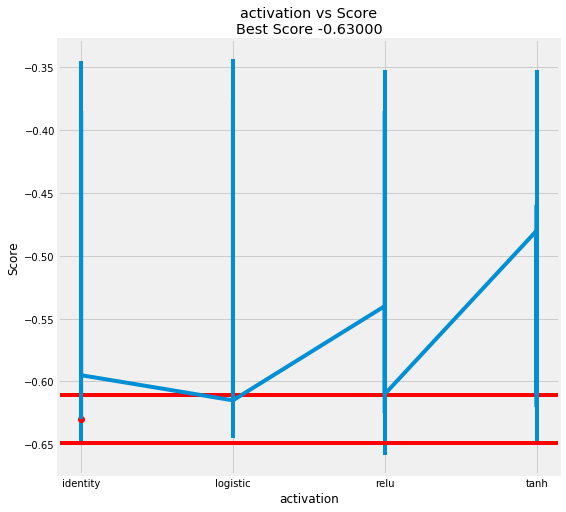

In [16]:
GridSearch_table_plot(grid, 'activation')

### Random Search Approach

The random search approach works by sampling hyperparamaters from our paramater list dictionary randomly. This often has the benefit of arriving at the same grid search accuracy at magnitudes lower time.

In [17]:
from sklearn.grid_search import RandomizedSearchCV

grid = RandomizedSearchCV(mlp, parameter_space)
start = time.time()
grid.fit(X_train, y_train)
 
# evaluate the best randomized searched model on the testing
# data
print("[INFO] randomized search took {:.2f} seconds".format(
	time.time() - start))
acc = grid.score(X_test, y_test)
print("[INFO] grid search accuracy: {:.2f}%".format(acc * 100))

Iteration 1, loss = 0.69186433
Iteration 2, loss = 0.69173406
Iteration 3, loss = 0.69154965
Iteration 4, loss = 0.69131792
Iteration 5, loss = 0.69104526
Iteration 6, loss = 0.69073760
Iteration 7, loss = 0.69040042
Iteration 8, loss = 0.69003873
Iteration 9, loss = 0.68965708
Iteration 10, loss = 0.68925961
Iteration 11, loss = 0.68885003
Iteration 12, loss = 0.68843165
Iteration 13, loss = 0.68800742
Iteration 14, loss = 0.68757995
Iteration 15, loss = 0.68715153
Iteration 16, loss = 0.68672414
Iteration 17, loss = 0.68629953
Iteration 18, loss = 0.68587916
Iteration 19, loss = 0.68546429
Iteration 20, loss = 0.68505600
Iteration 21, loss = 0.68465514
Iteration 22, loss = 0.68426244
Iteration 23, loss = 0.68387848
Iteration 24, loss = 0.68350370
Iteration 25, loss = 0.68313842
Iteration 26, loss = 0.68278289
Iteration 27, loss = 0.68243724
Iteration 28, loss = 0.68210156
Iteration 29, loss = 0.68177584
Iteration 30, loss = 0.68146004
Iteration 31, loss = 0.68115405
Iteration 32, los

Iteration 6, loss = 0.66809244
Iteration 7, loss = 0.66860560
Iteration 8, loss = 0.66903389
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.75854838
Iteration 2, loss = 0.75582352
Iteration 3, loss = 0.75316038
Iteration 4, loss = 0.75053701
Iteration 5, loss = 0.74791488
Iteration 6, loss = 0.74531554
Iteration 7, loss = 0.74274356
Iteration 8, loss = 0.74020340
Iteration 9, loss = 0.73767693
Iteration 10, loss = 0.73519602
Iteration 11, loss = 0.73276789
Iteration 12, loss = 0.73039427
Iteration 13, loss = 0.72805964
Iteration 14, loss = 0.72574346
Iteration 15, loss = 0.72346840
Iteration 16, loss = 0.72124943
Iteration 17, loss = 0.71903976
Iteration 18, loss = 0.71683649
Iteration 19, loss = 0.71465282
Iteration 20, loss = 0.71248565
Iteration 21, loss = 0.71034593
Iteration 22, loss = 0.70826872
Iteration 23, loss = 0.70620062
Iteration 24, loss = 0.70419745
Iteration 25, loss = 0.70216993
Iteration 26, loss = 0.70

Iteration 23, loss = 0.66949970
Iteration 24, loss = 0.66892113
Iteration 25, loss = 0.66834561
Iteration 26, loss = 0.66777523
Iteration 27, loss = 0.66723595
Iteration 28, loss = 0.66671611
Iteration 29, loss = 0.66620436
Iteration 30, loss = 0.66570541
Iteration 31, loss = 0.66522656
Iteration 32, loss = 0.66477420
Iteration 33, loss = 0.66432857
Iteration 34, loss = 0.66388050
Iteration 35, loss = 0.66344387
Iteration 36, loss = 0.66301942
Iteration 37, loss = 0.66259150
Iteration 38, loss = 0.66216988
Iteration 39, loss = 0.66175533
Iteration 40, loss = 0.66133503
Iteration 41, loss = 0.66090537
Iteration 42, loss = 0.66047583
Iteration 43, loss = 0.66005072
Iteration 44, loss = 0.65963251
Iteration 45, loss = 0.65921481
Iteration 46, loss = 0.65881038
Iteration 47, loss = 0.65841752
Iteration 48, loss = 0.65802123
Iteration 49, loss = 0.65761991
Iteration 50, loss = 0.65721530
Iteration 51, loss = 0.65680722
Iteration 52, loss = 0.65639931
Iteration 53, loss = 0.65600003
Iteratio

Iteration 27, loss = 0.72237055
Iteration 28, loss = 0.72168022
Iteration 29, loss = 0.72099923
Iteration 30, loss = 0.72032673
Iteration 31, loss = 0.71966220
Iteration 32, loss = 0.71900773
Iteration 33, loss = 0.71836704
Iteration 34, loss = 0.71773717
Iteration 35, loss = 0.71711895
Iteration 36, loss = 0.71651374
Iteration 37, loss = 0.71592156
Iteration 38, loss = 0.71534027
Iteration 39, loss = 0.71477024
Iteration 40, loss = 0.71421129
Iteration 41, loss = 0.71366206
Iteration 42, loss = 0.71312291
Iteration 43, loss = 0.71259616
Iteration 44, loss = 0.71208118
Iteration 45, loss = 0.71157611
Iteration 46, loss = 0.71107794
Iteration 47, loss = 0.71058752
Iteration 48, loss = 0.71010568
Iteration 49, loss = 0.70963509
Iteration 50, loss = 0.70917370
Iteration 51, loss = 0.70871902
Iteration 52, loss = 0.70827170
Iteration 53, loss = 0.70782925
Iteration 54, loss = 0.70739202
Iteration 55, loss = 0.70696245
Iteration 56, loss = 0.70654188
Iteration 57, loss = 0.70612917
Iteratio

Iteration 11, loss = 0.71371385
Iteration 12, loss = 0.70878587
Iteration 13, loss = 0.70408928
Iteration 14, loss = 0.69966286
Iteration 15, loss = 0.69553414
Iteration 16, loss = 0.69172059
Iteration 17, loss = 0.68823087
Iteration 18, loss = 0.68506611
Iteration 19, loss = 0.68222114
Iteration 20, loss = 0.67968566
Iteration 21, loss = 0.67744540
Iteration 22, loss = 0.67548309
Iteration 23, loss = 0.67377935
Iteration 24, loss = 0.67231351
Iteration 25, loss = 0.67106427
Iteration 26, loss = 0.67001025
Iteration 27, loss = 0.66913047
Iteration 28, loss = 0.66840470
Iteration 29, loss = 0.66781374
Iteration 30, loss = 0.66733960
Iteration 31, loss = 0.66696566
Iteration 32, loss = 0.66667675
Iteration 33, loss = 0.66645912
Iteration 34, loss = 0.66630052
Iteration 35, loss = 0.66619008
Iteration 36, loss = 0.66611828
Iteration 37, loss = 0.66607689
Iteration 38, loss = 0.66605885
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Setting learning rate t

Iteration 160, loss = 0.63925058
Iteration 161, loss = 0.63914007
Iteration 162, loss = 0.63902611
Iteration 163, loss = 0.63891318
Iteration 164, loss = 0.63881251
Iteration 165, loss = 0.63871097
Iteration 166, loss = 0.63860308
Iteration 167, loss = 0.63849970
Iteration 168, loss = 0.63840222
Iteration 169, loss = 0.63830151
Iteration 170, loss = 0.63819824
Iteration 171, loss = 0.63807996
Iteration 172, loss = 0.63795158
Iteration 173, loss = 0.63781733
Iteration 174, loss = 0.63767871
Iteration 175, loss = 0.63754317
Iteration 176, loss = 0.63741406
Iteration 177, loss = 0.63728231
Iteration 178, loss = 0.63714903
Iteration 179, loss = 0.63702242
Iteration 180, loss = 0.63689923
Iteration 181, loss = 0.63679439
Iteration 182, loss = 0.63669151
Iteration 183, loss = 0.63657881
Iteration 184, loss = 0.63645757
Iteration 185, loss = 0.63635040
Iteration 186, loss = 0.63624394
Iteration 187, loss = 0.63613057
Iteration 188, loss = 0.63601317
Iteration 189, loss = 0.63589995
Iteration 

Iteration 147, loss = 0.63744573
Iteration 148, loss = 0.63712178
Iteration 149, loss = 0.63679354
Iteration 150, loss = 0.63646172
Iteration 151, loss = 0.63610377
Iteration 152, loss = 0.63575213
Iteration 153, loss = 0.63540139
Iteration 154, loss = 0.63505046
Iteration 155, loss = 0.63470153
Iteration 156, loss = 0.63434889
Iteration 157, loss = 0.63398152
Iteration 158, loss = 0.63361169
Iteration 159, loss = 0.63326211
Iteration 160, loss = 0.63289436
Iteration 161, loss = 0.63254408
Iteration 162, loss = 0.63220470
Iteration 163, loss = 0.63186003
Iteration 164, loss = 0.63151122
Iteration 165, loss = 0.63116378
Iteration 166, loss = 0.63081751
Iteration 167, loss = 0.63046893
Iteration 168, loss = 0.63011546
Iteration 169, loss = 0.62976908
Iteration 170, loss = 0.62942140
Iteration 171, loss = 0.62907075
Iteration 172, loss = 0.62873120
Iteration 173, loss = 0.62839125
Iteration 174, loss = 0.62805277
Iteration 175, loss = 0.62771435
Iteration 176, loss = 0.62737091
Iteration 

In [20]:
print("[INFO] randomized search best parameters: {}".format(
	grid.best_params_))

[INFO] randomized search best parameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0005, 'activation': 'relu'}


In [21]:
predictions = grid.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
from sklearn.metrics import log_loss
print("Our log loss score: {0}".format(log_loss(y_test, predictions)))


[[ 1 31]
 [ 0 19]]
             precision    recall  f1-score   support

         -1       1.00      0.03      0.06        32
          1       0.38      1.00      0.55        19

avg / total       0.77      0.39      0.24        51

Our log loss score: 20.99464423063857


### Hyperparameter Observations

Looking to the hyperparamater optimization, we find that a random search yields the exact same log loss score as the grid search (and our original untuned model). But it does so in 2.04 seconds whereas grid search took over 80 seconds! With more paramaters in the list, I'm sure we can improve upon this score. Experimenting with the number of hidden layers will be my next steps.